# MAE 1.8
# 18년까지 train, 19년부터 test

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
#from category_encoders import OneHotEncoder
import warnings
import random
import os
plt.style.use('ggplot')
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Ineeji/데이터합본_파생변수 제거.csv')
data

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Ineeji/데이터합본_파생변수 제거.csv'

# Preprocessing

In [ ]:
data['year'] = data['Unnamed: 0'].apply(lambda x : x.split()[0].split('-')[0])
data['month'] = data['Unnamed: 0'].apply(lambda x : x.split()[0].split('-')[1])
data['date'] = data['Unnamed: 0'].apply(lambda x : x.split()[0].split('-')[2])
data['hour'] = data['Unnamed: 0'].apply(lambda x : x.split()[1].split(' ')[0].split(':')[0])

data['year'] = data['year'].astype('int')
data['month'] = data['month'].astype('int')
data['date'] = data['date'].astype('int')
data['hour'] = data['hour'].astype('int')

### 3sigma

In [ ]:
train = data[(data['year'] == 2015) |(data['year'] == 2016) | (data['year'] == 2017) | (data['year'] == 2018)]
test = data[(data['year'] == 2019) |(data['year'] == 2020) | (data['year'] == 2021)]

In [ ]:
train = train[train['hour'] == 7]
test = test[test['hour'] == 7]
test = test.reset_index(drop = True)
train_x = train.drop(['DSL D-95'],axis=1)
train_y = train['DSL D-95']
test_x = test.drop(['DSL D-95'],axis=1)
test_y = test['DSL D-95']
train_x

Unnamed: 0  FIC21185(F1 Flow)  FIC21192(F2 Flow)  \
7      2015-01-01 7:00           550.8983            50.2086   
31     2015-01-02 7:00           550.4379            50.9556   
55     2015-01-03 7:00           549.9128            50.6626   
79     2015-01-04 7:00           550.4780            52.0660   
103    2015-01-05 7:00           549.7178            52.4928   
...                ...                ...                ...   
34628  2018-12-27 7:00           646.1933            43.1396   
34652  2018-12-28 7:00           646.1486            43.2907   
34676  2018-12-29 7:00           646.2419            43.6974   
34700  2018-12-30 7:00           646.4269            44.1367   
34724  2018-12-31 7:00           646.2274            43.8563   

       TIC23115(Feed1 T)  TI23029(Feed2 T)  FIC23108(SS Flow)  \
7               371.4857          327.1521            12.6999   
31              371.5141          327.4293            12.7030   
55              372.4941          327.1995            12.7000   
79              372.4880          326.0615            12.6990   
103             372.1787          326.1675            12.7030   
...                  ...               ...                ...   
34628           366.0021          326.7780            12.9985   
34652           365.9874          326.7389            12.9982   
34676           365.9620          326.0499            13.0026   
34700           365.9416          326.1533            12.9940   
34724           365.9924          326.3418            12.9995   

       PI23105(F Zone P)  TI23120(F Zone T)  TI23121(SS T)  PI23038(BTM P)  \
7                 0.8855           365.2428       296.1245          0.9671   
31                0.8788           366.6962       298.6095          0.9602   
55                0.8886           365.9364       298.1955          0.9705   
79                0.8914           364.5561       298.0781          0.9729   
103               0.8900           364.9840       298.8630          0.9719   
...                  ...                ...            ...             ...   
34628             0.8213           360.4108       298.9033          0.9008   
34652             0.8199           359.7873       297.5707          0.8977   
34676             0.8236           359.3911       297.8050          0.9018   
34700             0.8231           360.0908       300.0846          0.9024   
34724             0.8217           360.0250       300.2509          0.9014   

       TI23123(Reflux T)  TI23502(D/O Vapor T)  FI23107(OF Flow)  \
7                42.4802              305.3691           21.2453   
31               43.3087              317.2792           20.9002   
55               43.0315              303.5425           23.3113   
79               43.9677              299.9352           26.9116   
103              44.3689              302.2838           27.4475   
...                  ...                   ...               ...   
34628            41.5331              301.3582            0.0000   
34652            39.6621              299.5272            0.0000   
34676            40.6187              295.1207            0.0000   
34700            40.8057              300.4487            0.0000   
34724            41.4705              299.2799            0.0000   

       TI23122(BTM T)  TI23116(Top T)  TI23117(DSL S Vapor T)  TI23119(OV T)  \
7            362.7440        110.1155                247.5054       336.5042   
31           362.3851        109.8148                249.7977       339.5740   
55           363.4046        109.8987                246.5459       337.7318   
79           362.9605        109.7104                245.9840       338.7157   
103          362.5666        109.5822                247.3666       338.9142   
...               ...             ...                     ...            ...   
34628        357.8249        110.1740                238.8596       327.5319   
34652        358.1974        110.3781                239.3403       

# EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

DSL D-95


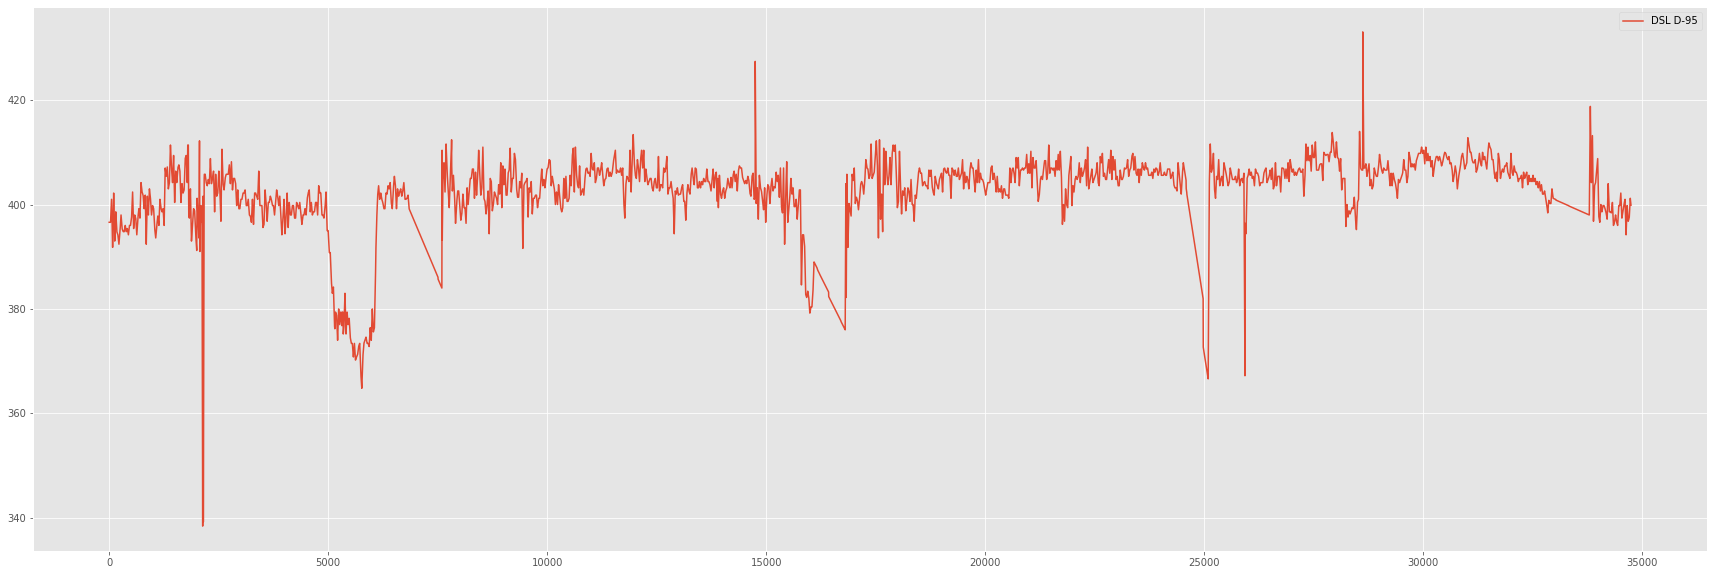

FIC21185(F1 Flow)


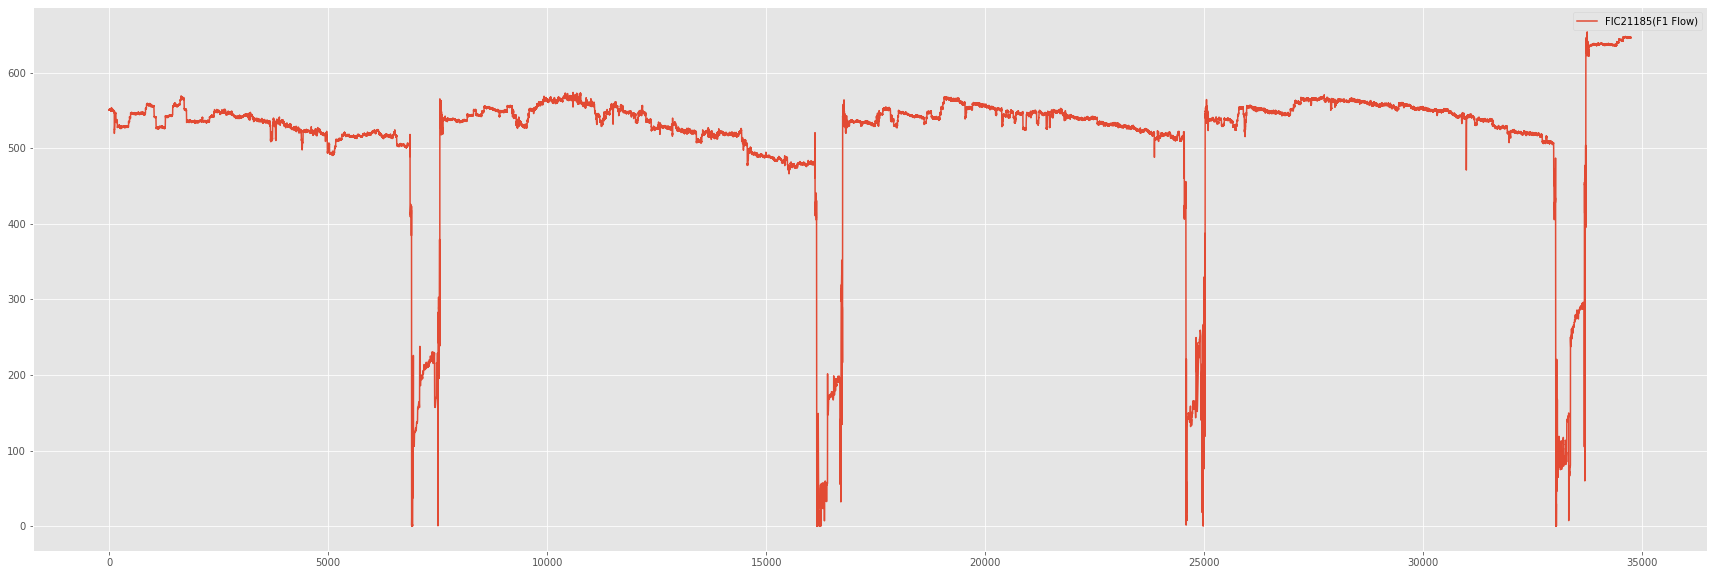

FIC21192(F2 Flow)


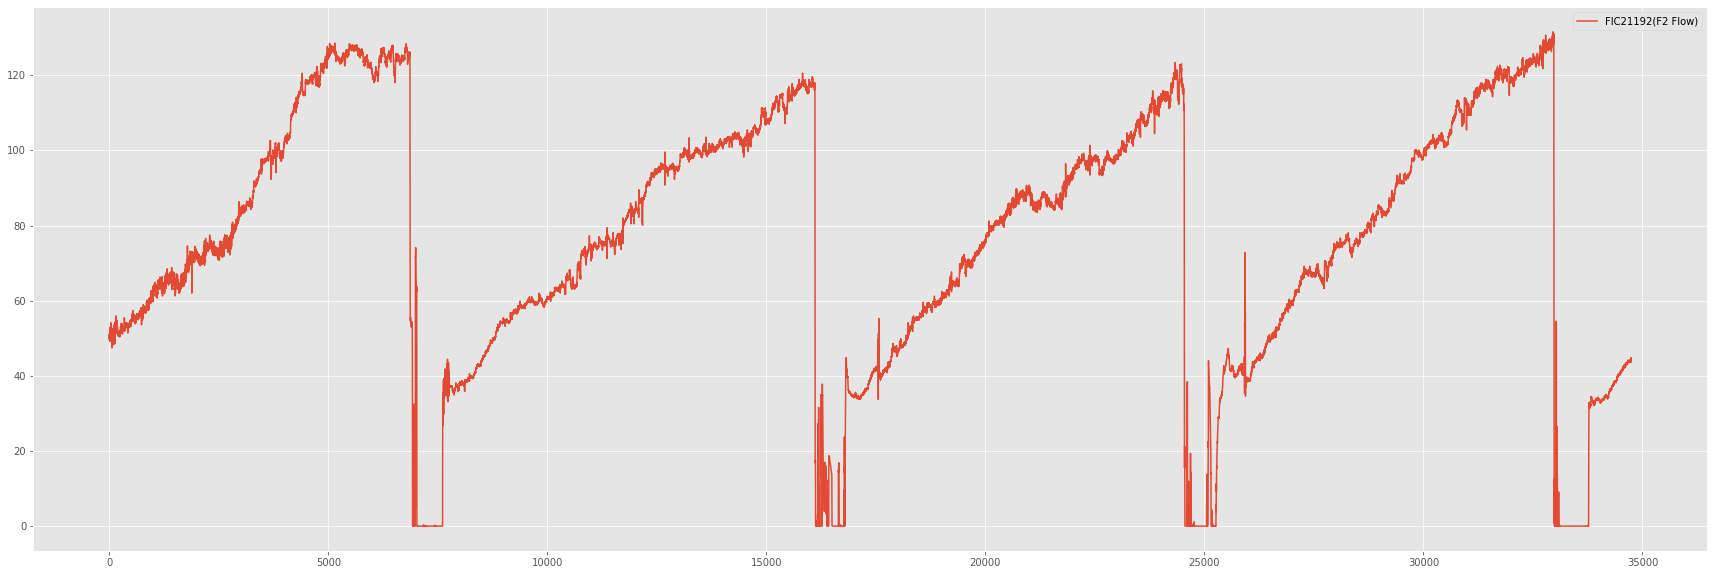

TIC23115(Feed1 T)


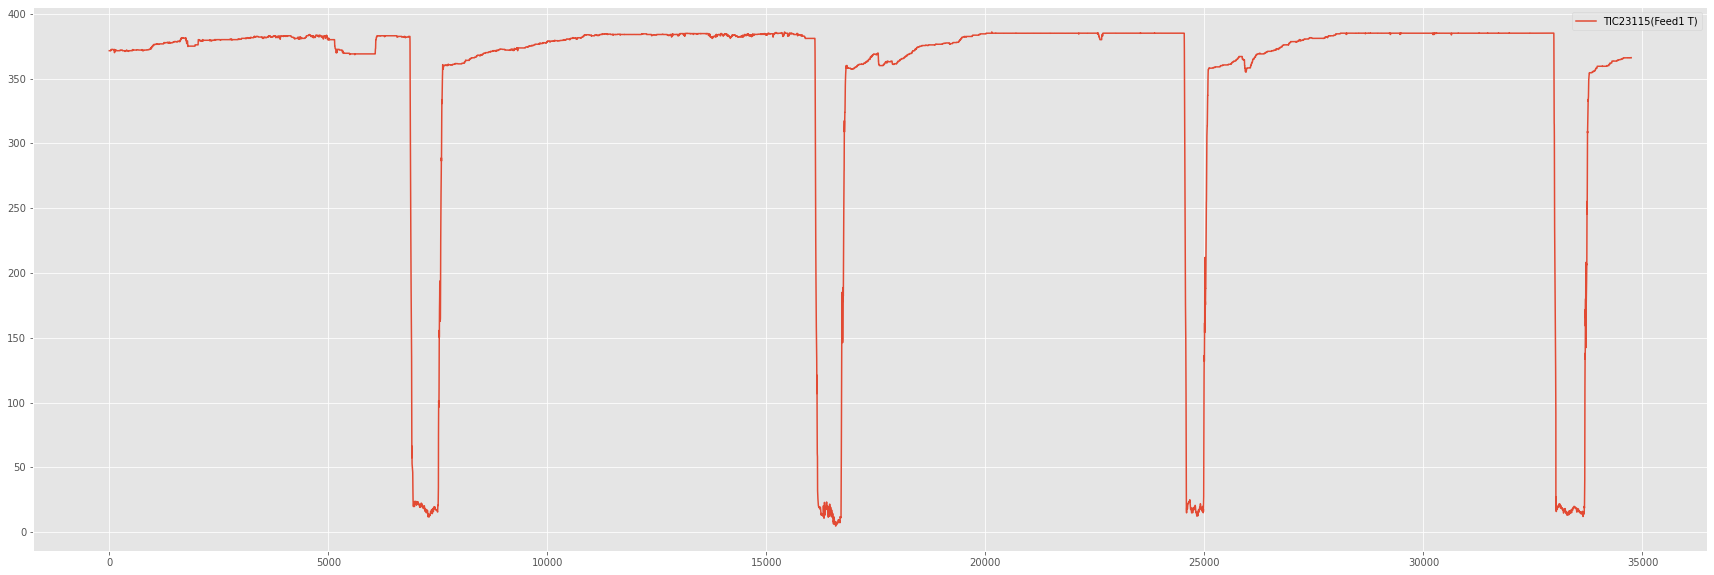

TI23029(Feed2 T)


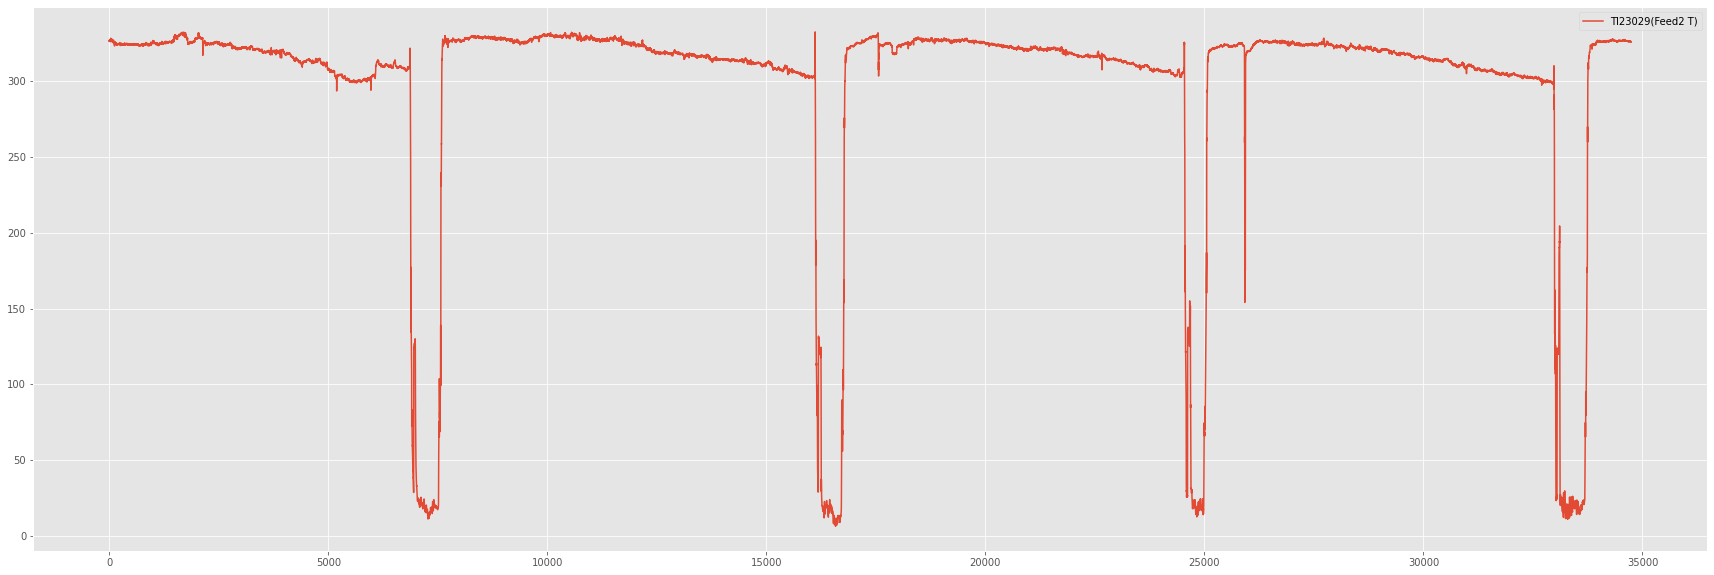

FIC23108(SS Flow)


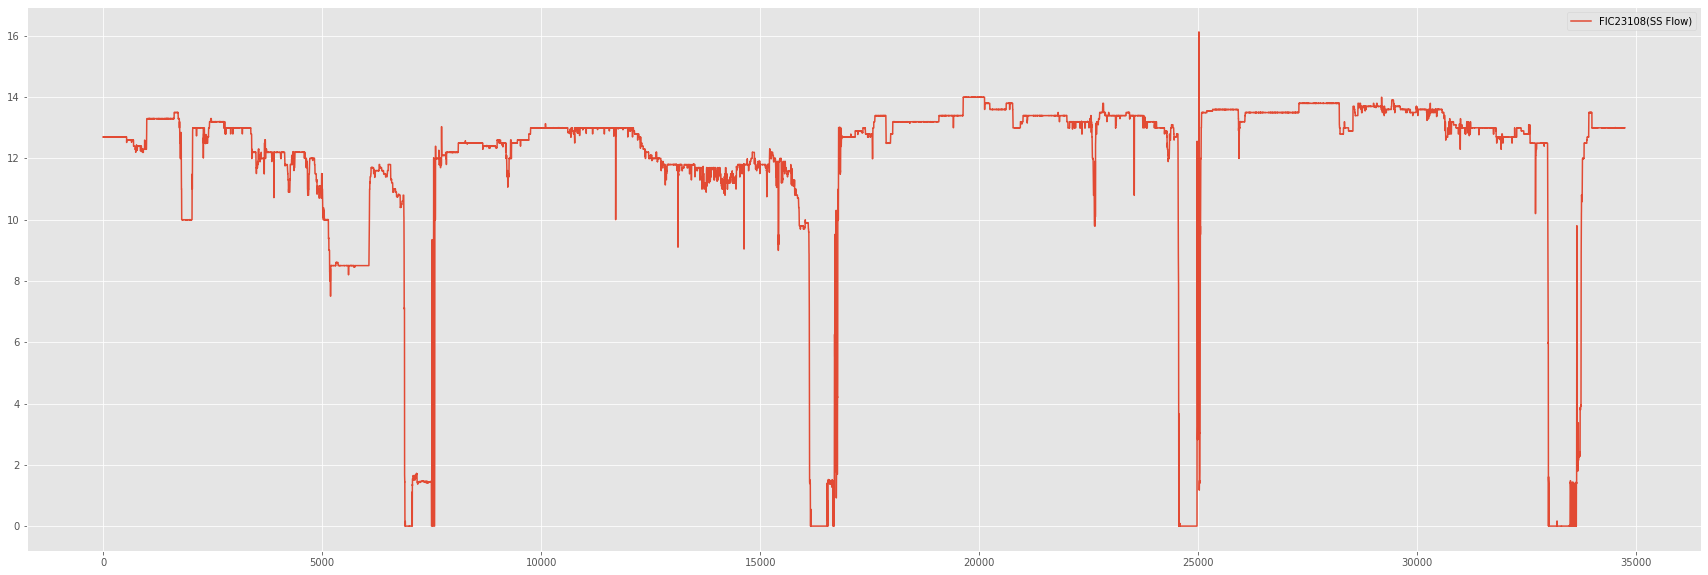

PI23105(F Zone P)


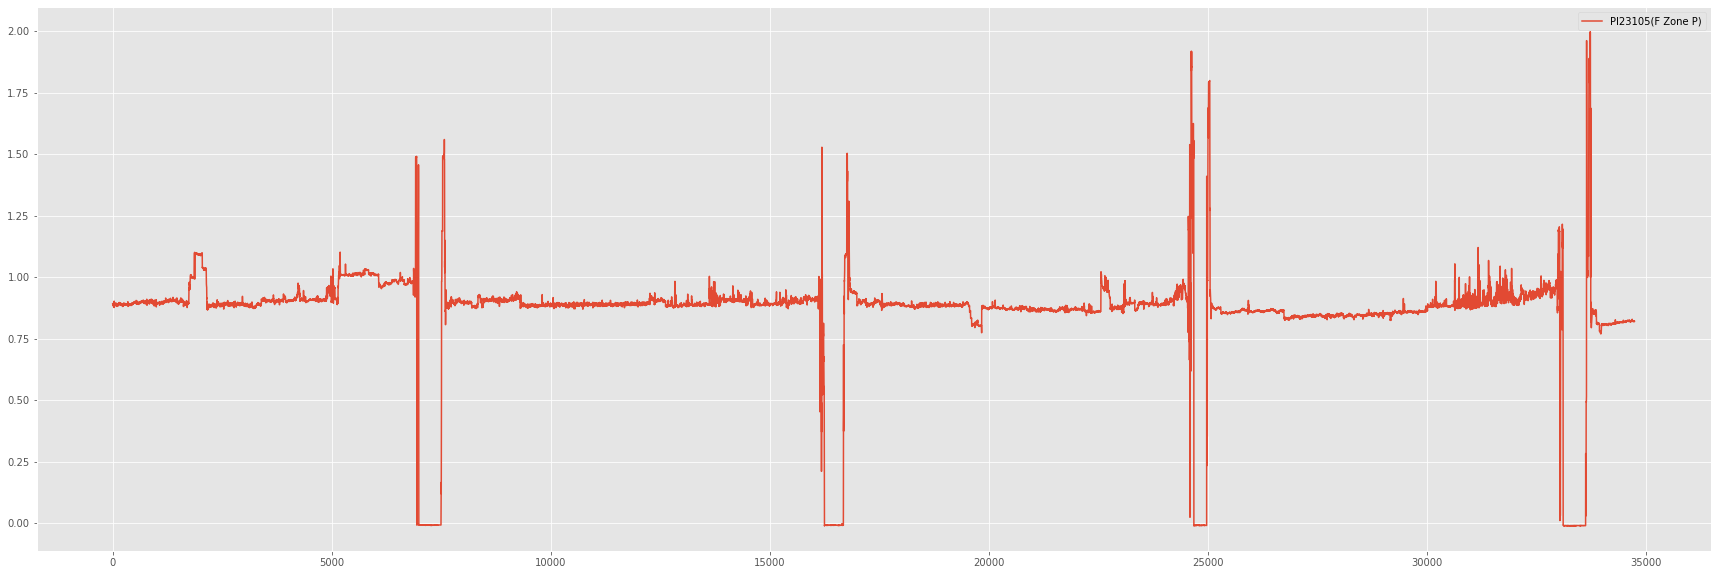

TI23120(F Zone T)


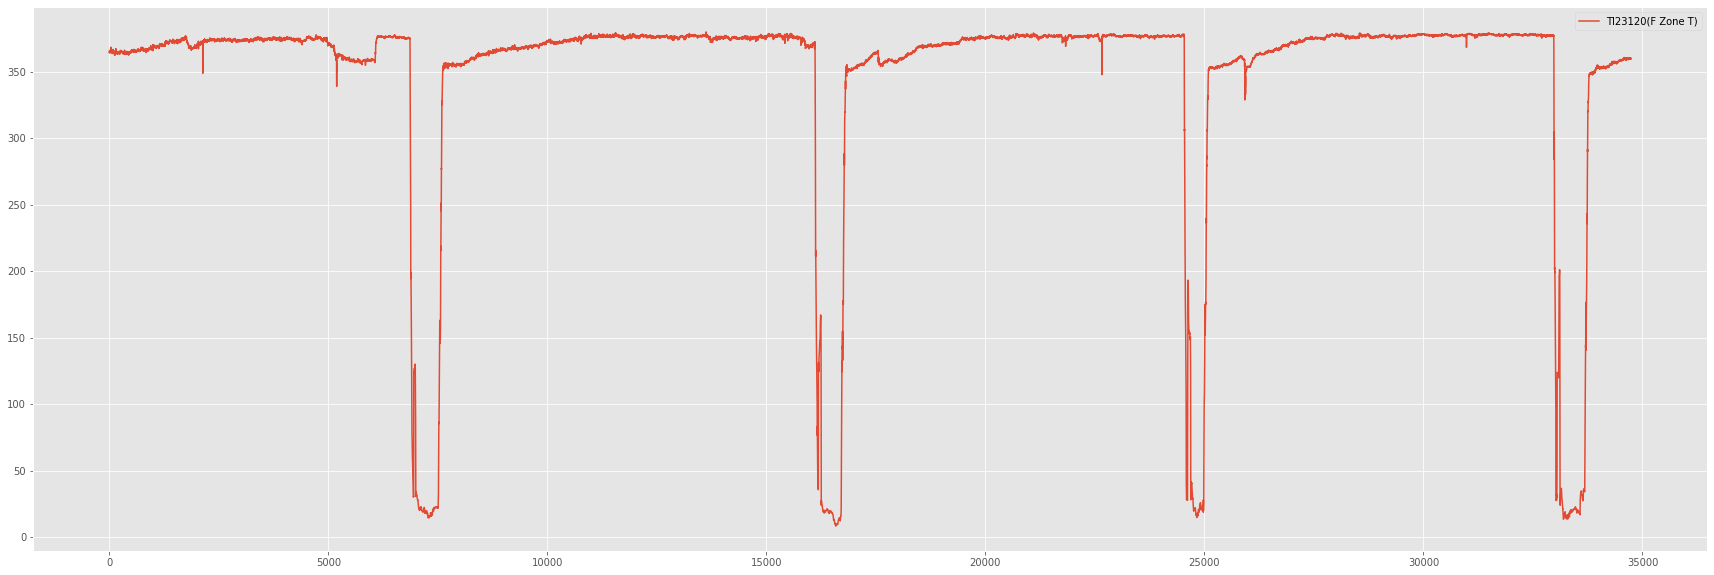

TI23121(SS T)


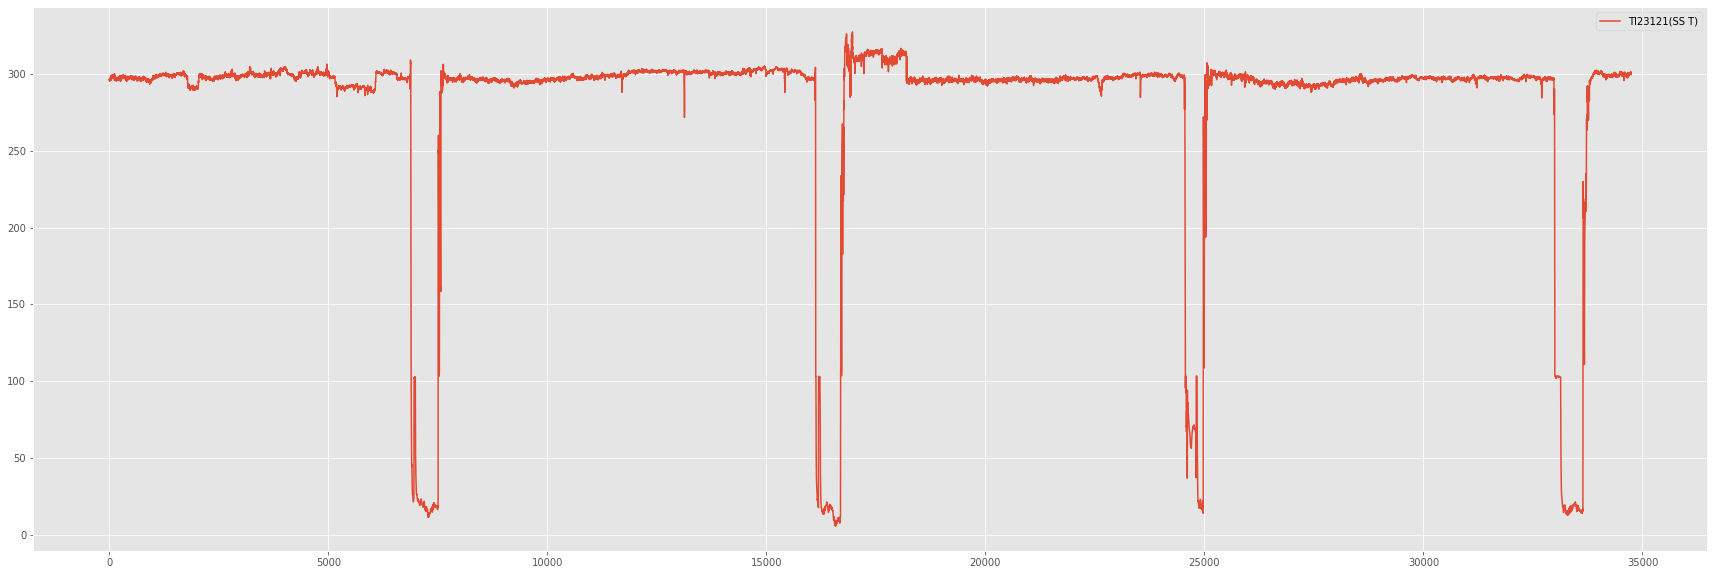

PI23038(BTM P)


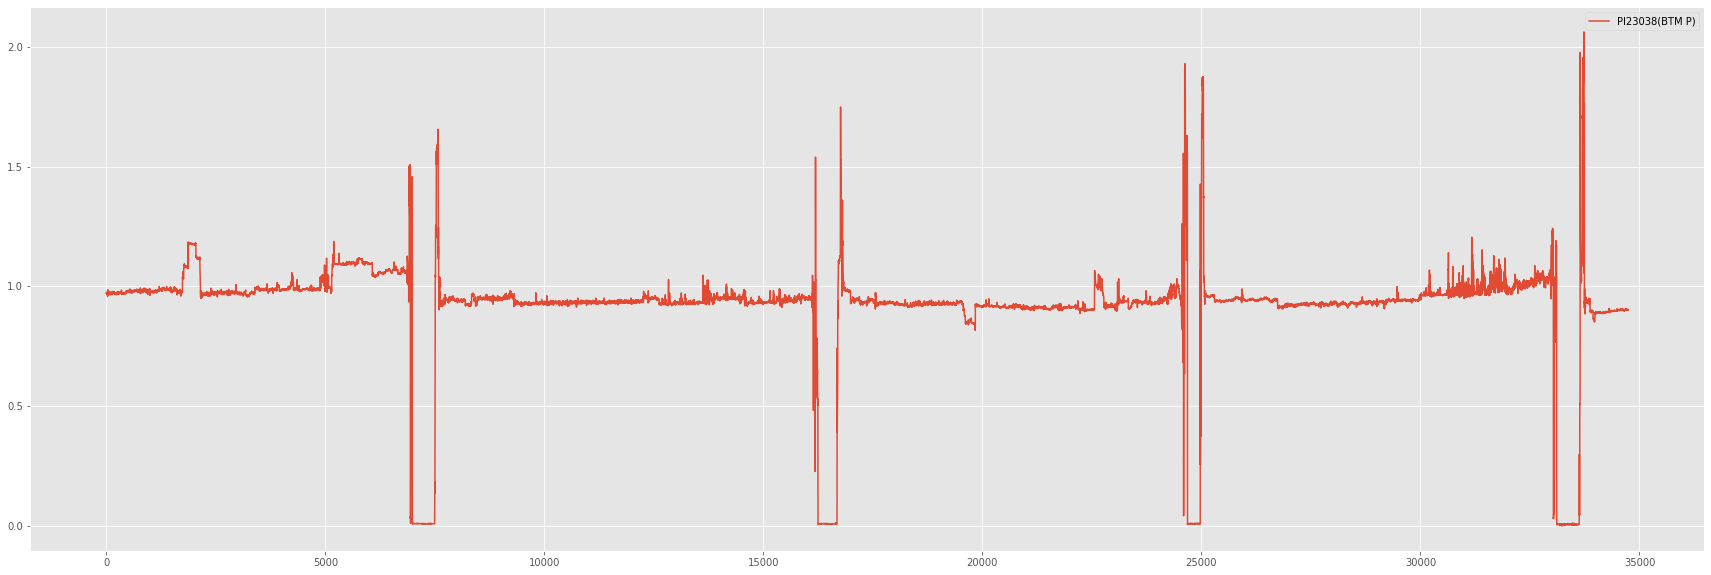

TI23123(Reflux T)


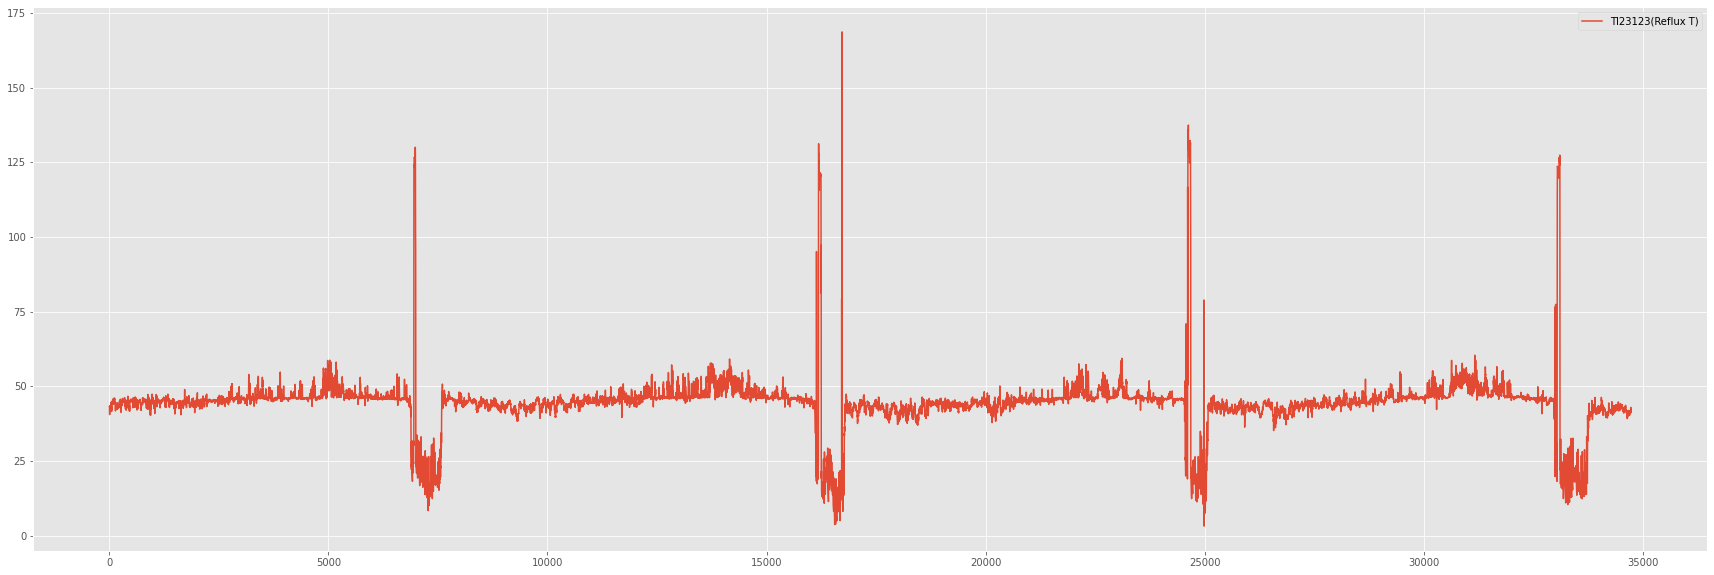

TI23502(D/O Vapor T)


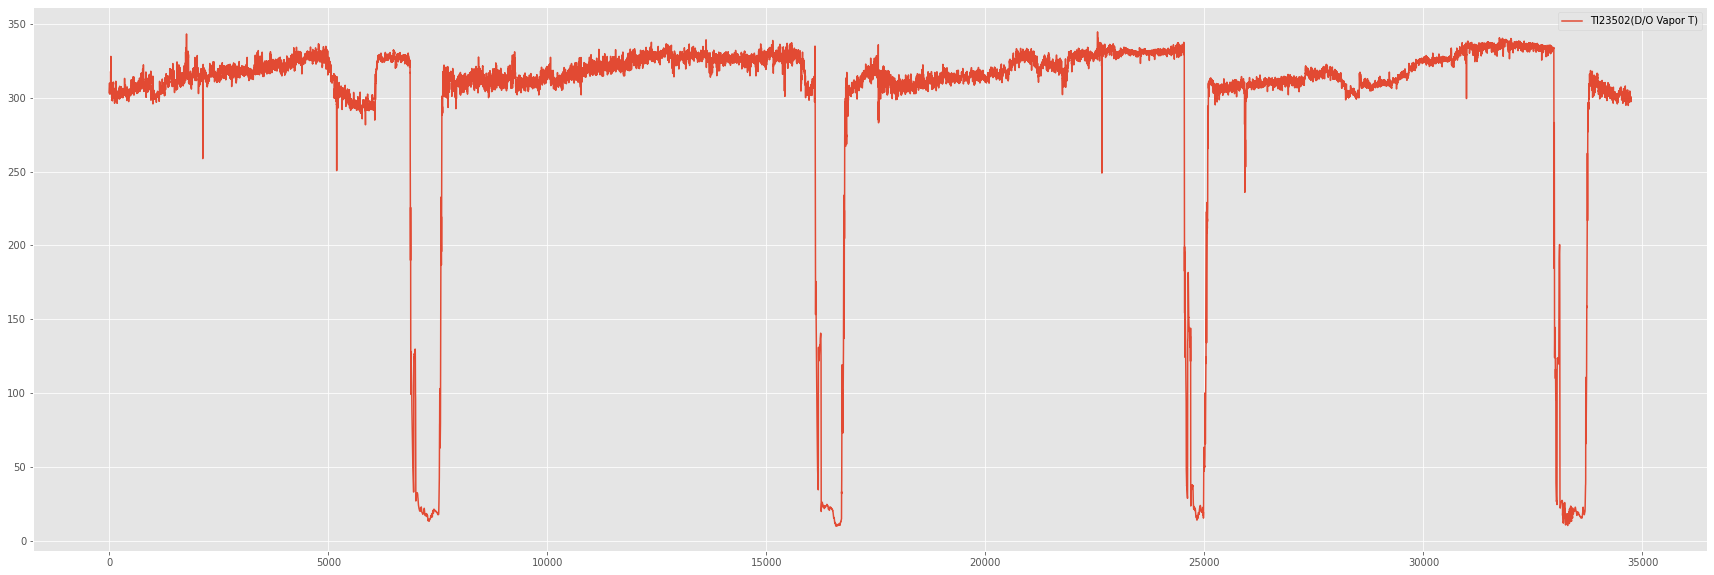

FI23107(OF Flow)


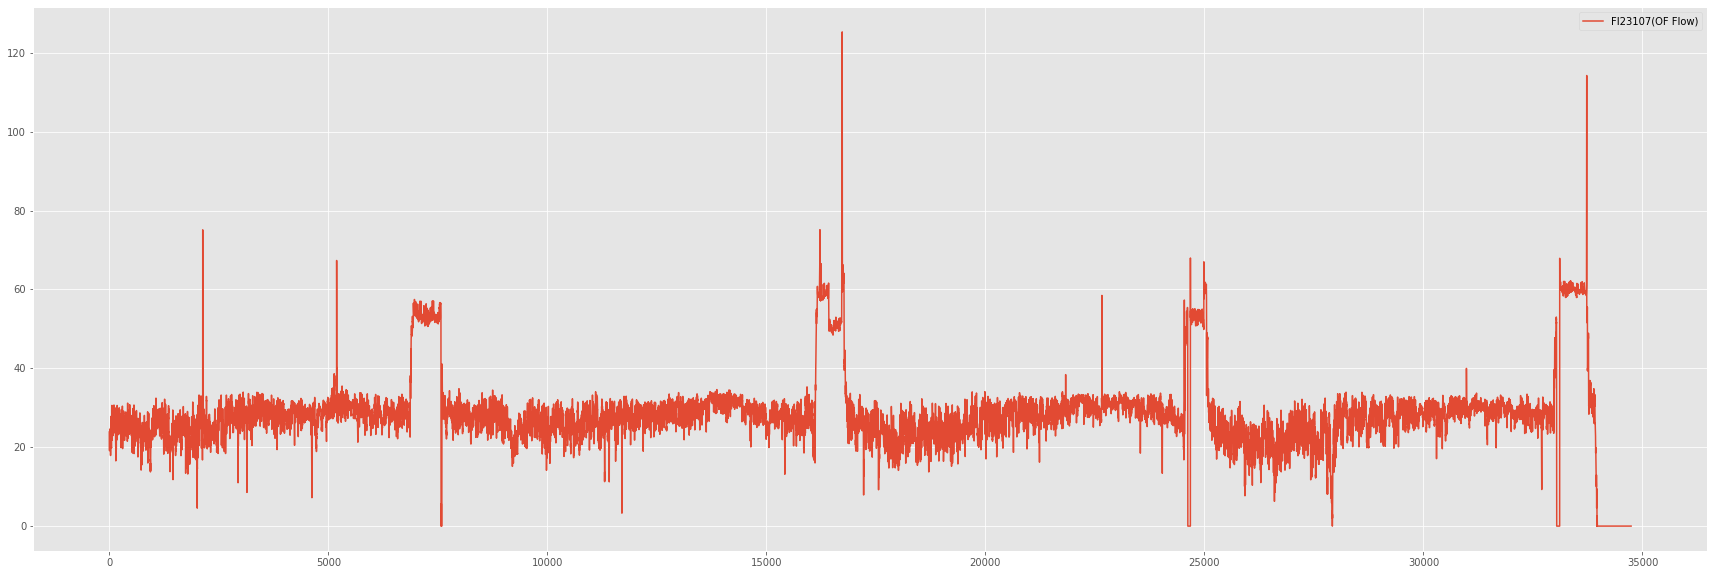

TI23122(BTM T)


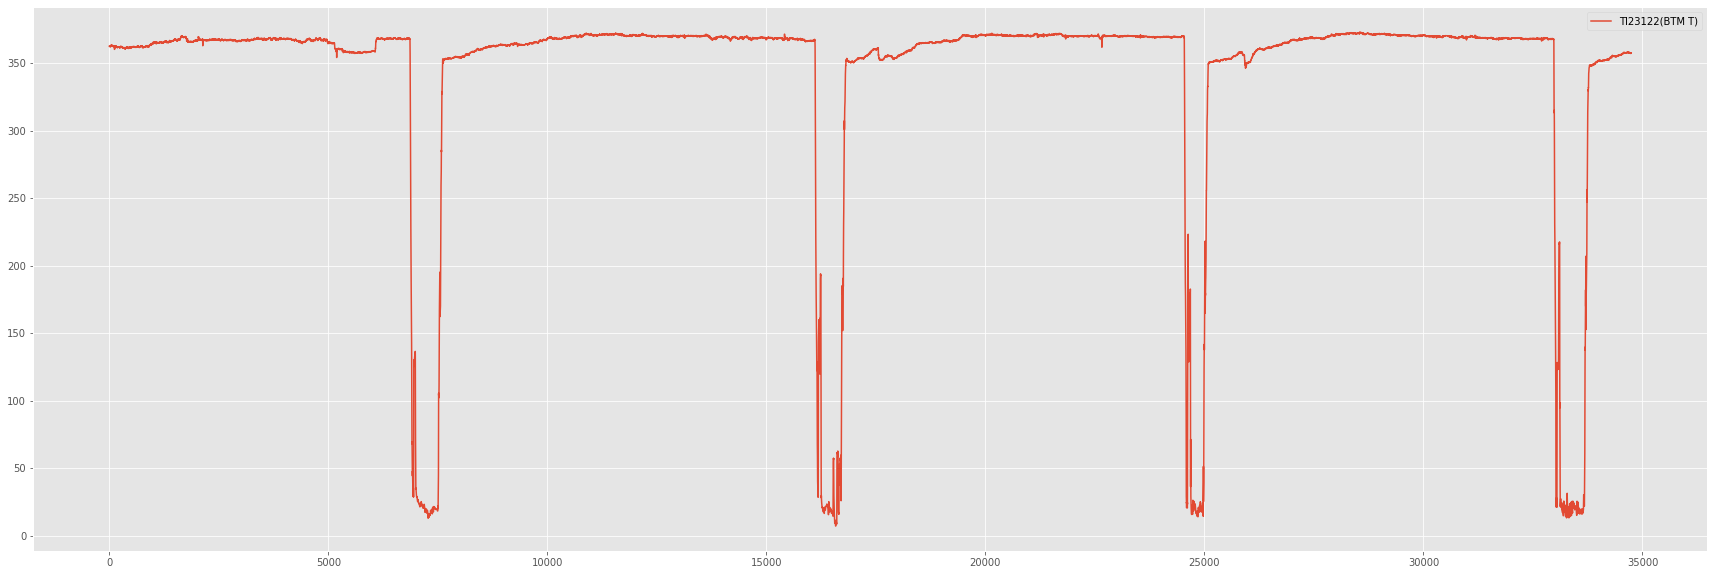

TI23116(Top T)


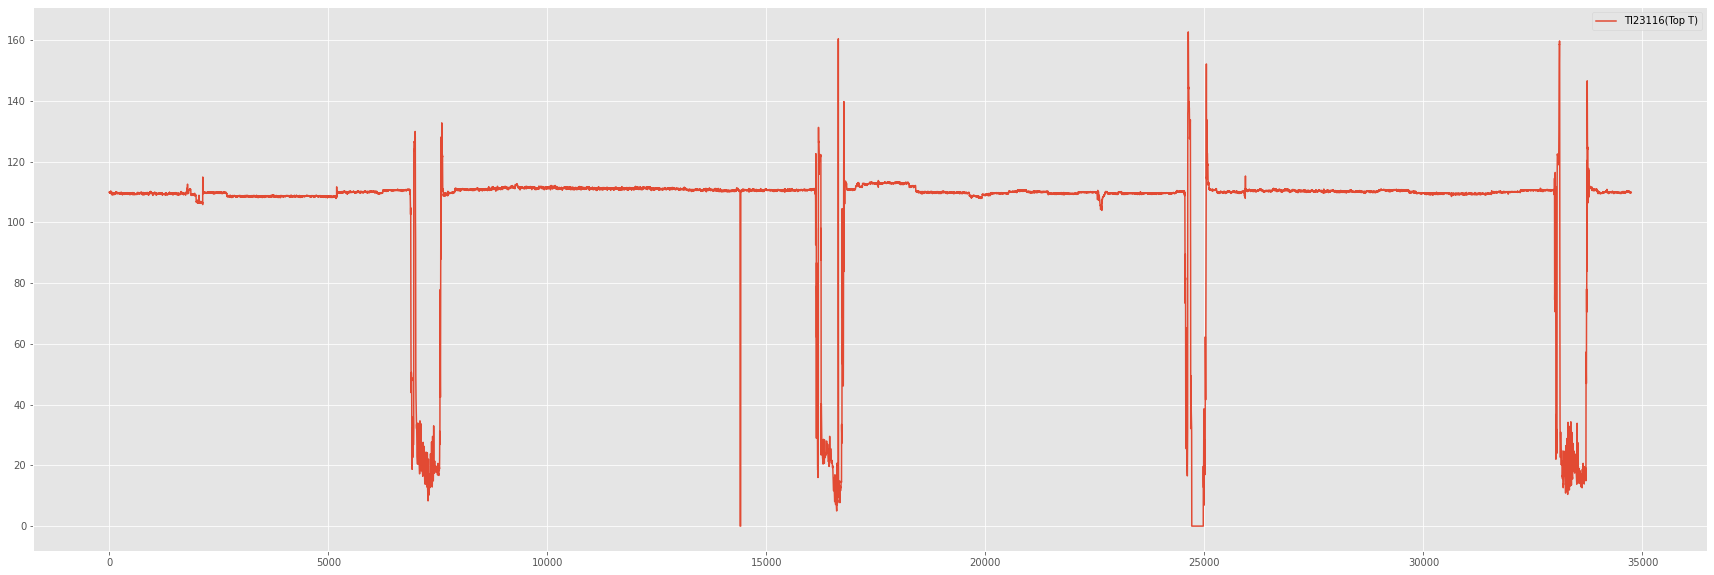

TI23117(DSL S Vapor T)


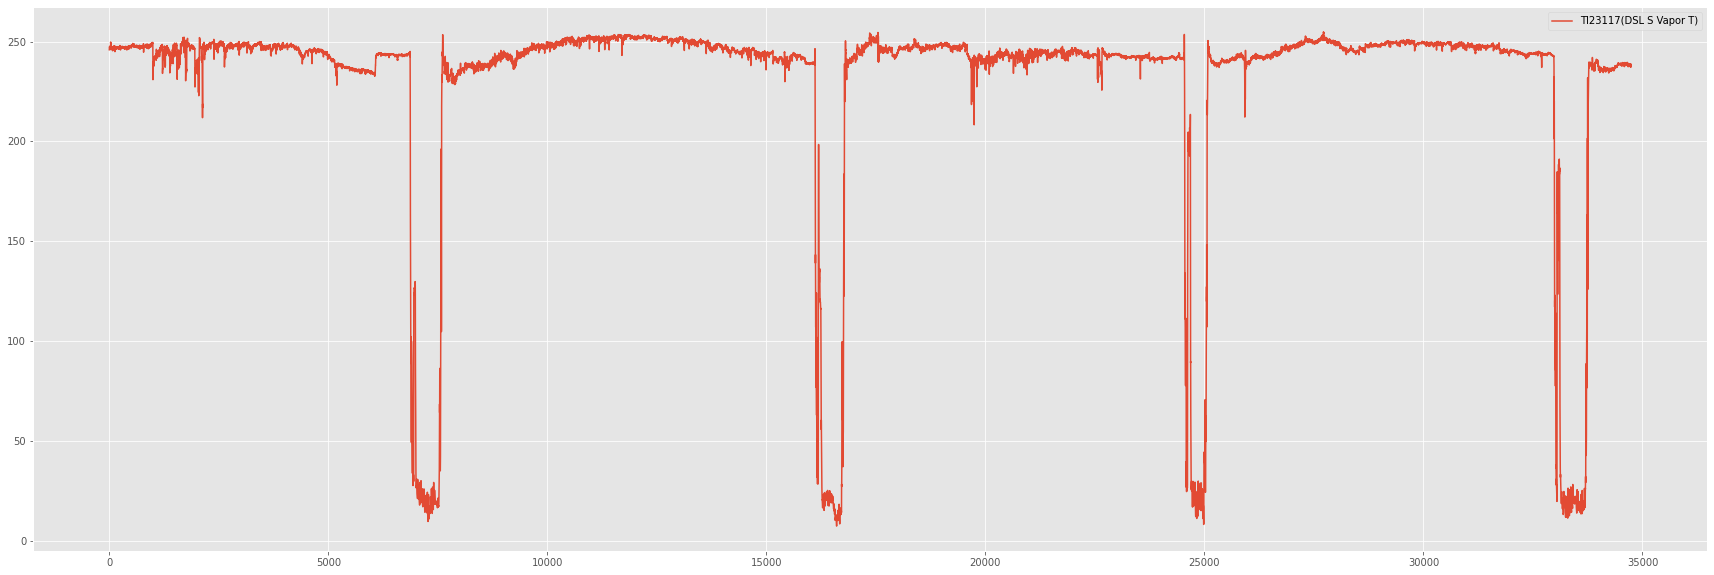

TI23119(OV T)


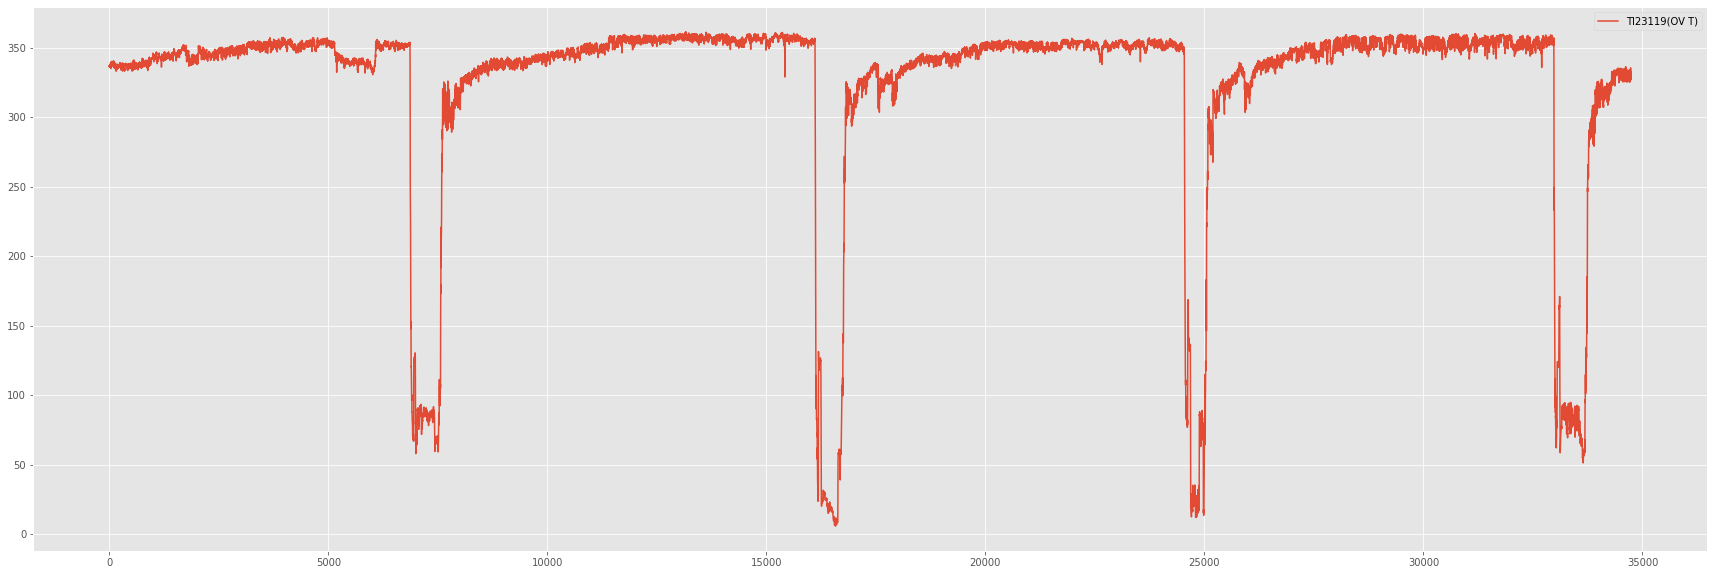

PIC23106(Top P)


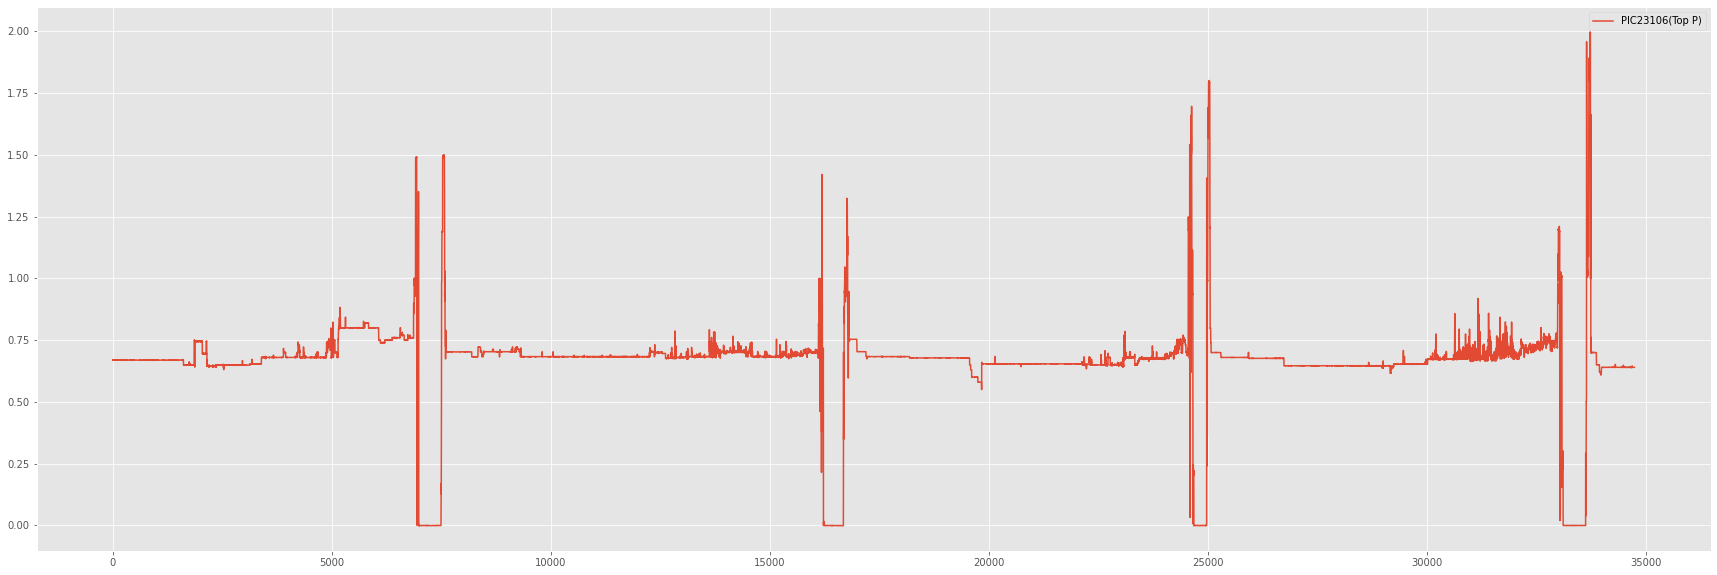

FIC23104(Reflux F)


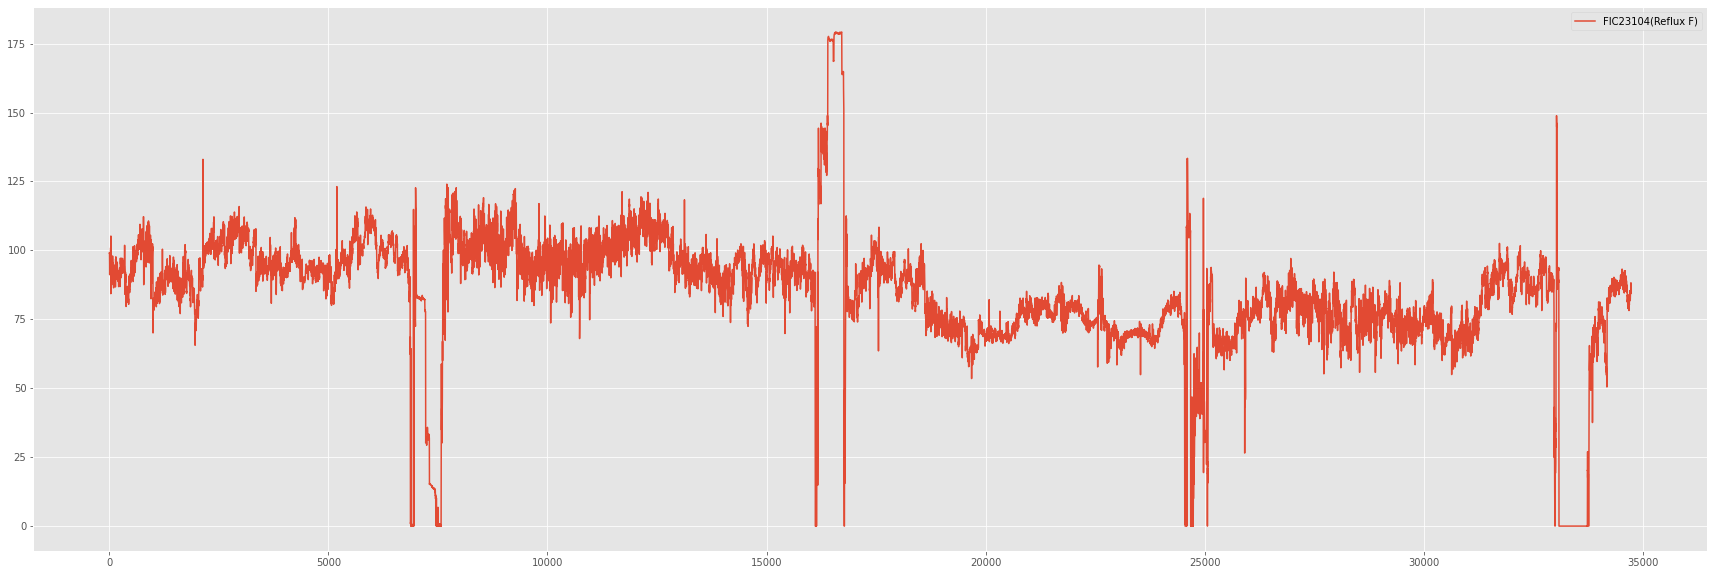

FIC23010(D/O Flow)


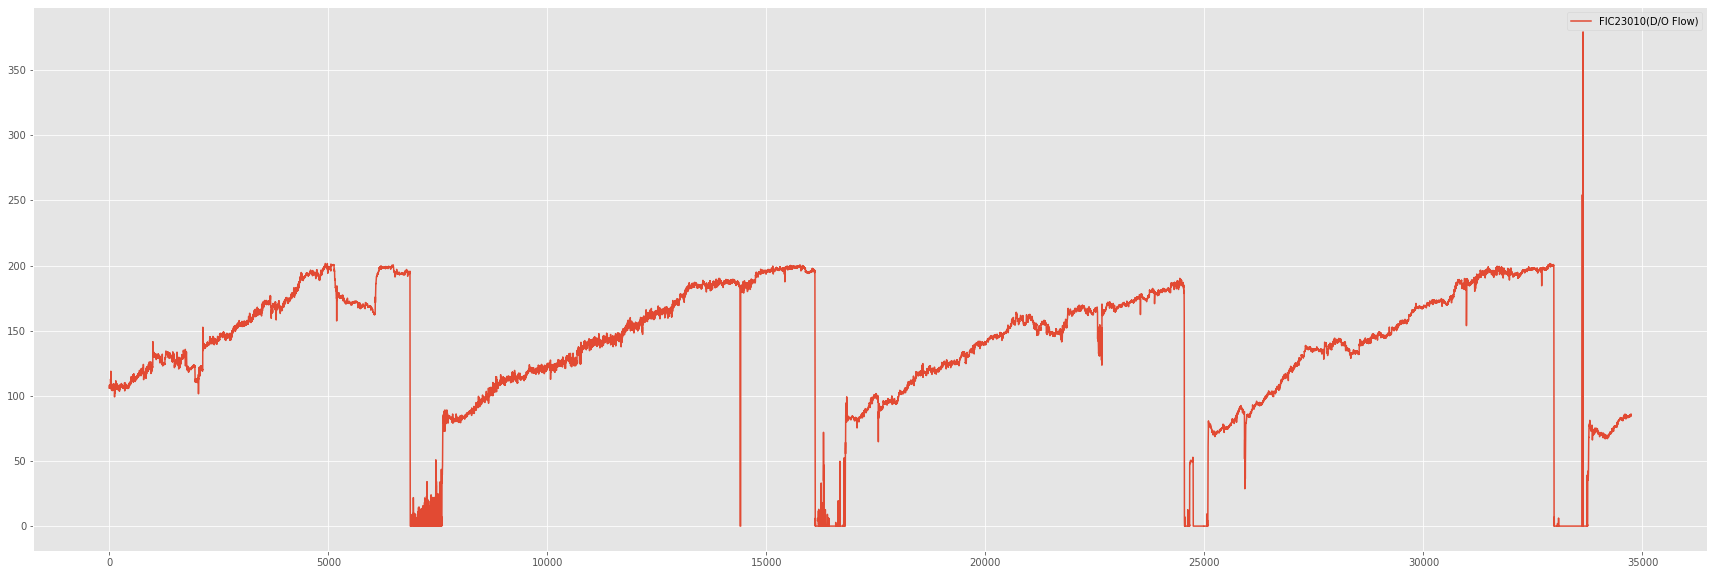

FI23116(T-AR Flow 1)


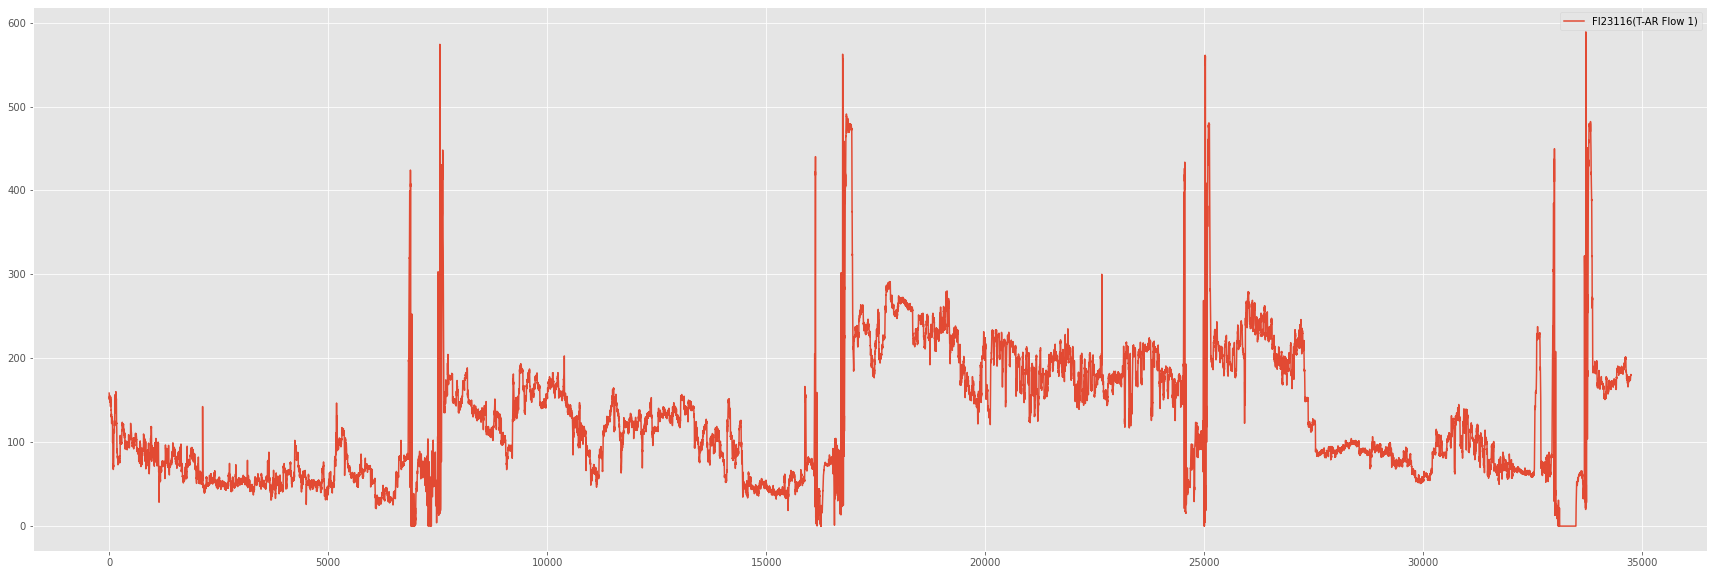

FI23117(T-AR Flow 2)


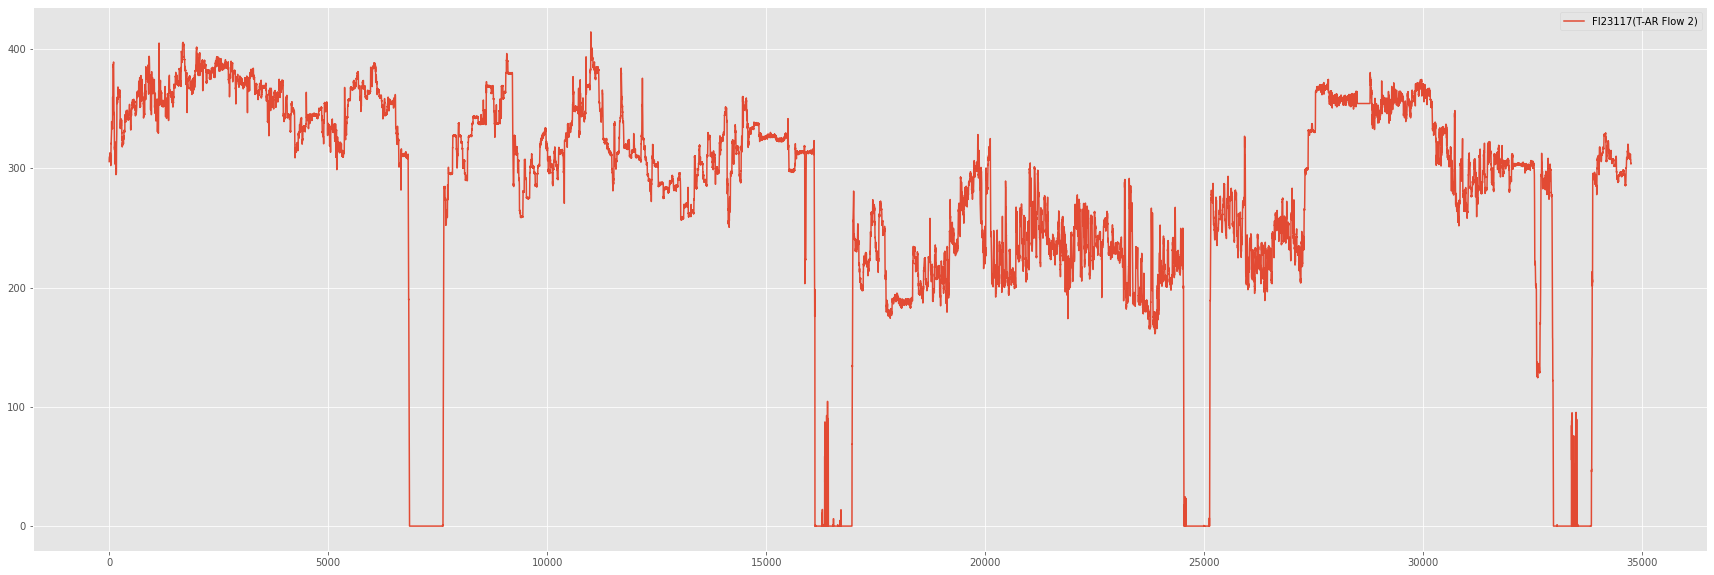

FIC25103(OVHD Flow 1)


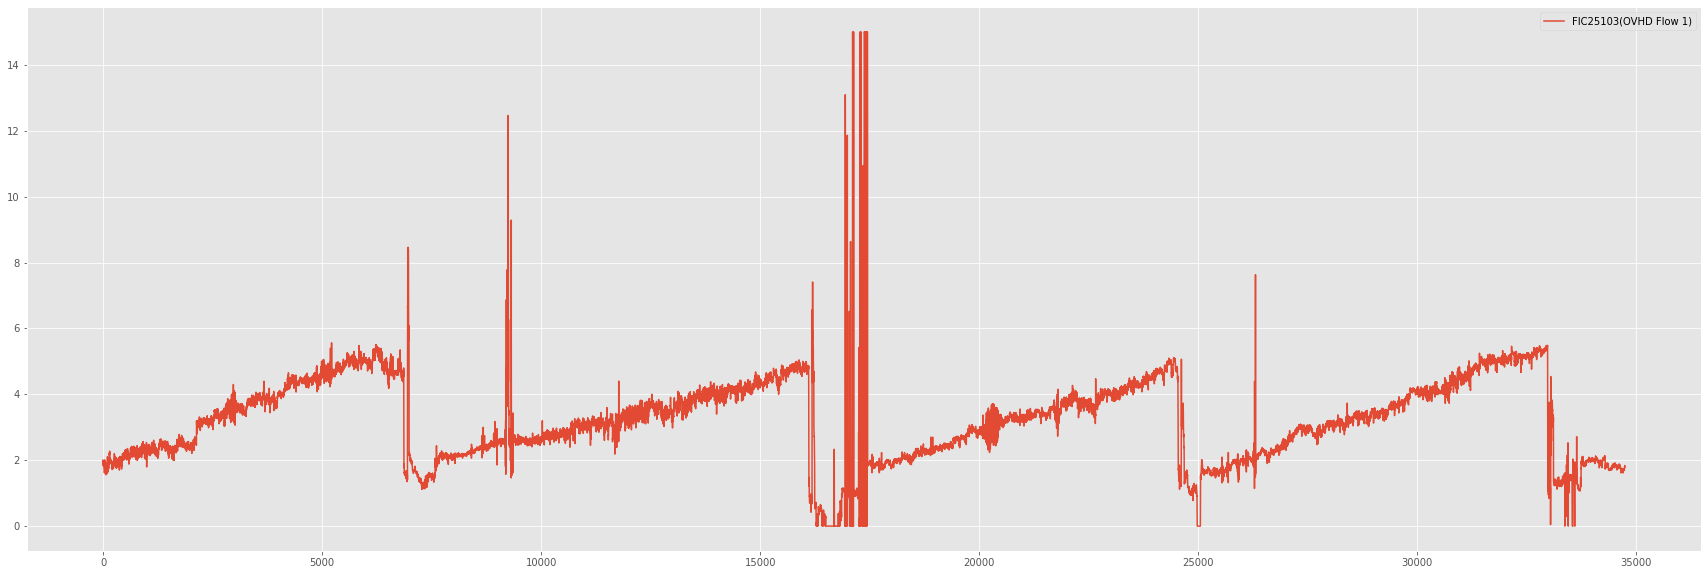

FIC23110(OVHD Flow 2)


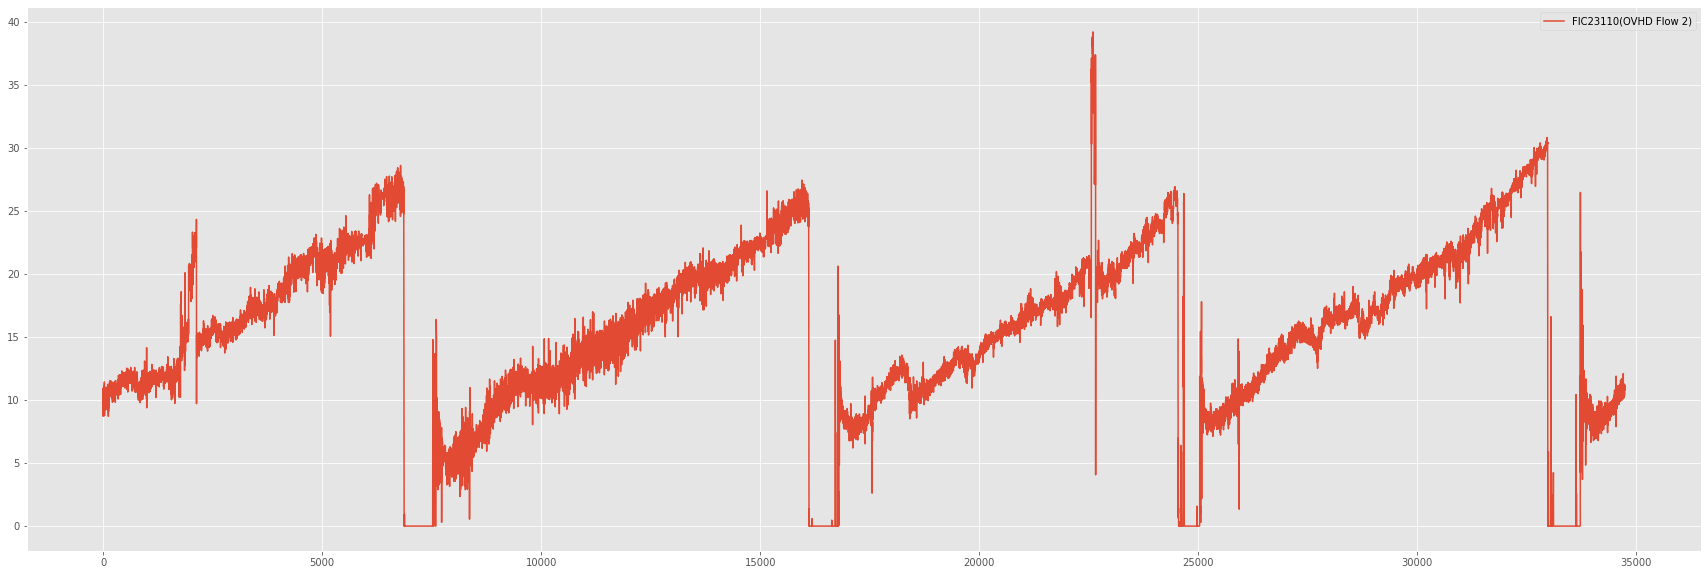

TI23118(D/O Liquid T)


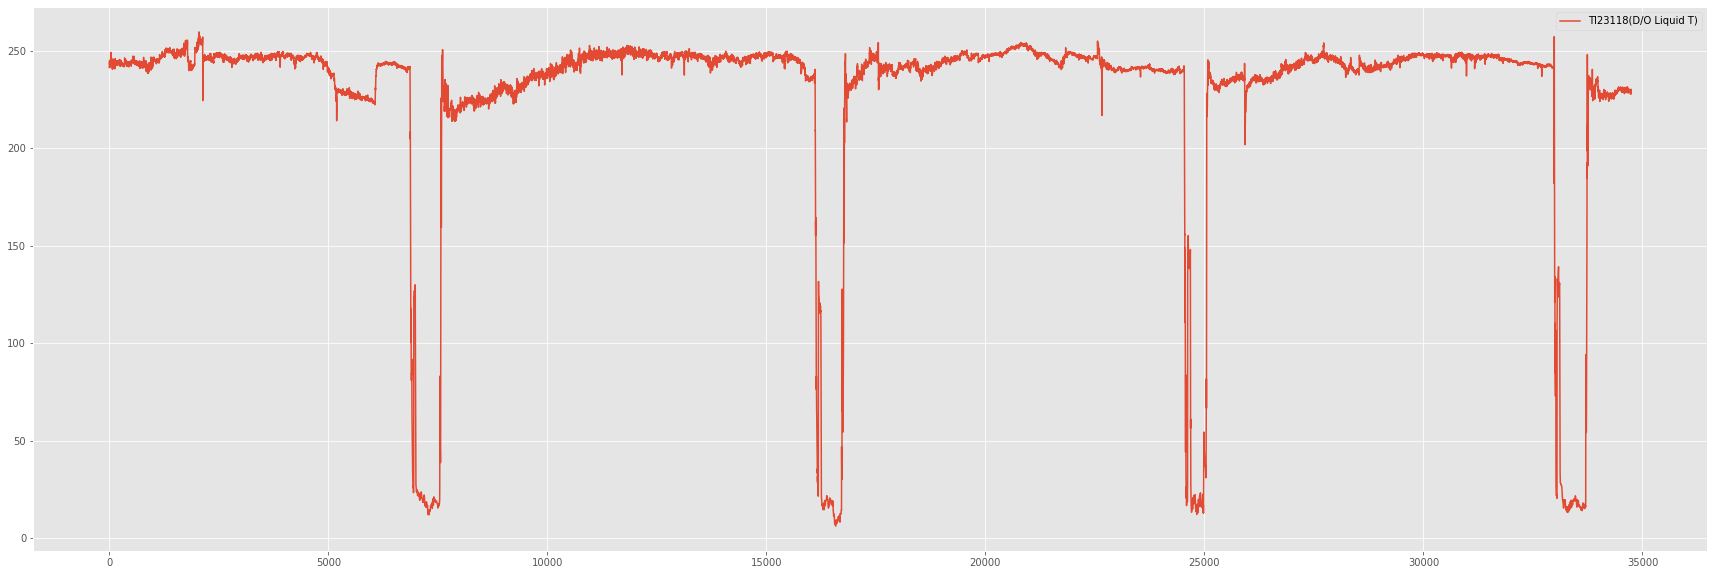

FIC23133(R/D Flow)


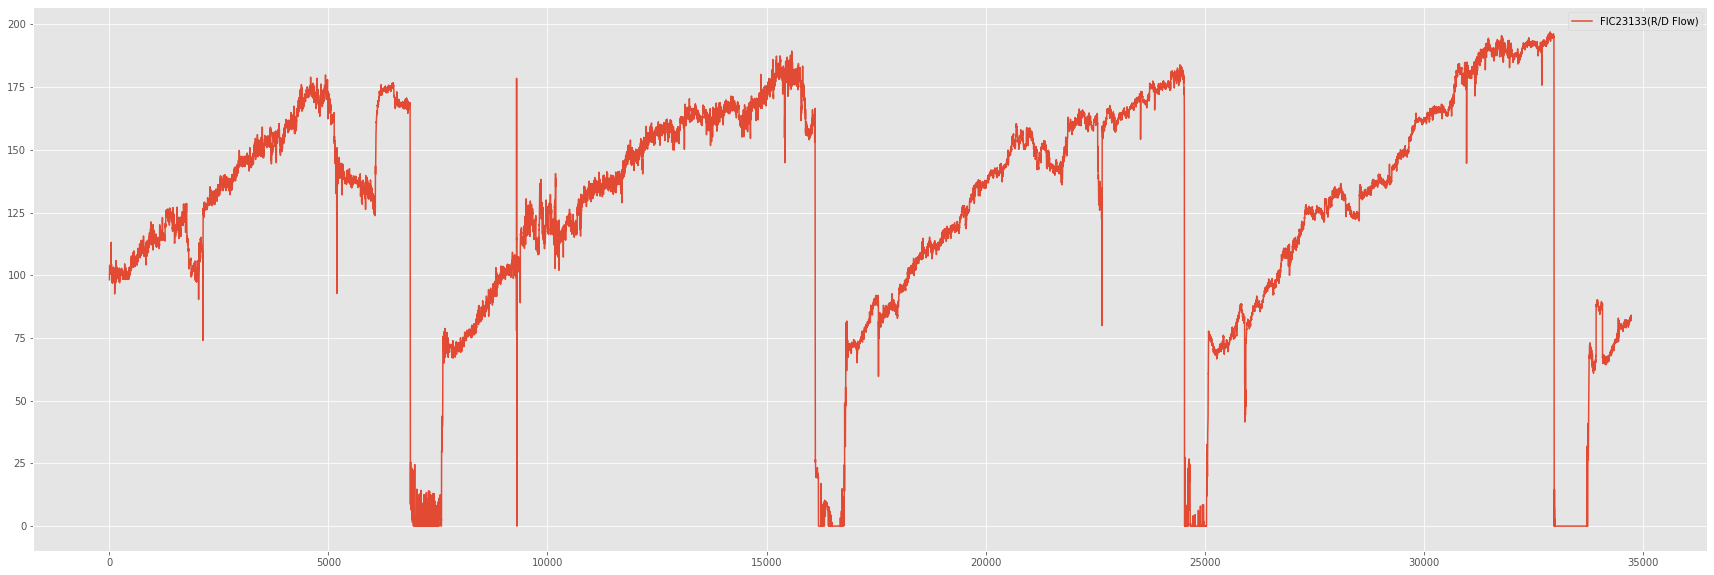

FIC23105(P/A RT Flow)


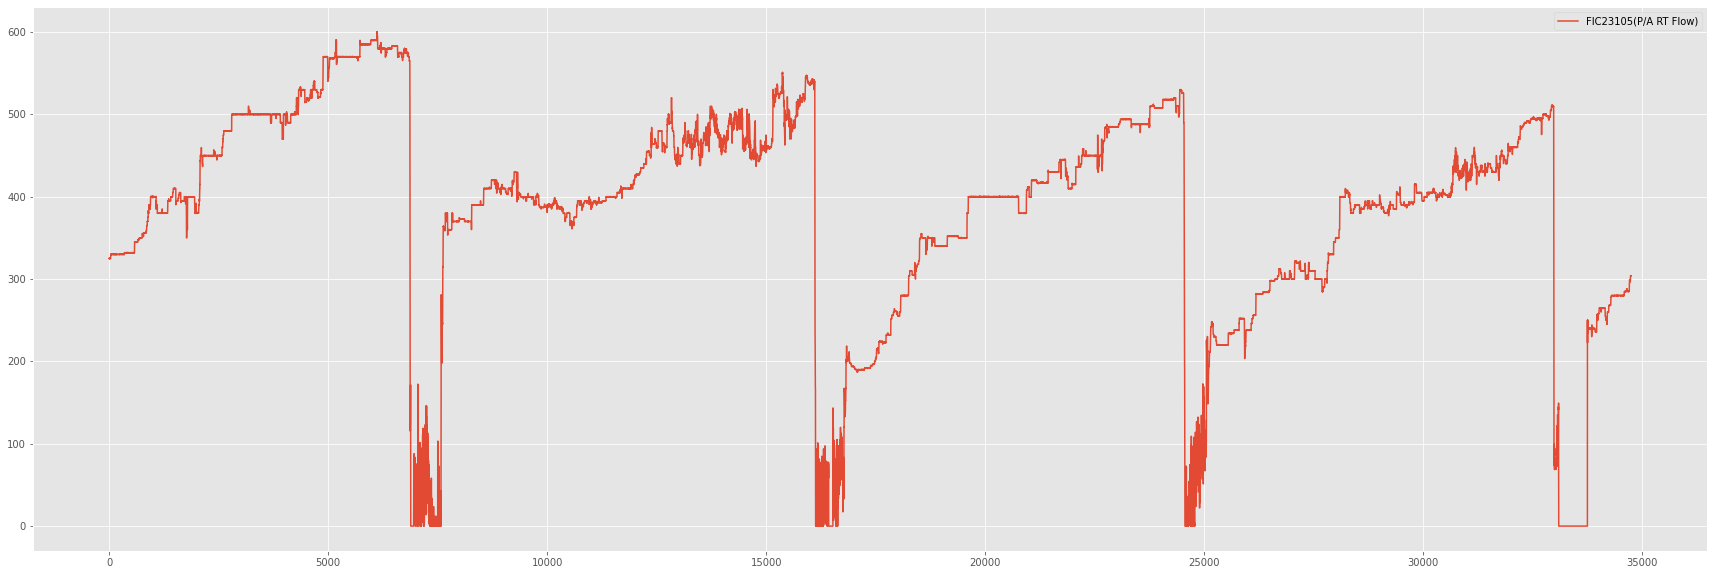

TI23028(P/A RT T)


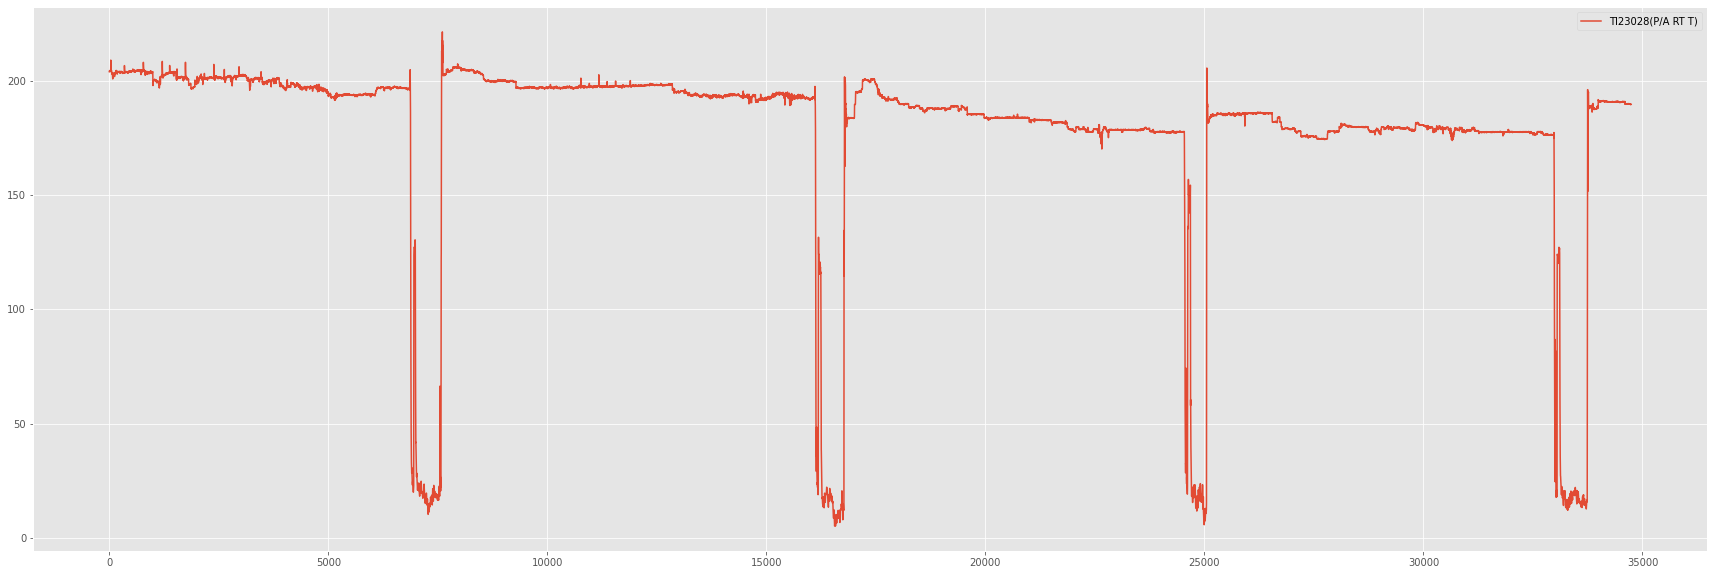

TI21022A(Catalyst T 1)


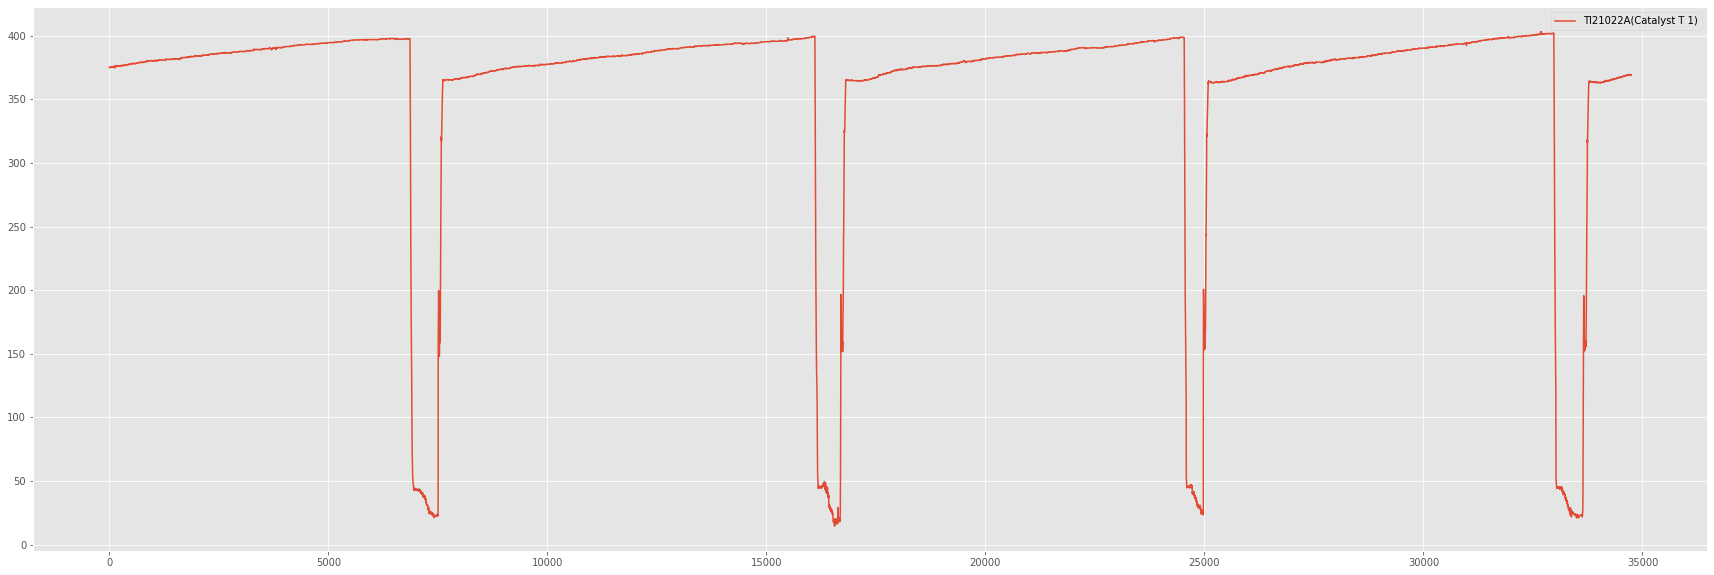

TI21022B(Catalyst T 2)


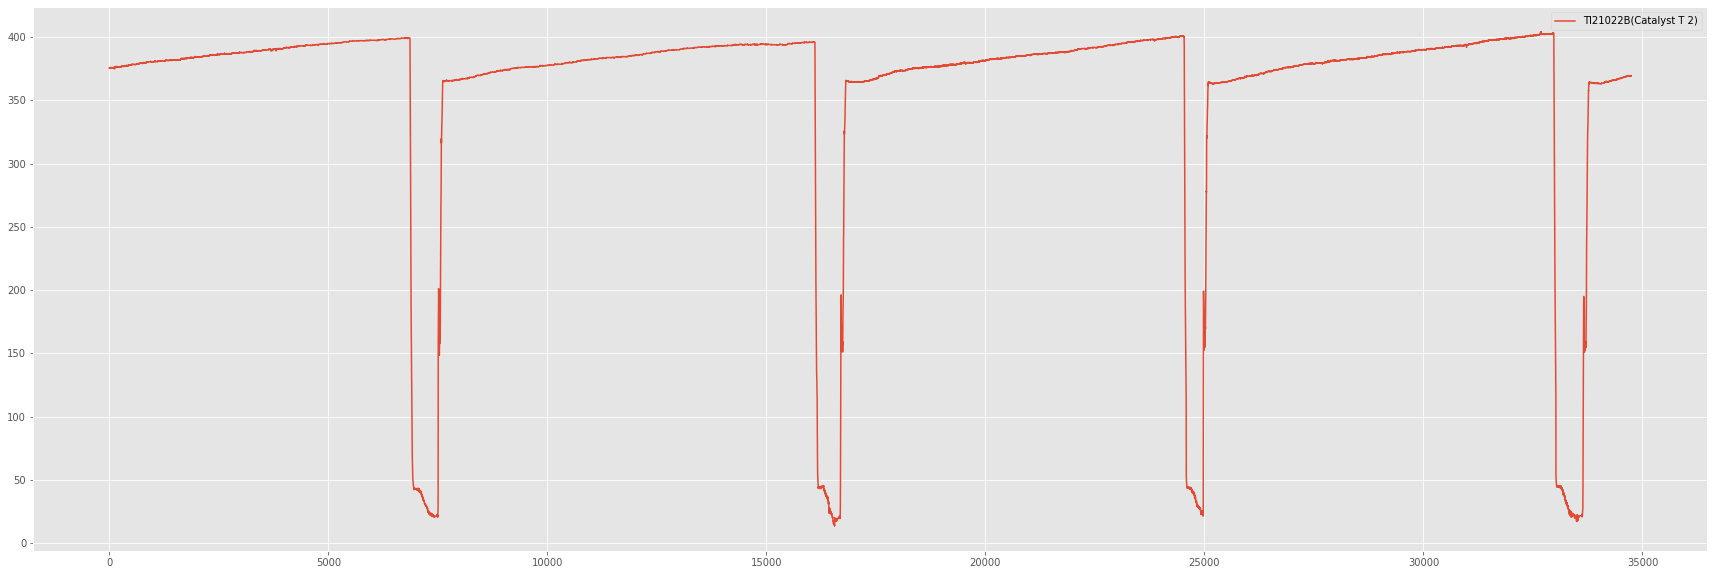

In [ ]:
import seaborn as sns
for col in data.columns[1:]:
  try:
    print(col)
    #sns.barplot(x='base_date',y=col,data=train.groupby(['base_date']).agg({col:'mean'}).reset_index().sort_values(by=['base_date']))
    target = train.loc[:,col]
    target.describe()
    plt.figure(figsize=(30,10))
    plt.plot(target, label=col) 
    plt.legend()
    plt.show()
  except:
    continue

DSL D-95


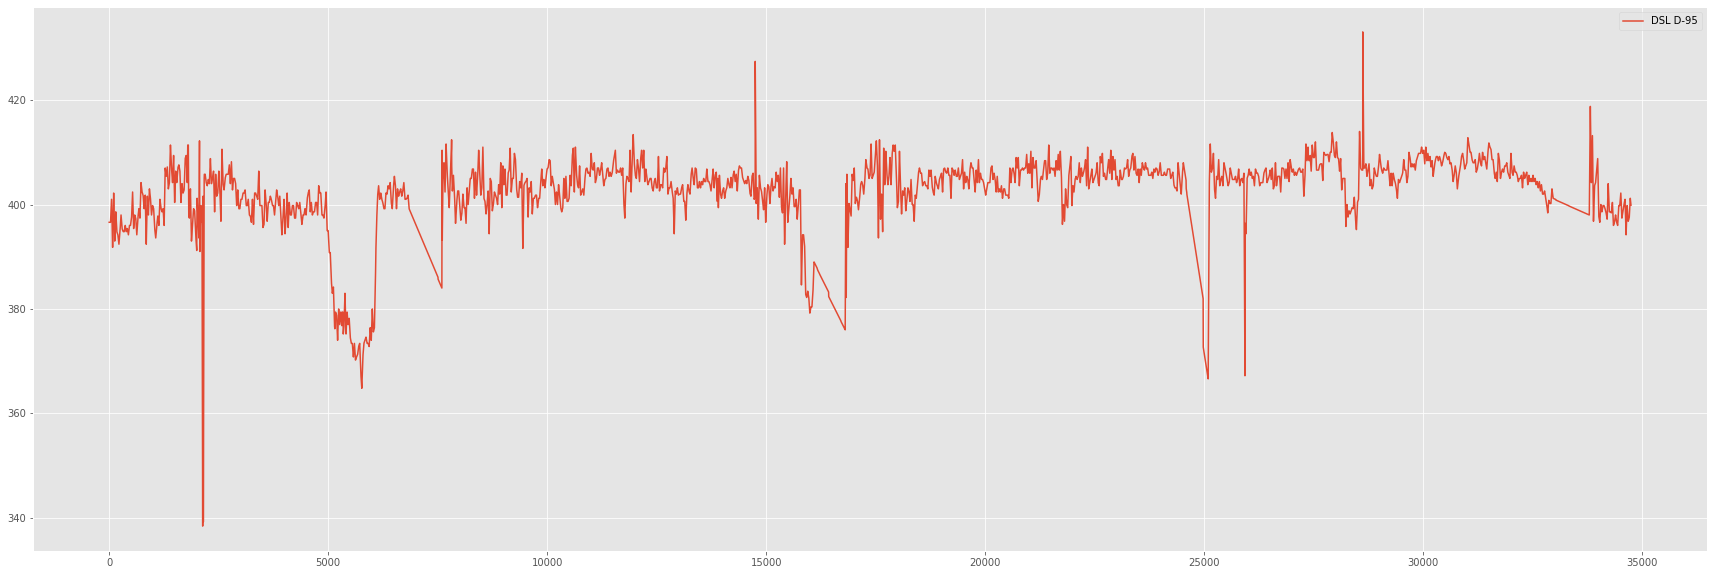

FIC21185(F1 Flow)


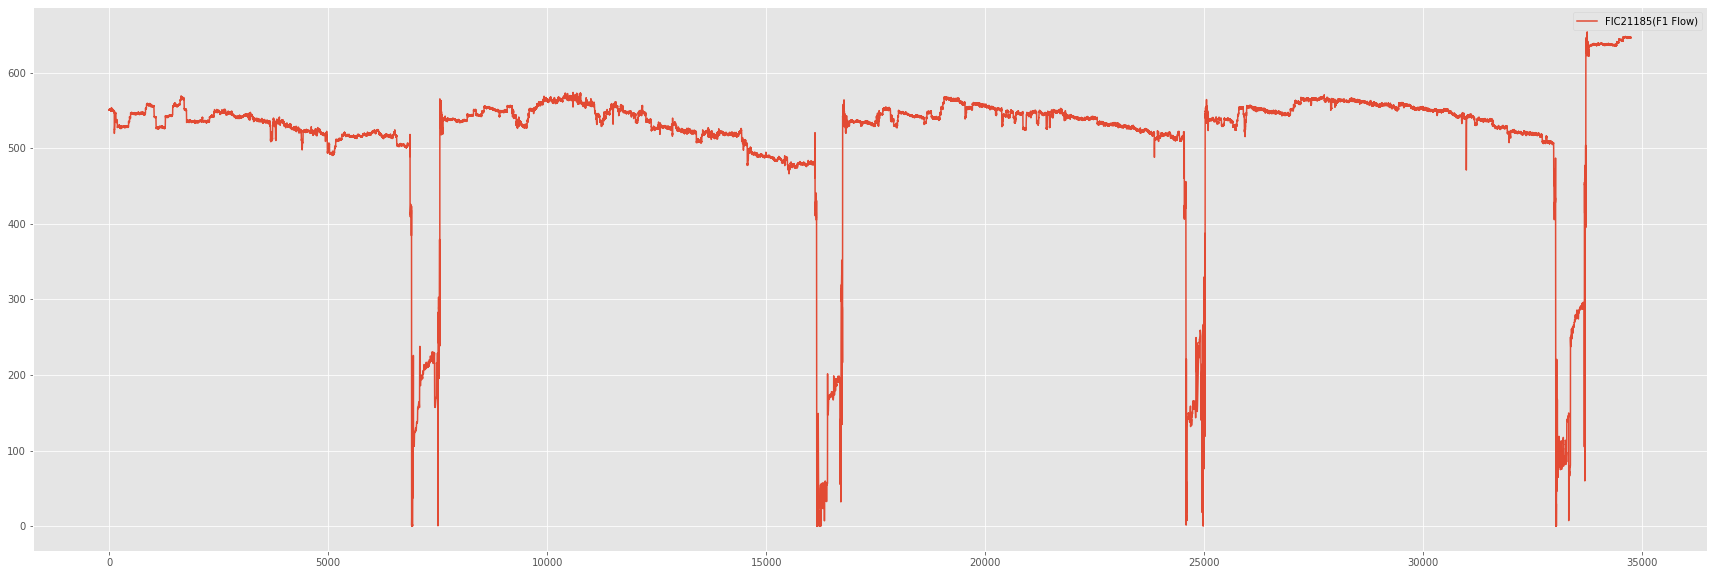

FIC21192(F2 Flow)


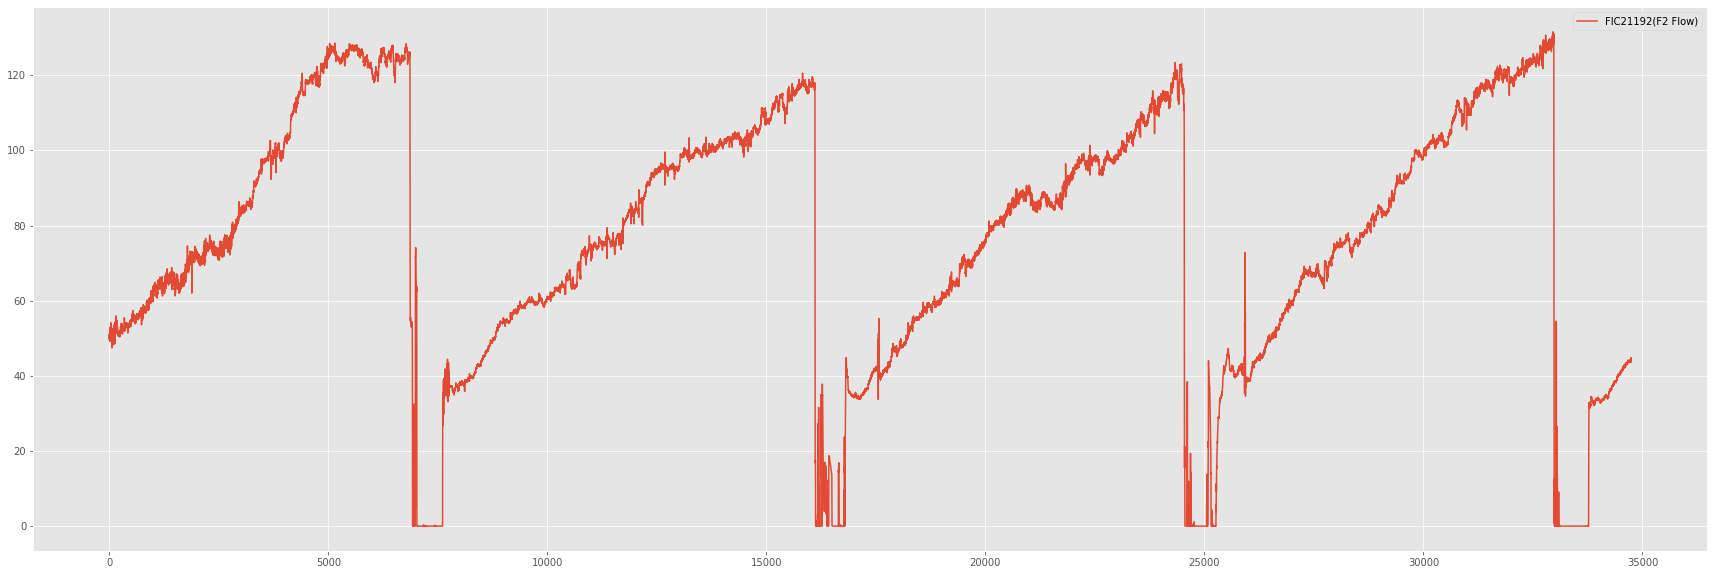

TIC23115(Feed1 T)


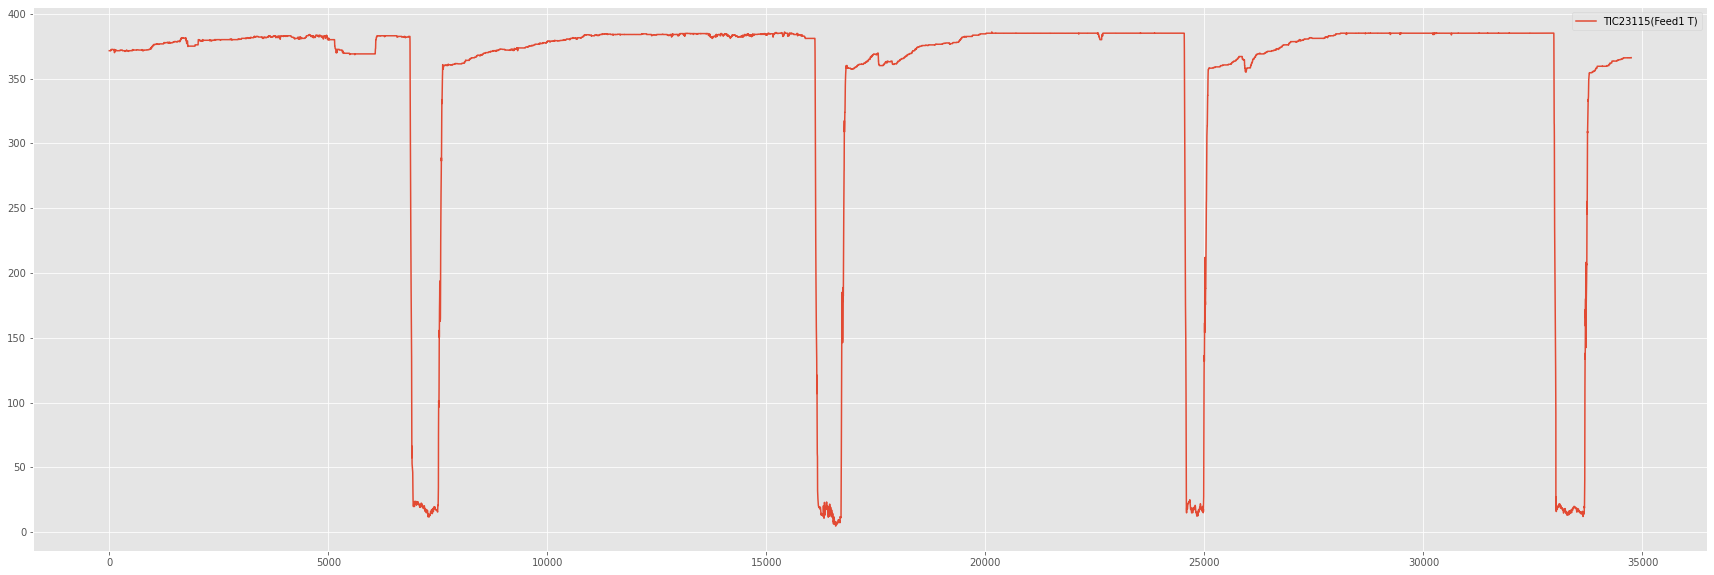

TI23029(Feed2 T)


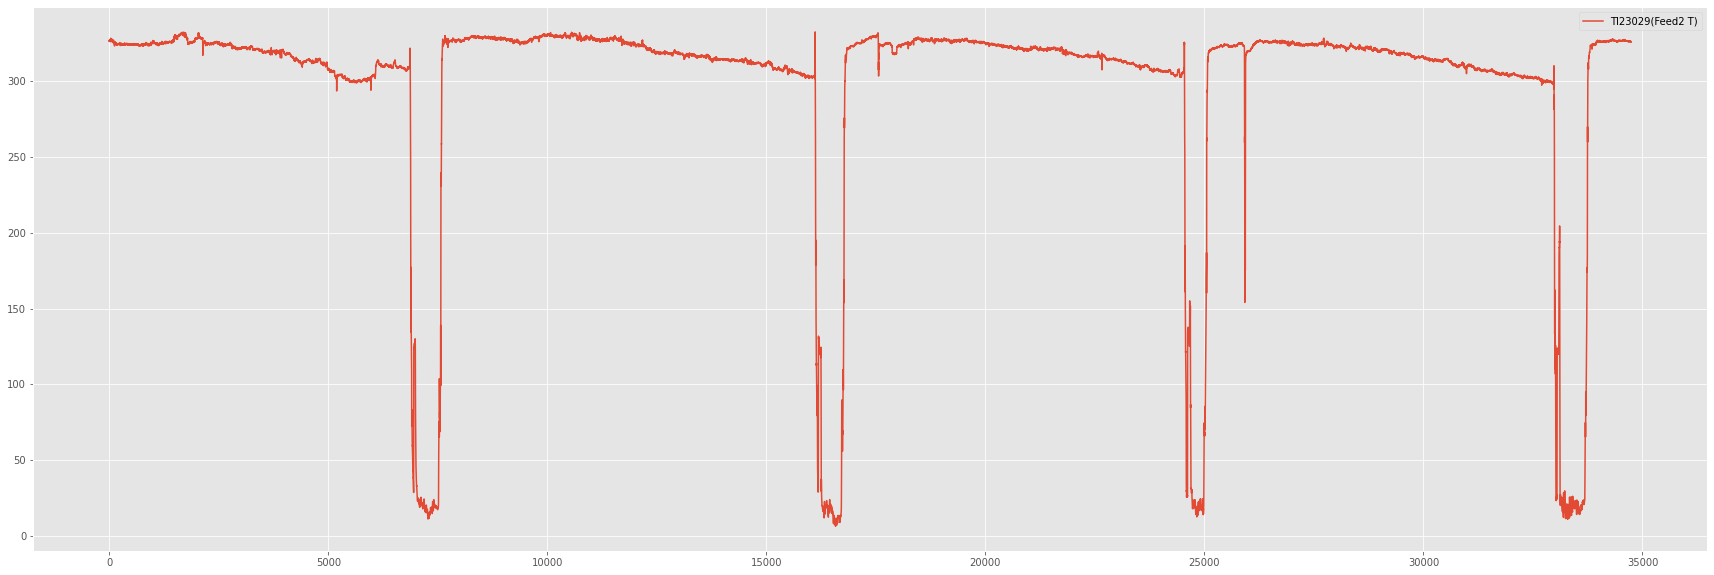

FIC23108(SS Flow)


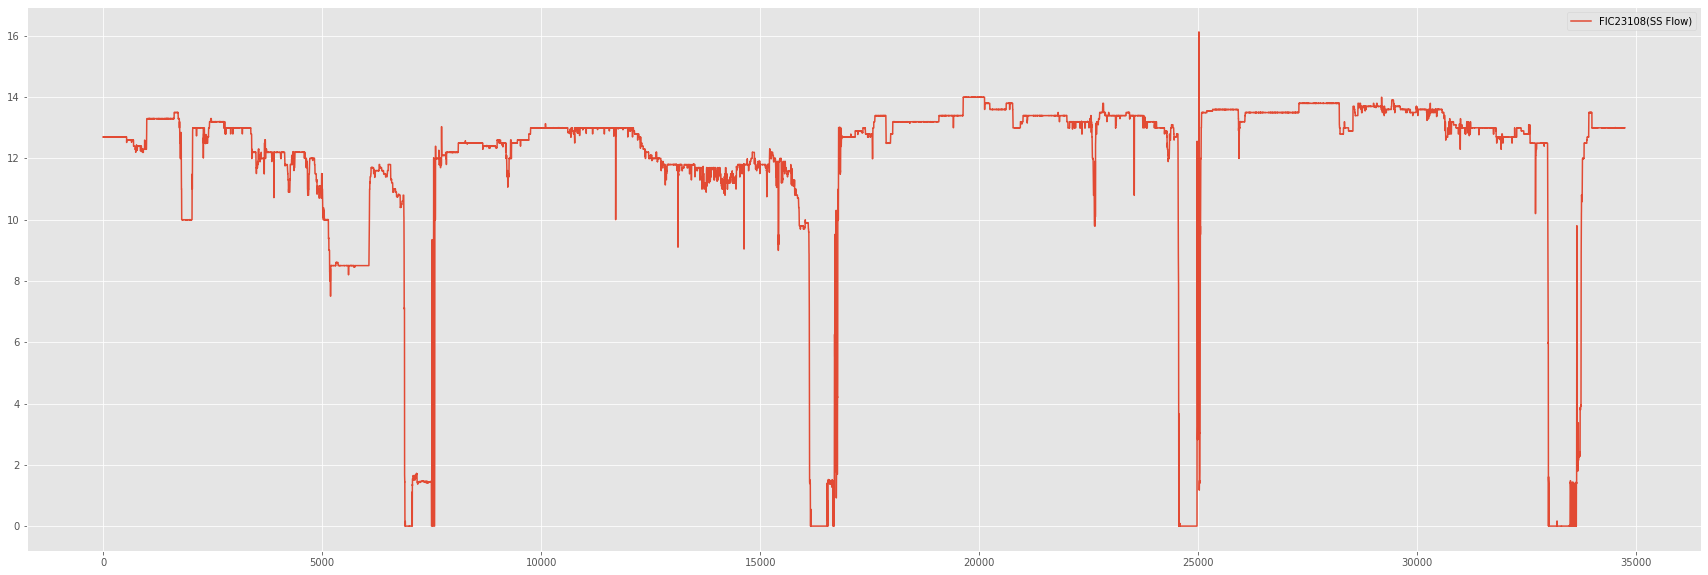

PI23105(F Zone P)


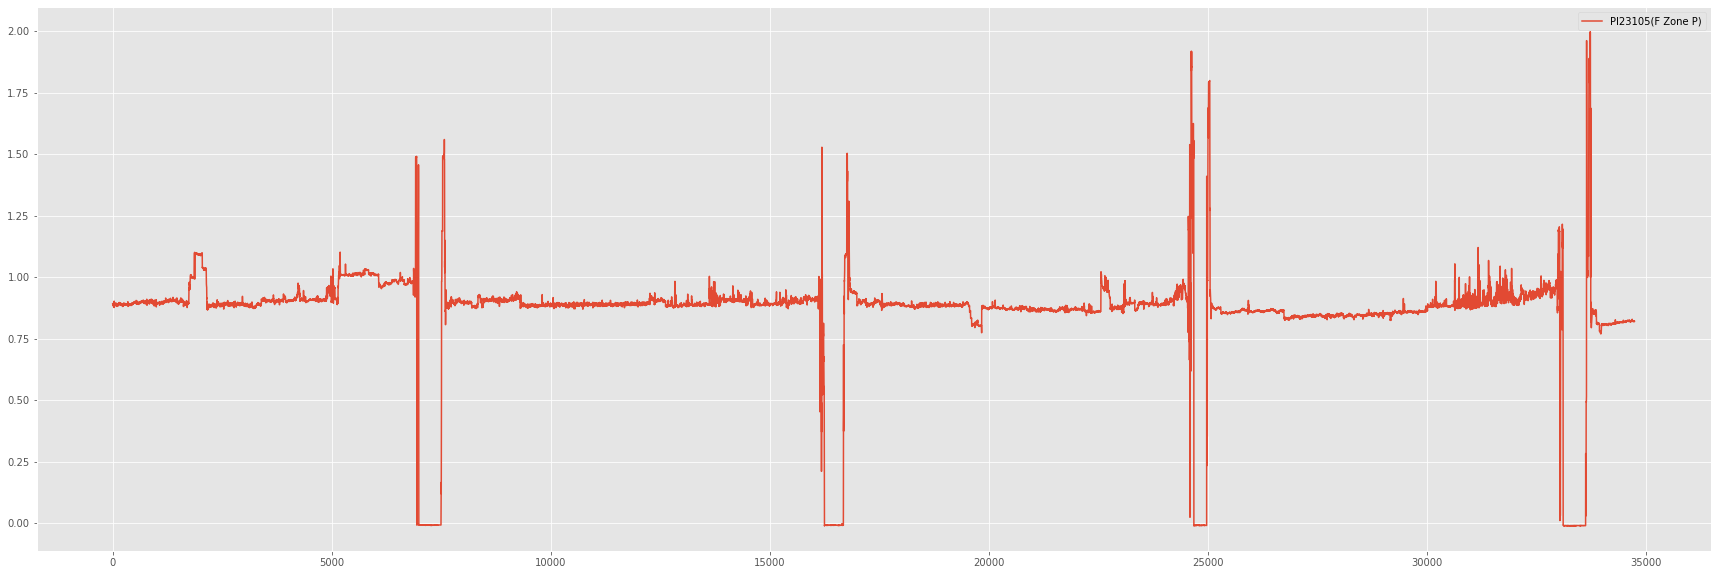

TI23120(F Zone T)


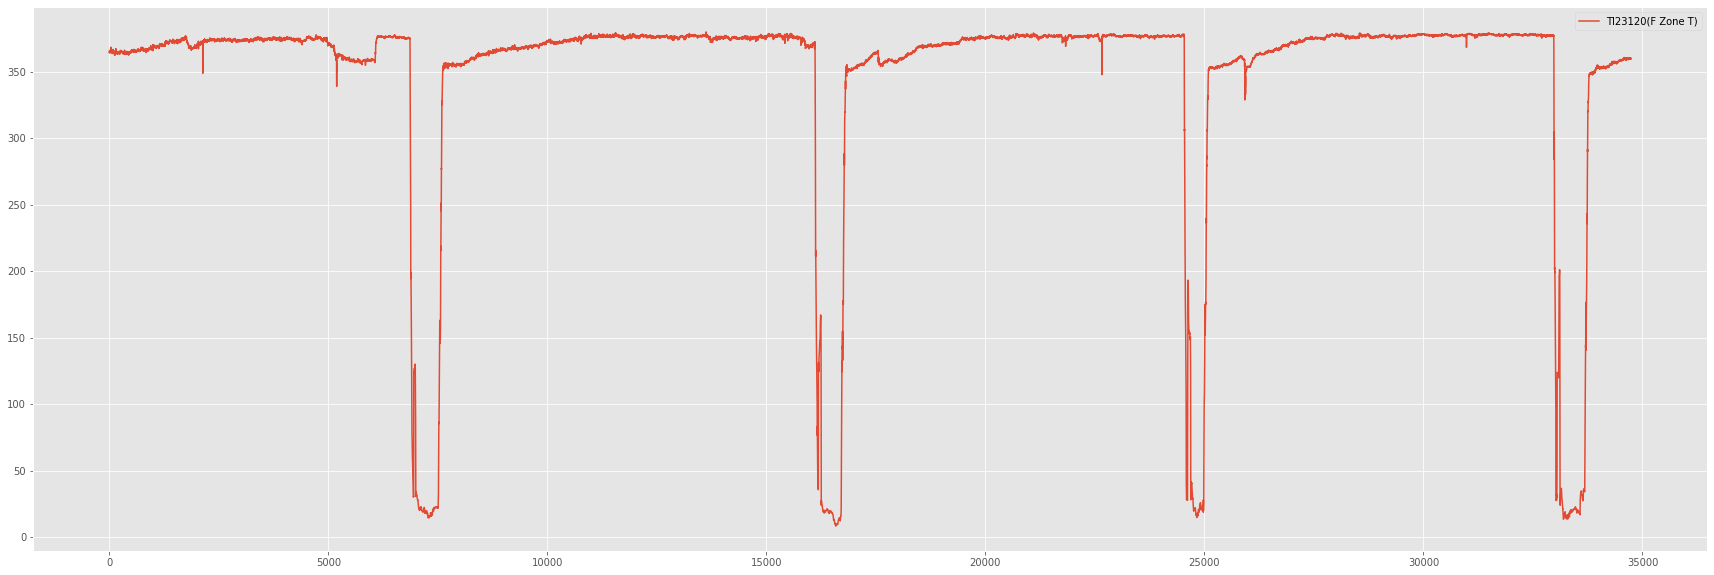

TI23121(SS T)


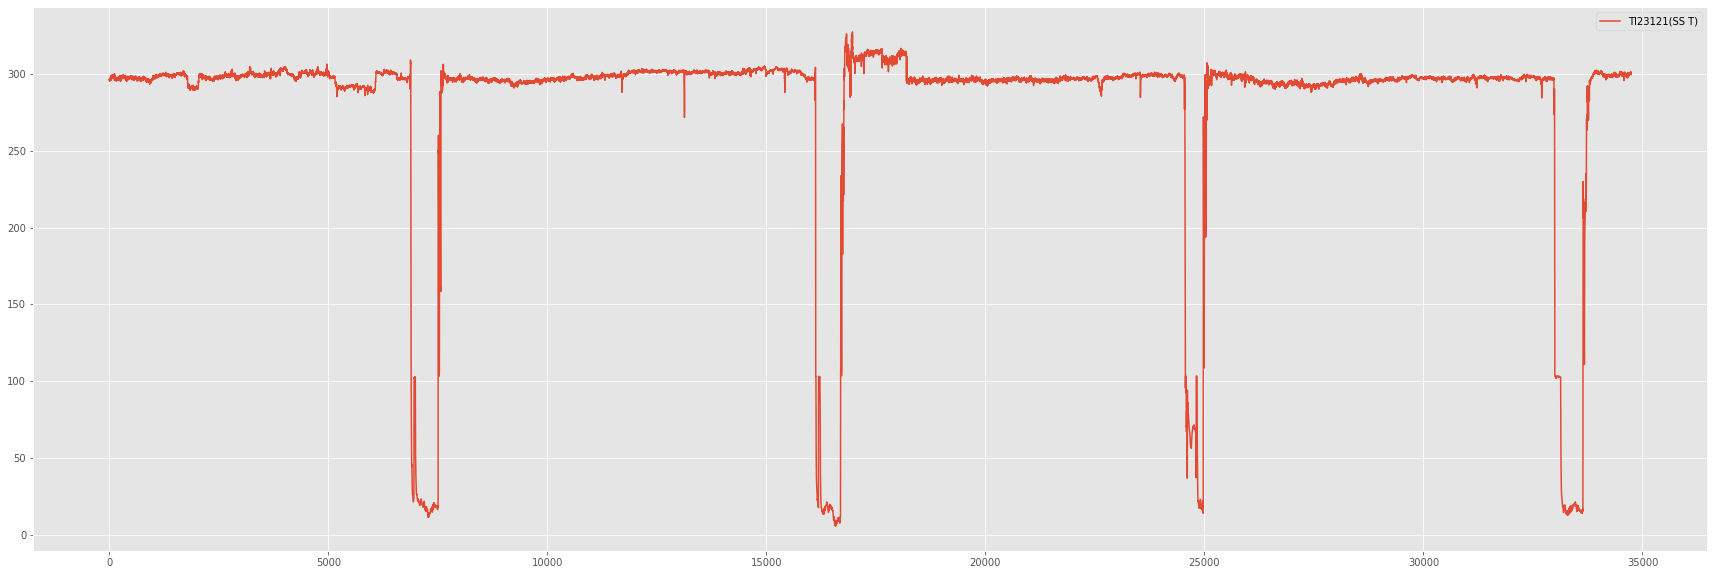

PI23038(BTM P)


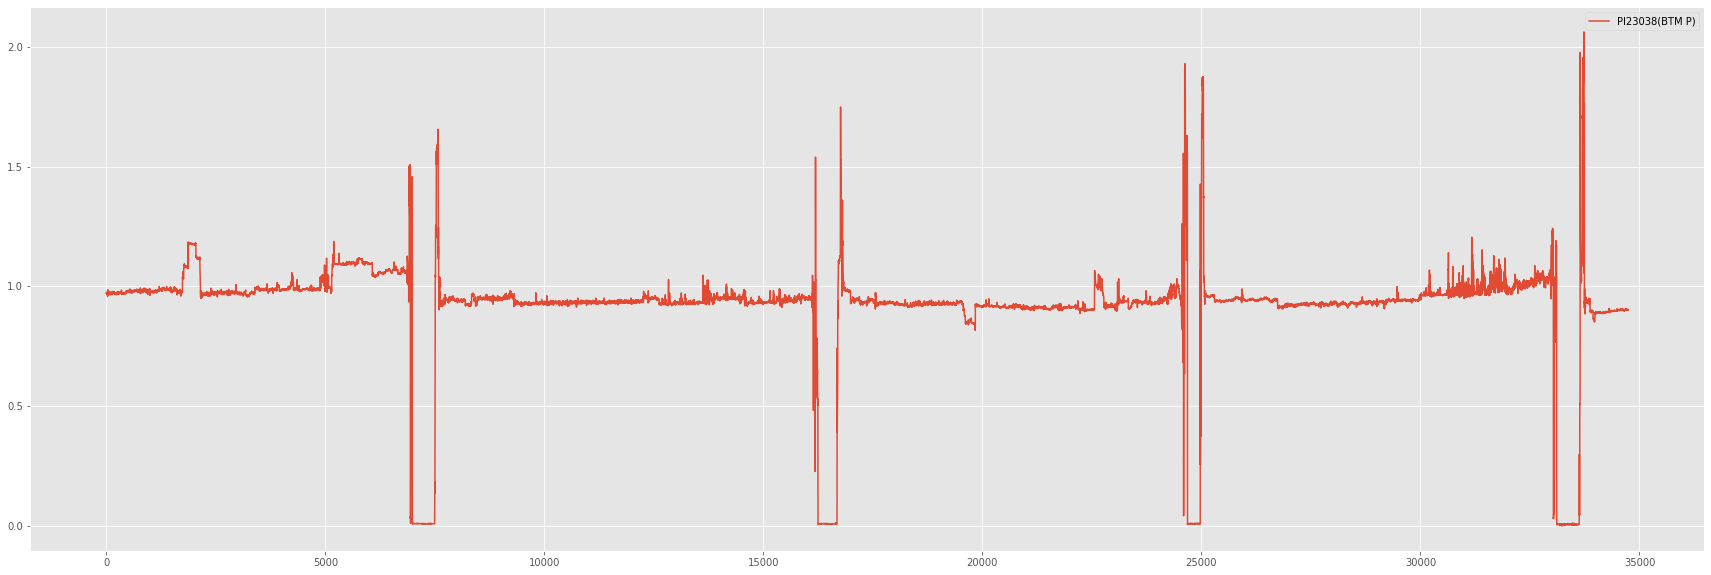

TI23123(Reflux T)


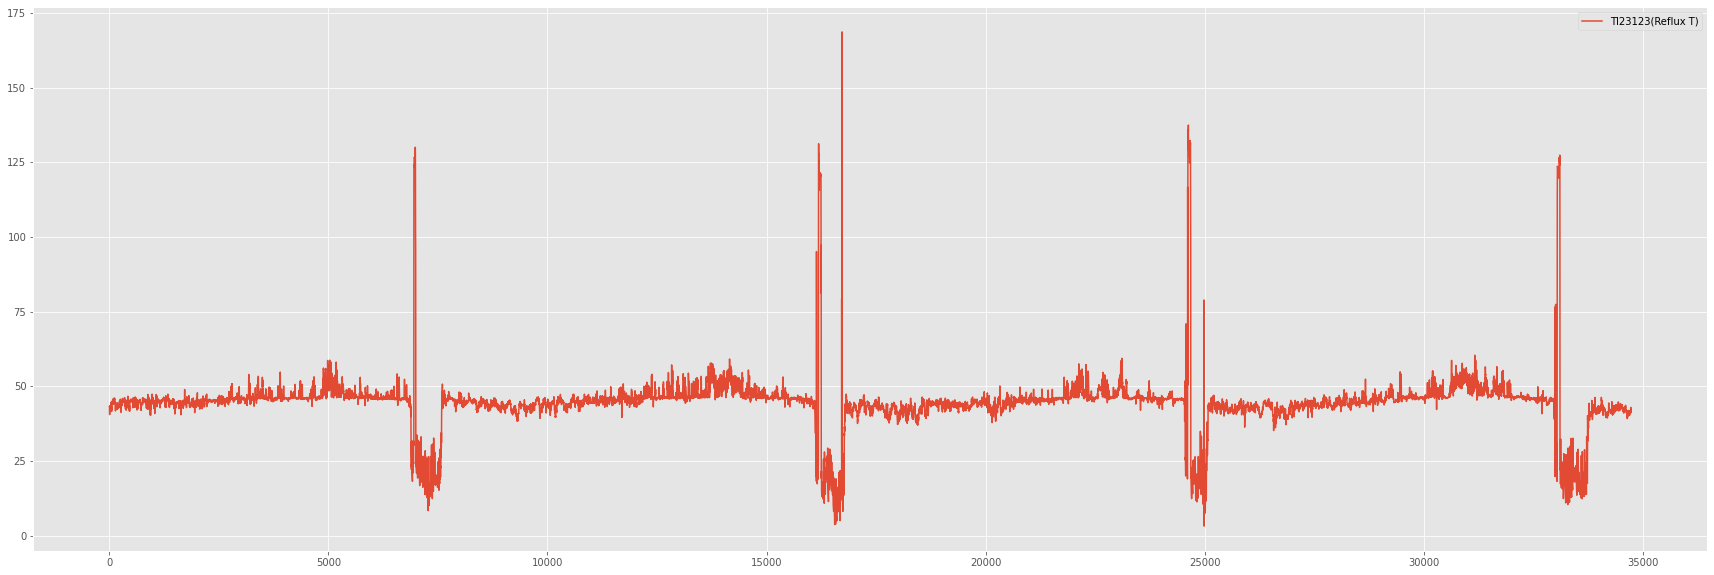

TI23502(D/O Vapor T)


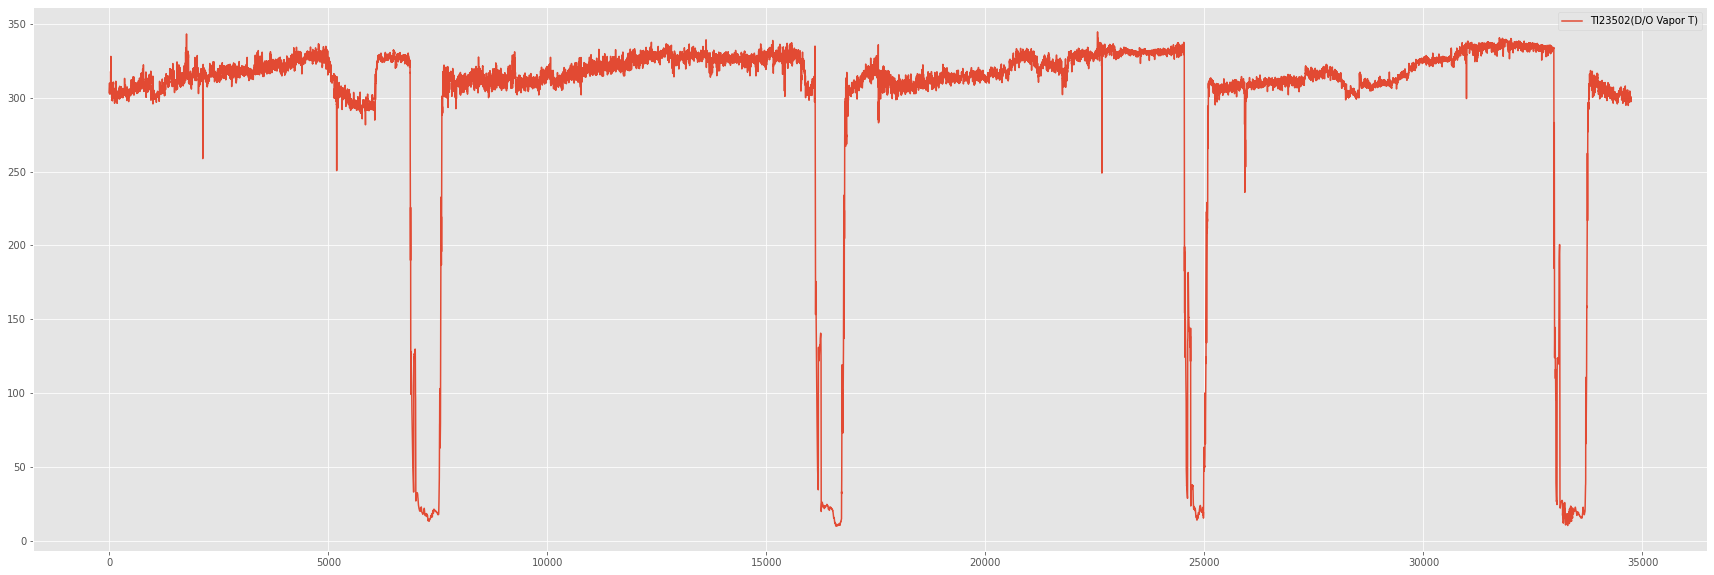

FI23107(OF Flow)


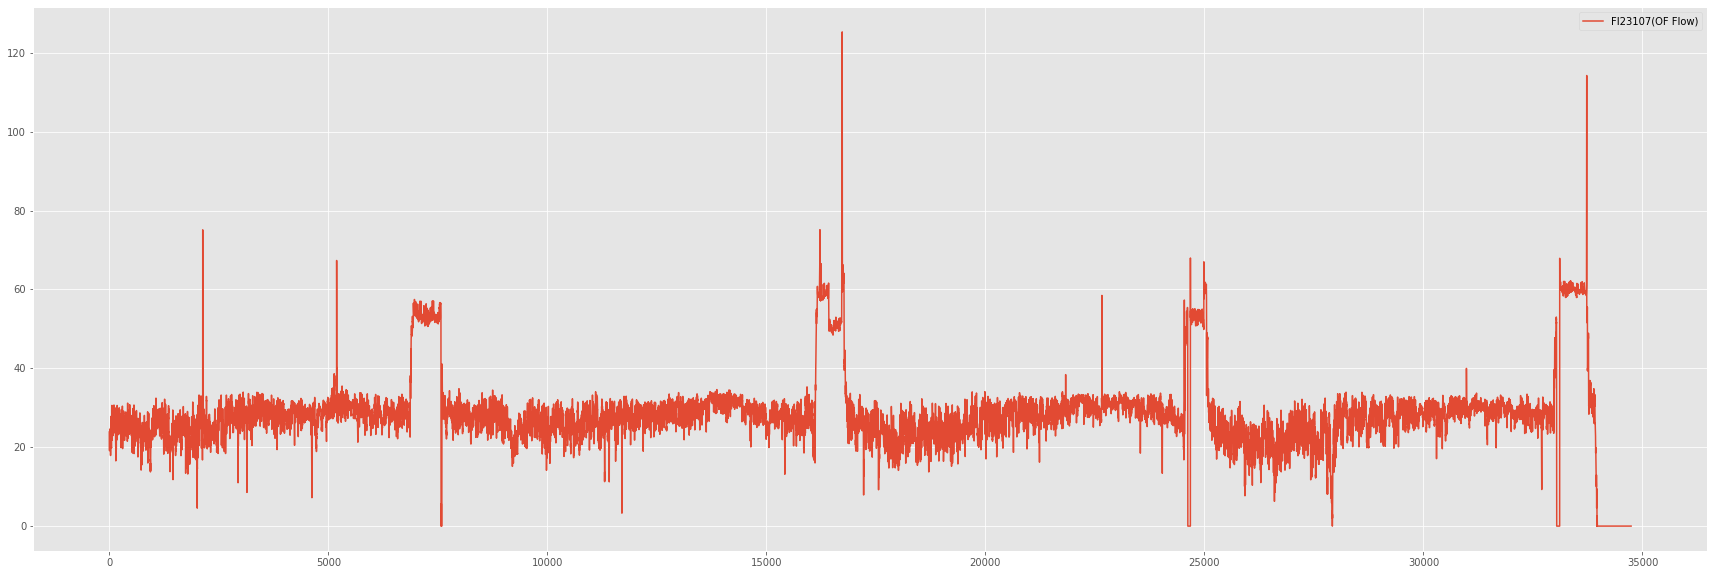

TI23122(BTM T)


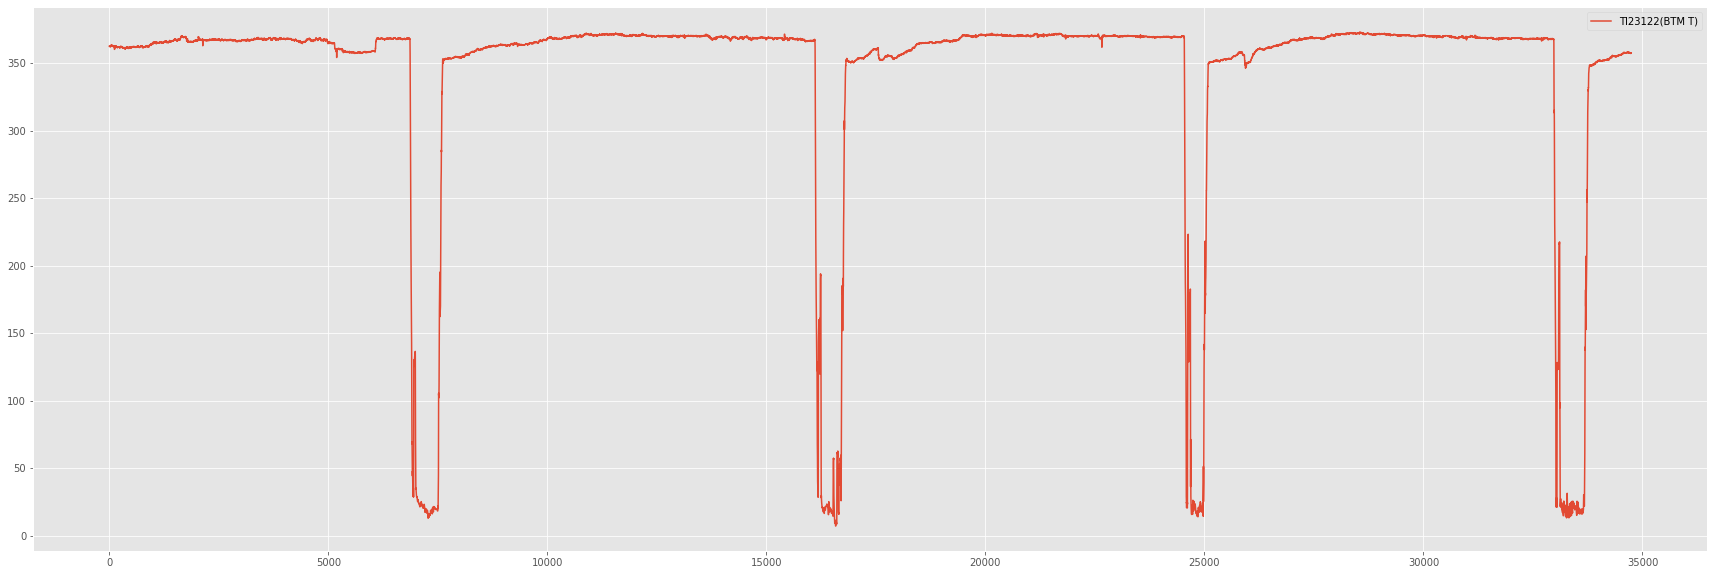

TI23116(Top T)


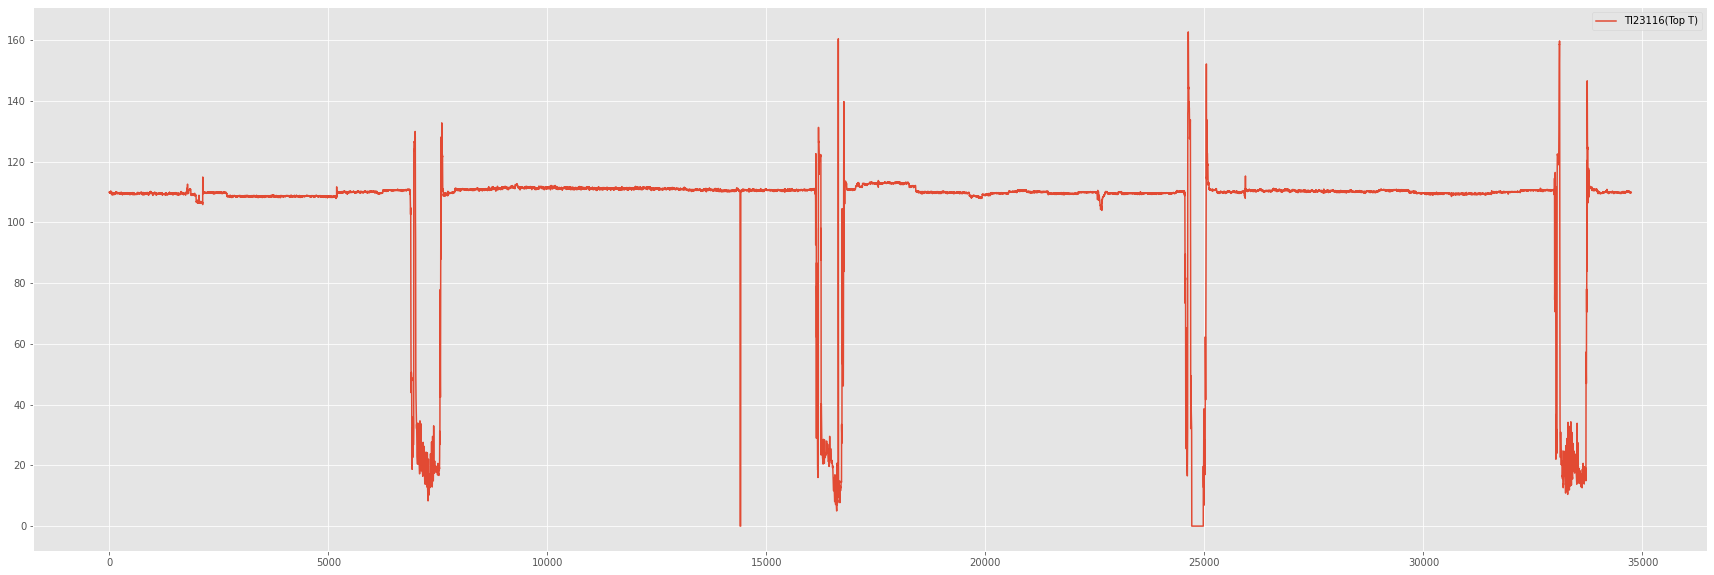

TI23117(DSL S Vapor T)


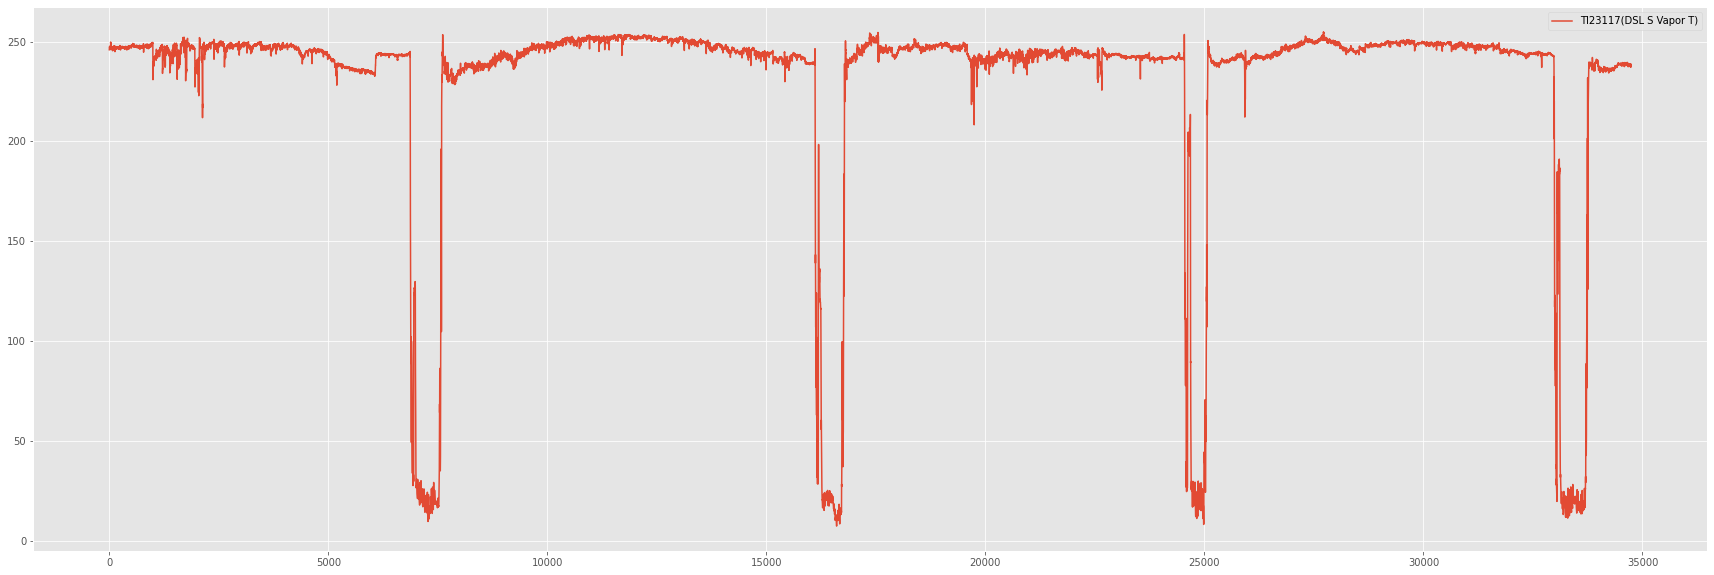

TI23119(OV T)


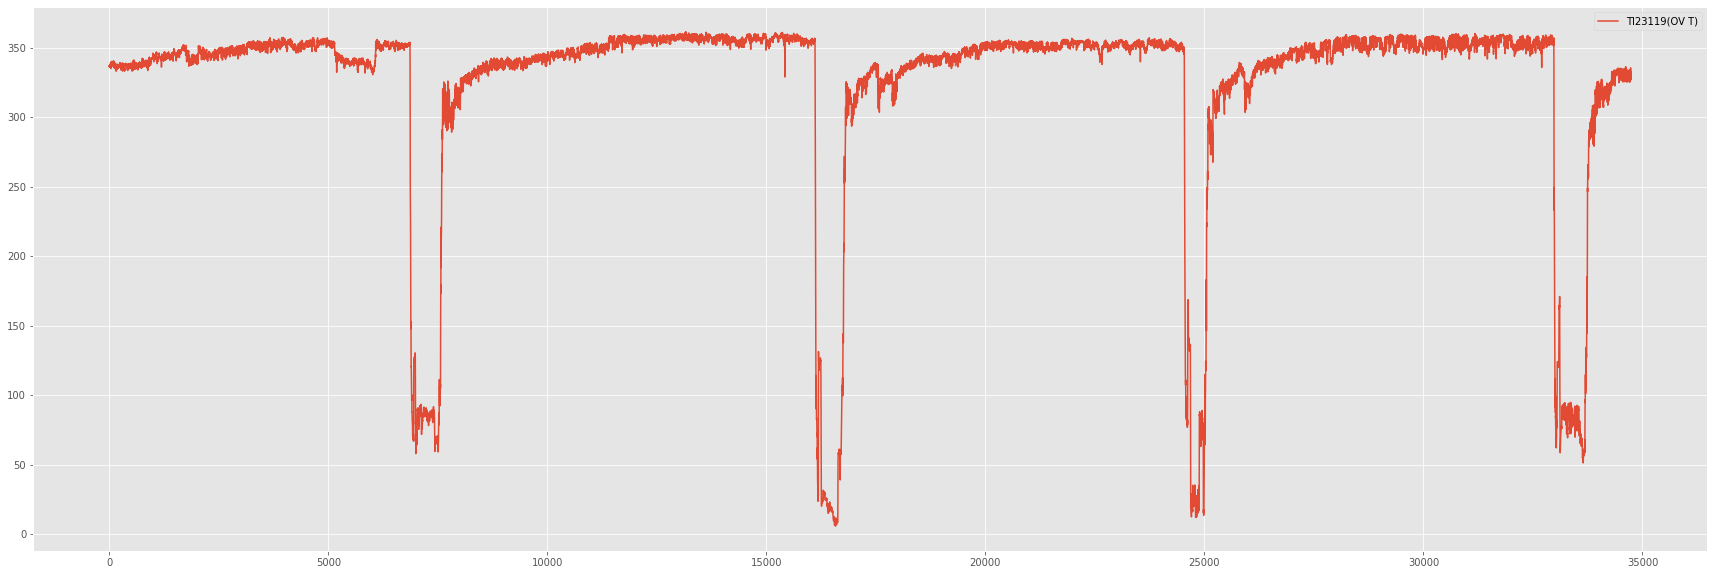

PIC23106(Top P)


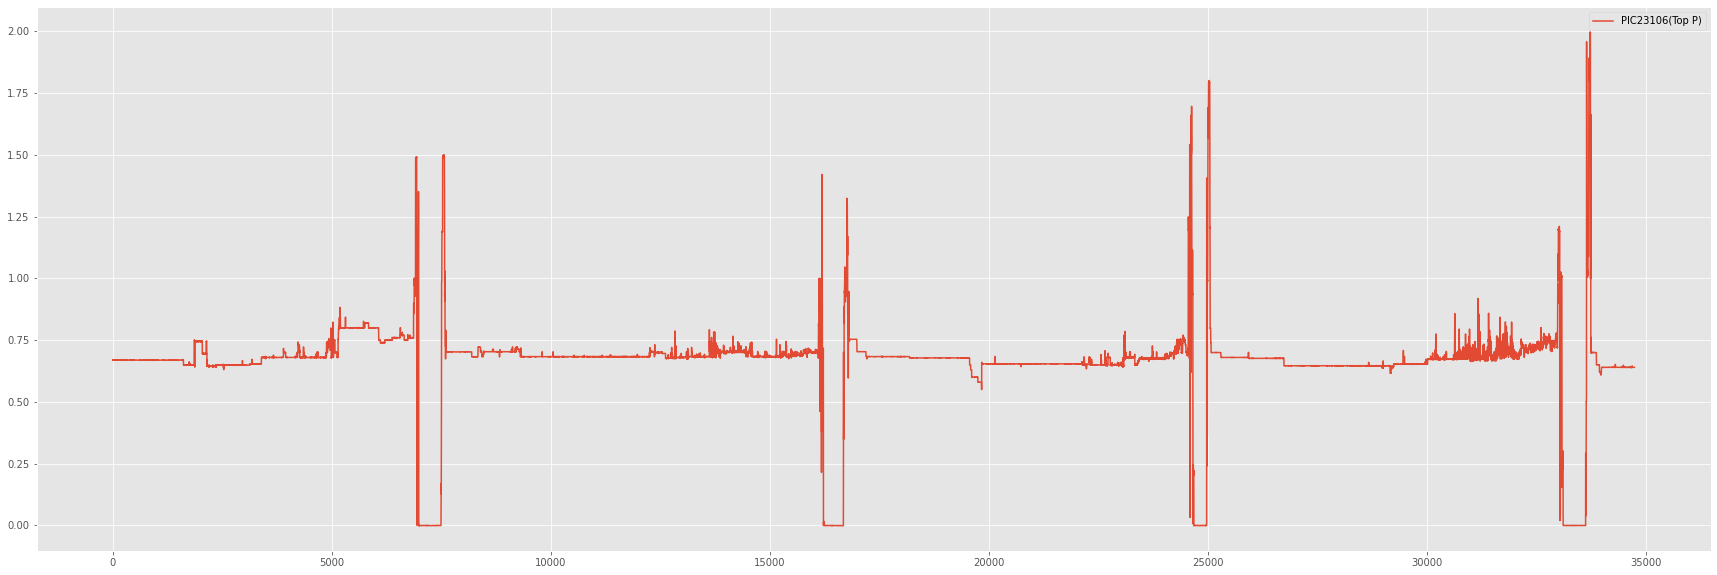

FIC23104(Reflux F)


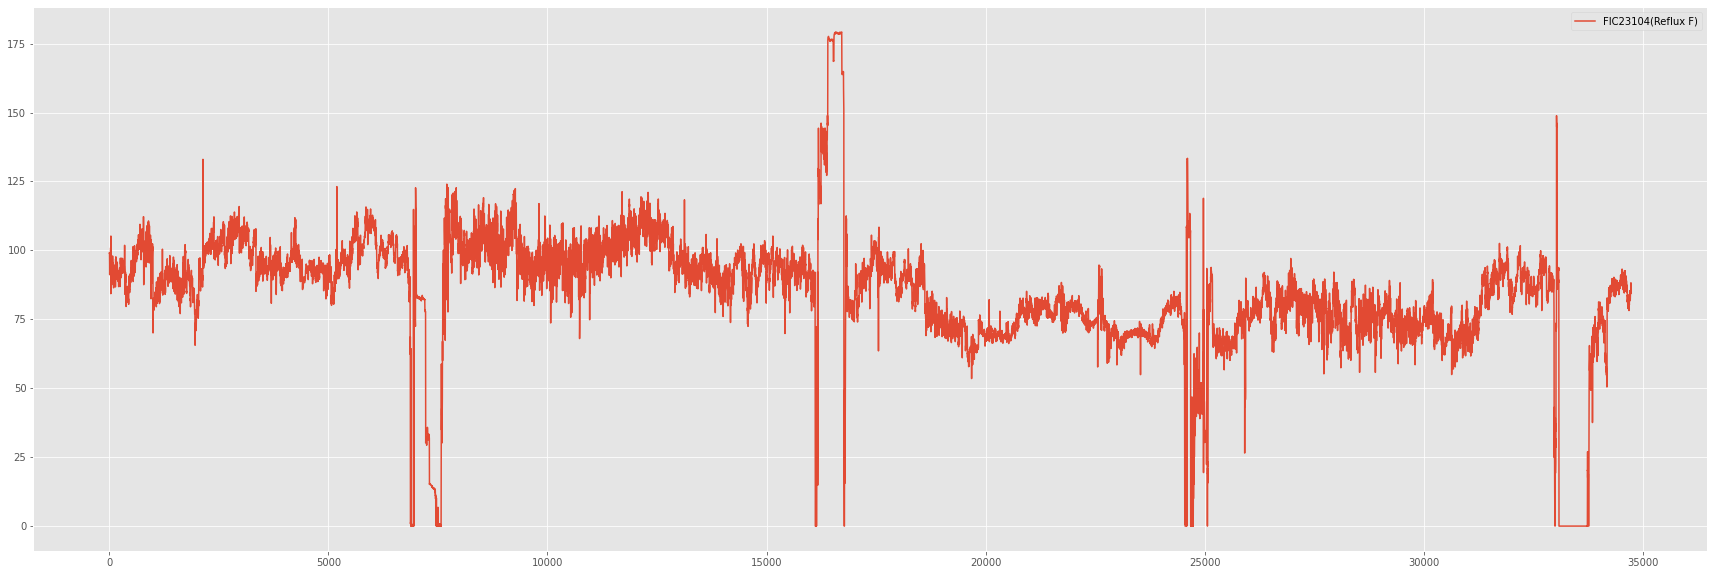

FIC23010(D/O Flow)


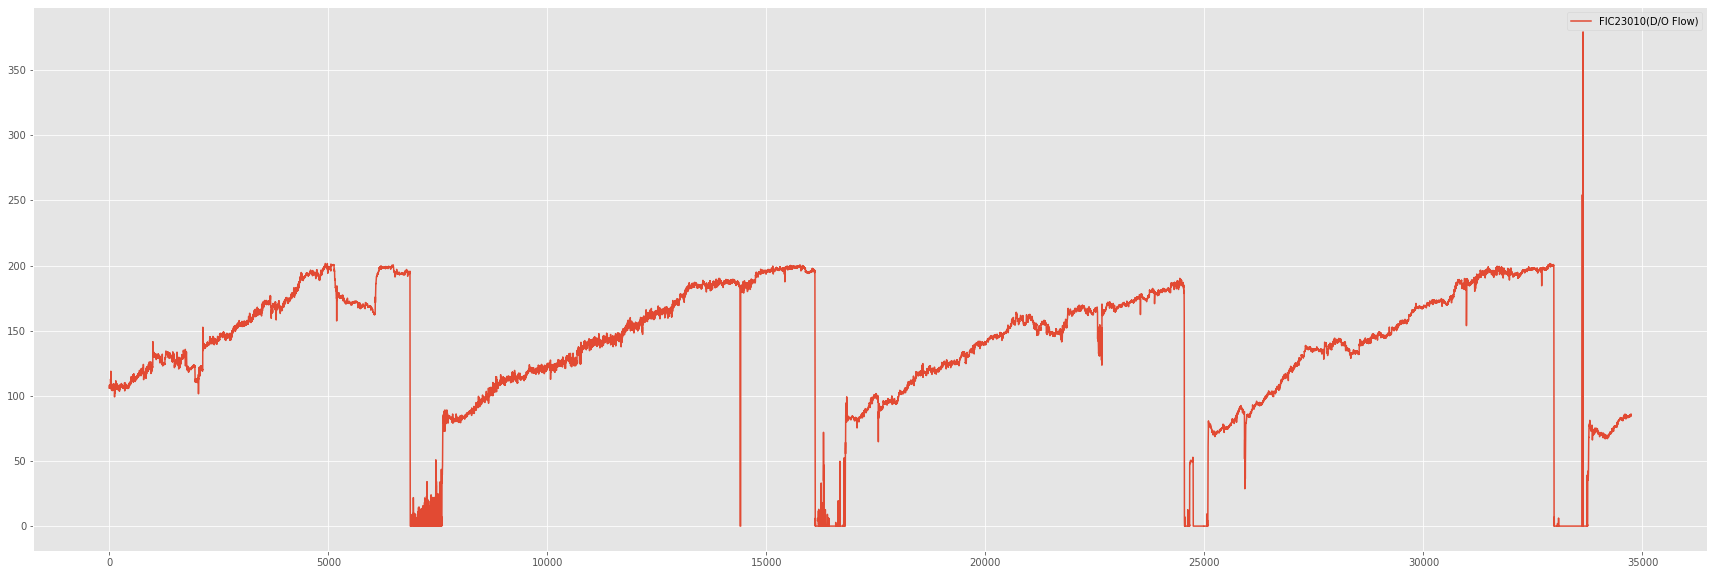

FI23116(T-AR Flow 1)


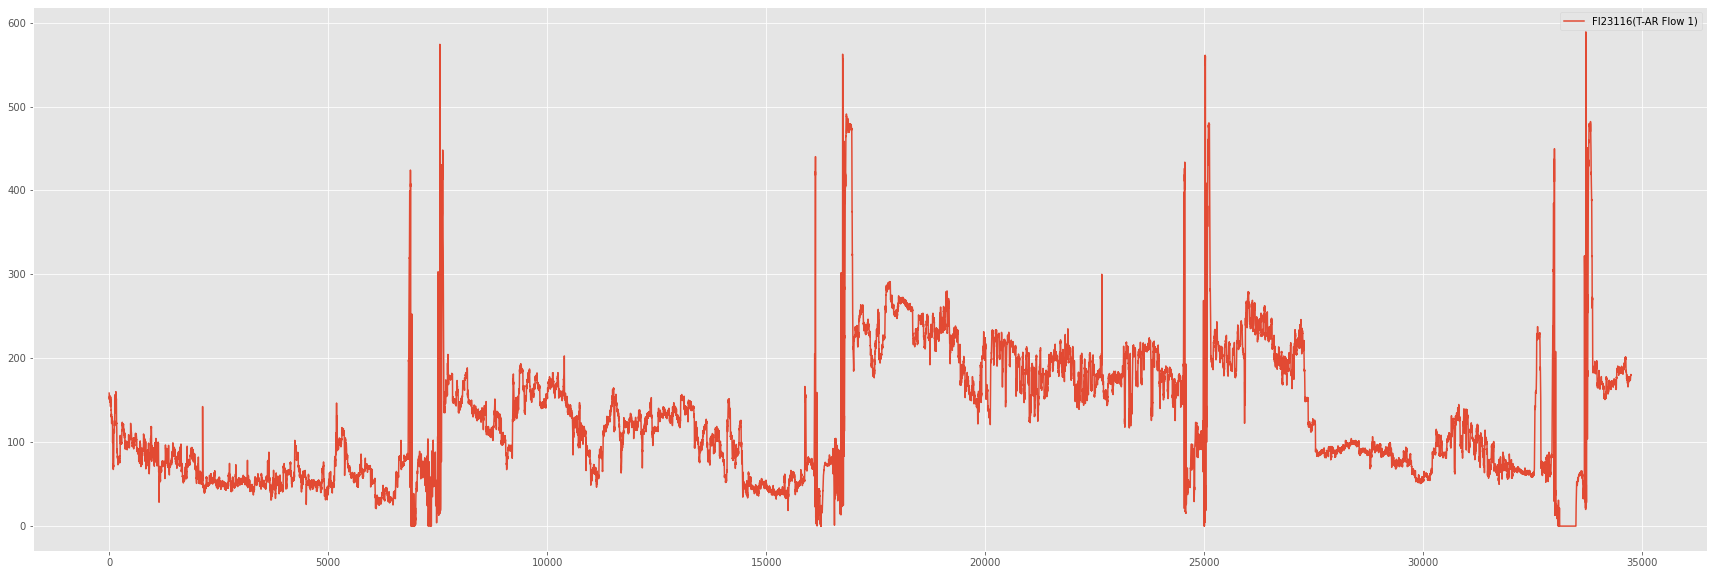

FI23117(T-AR Flow 2)


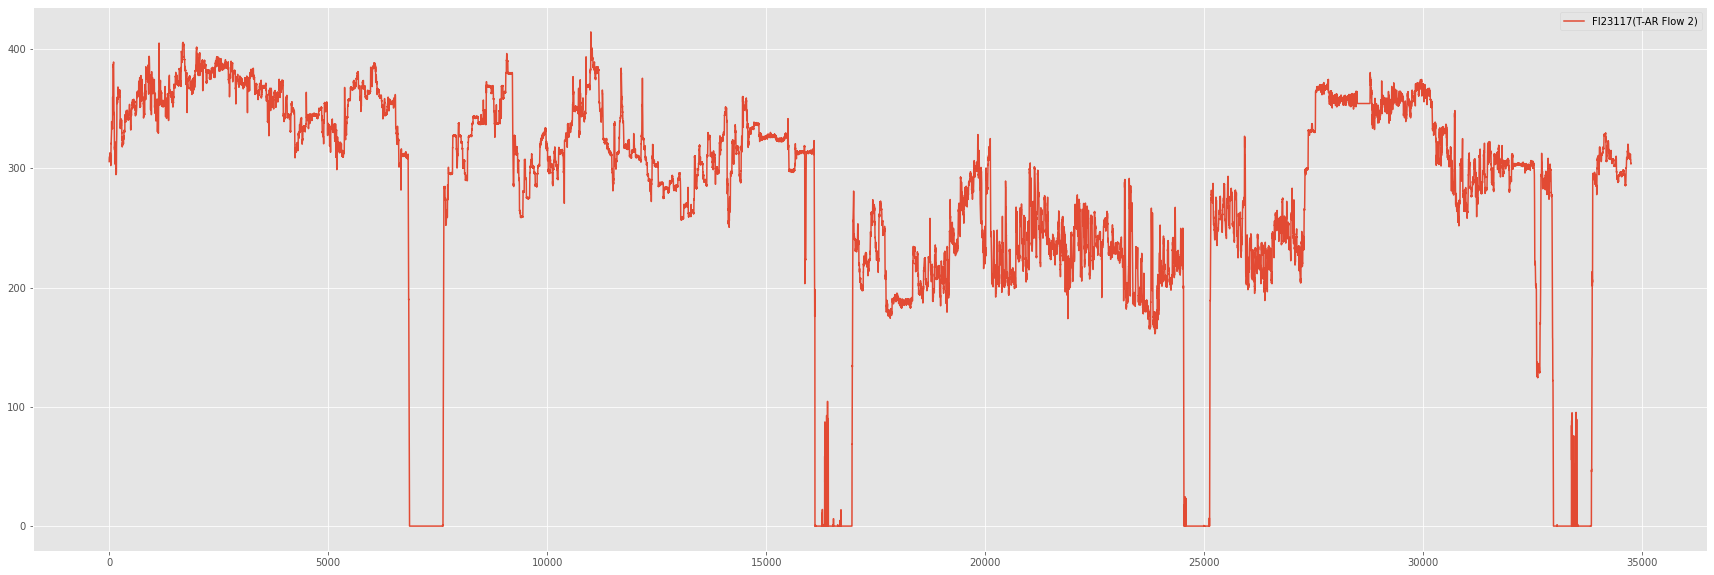

FIC25103(OVHD Flow 1)


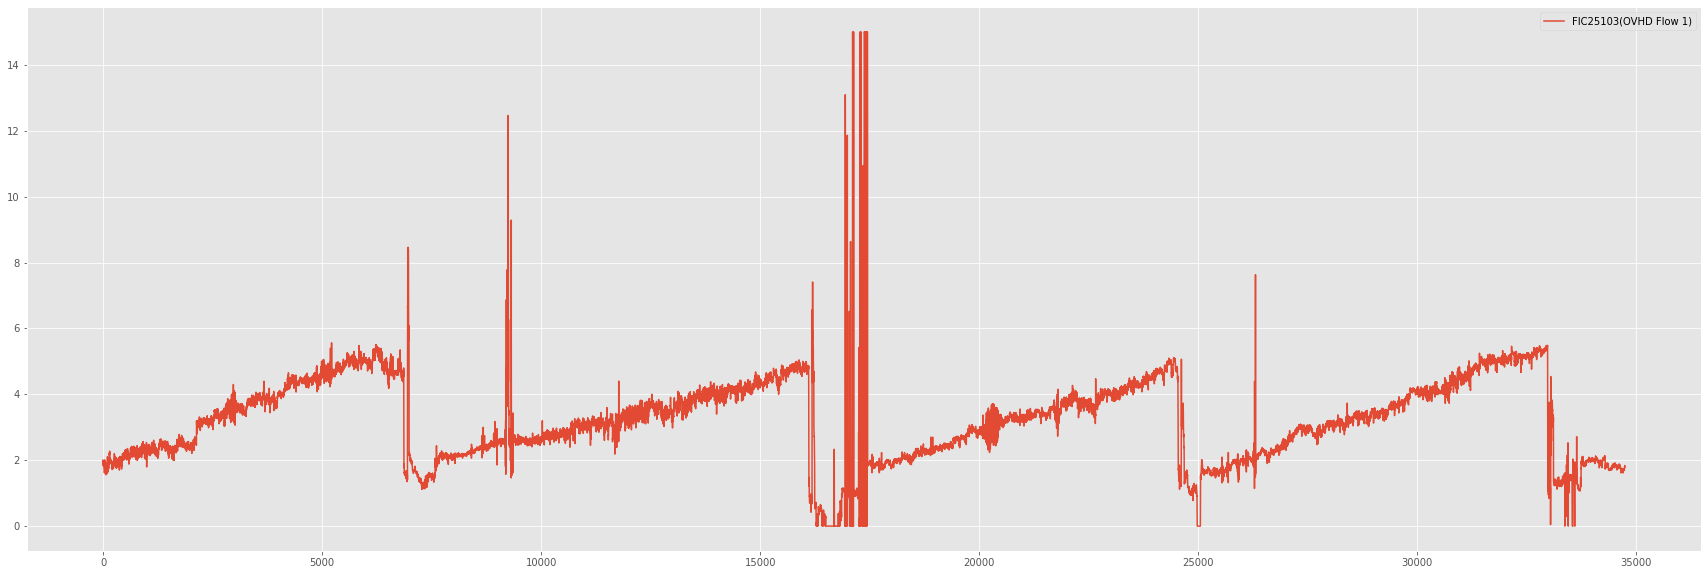

FIC23110(OVHD Flow 2)


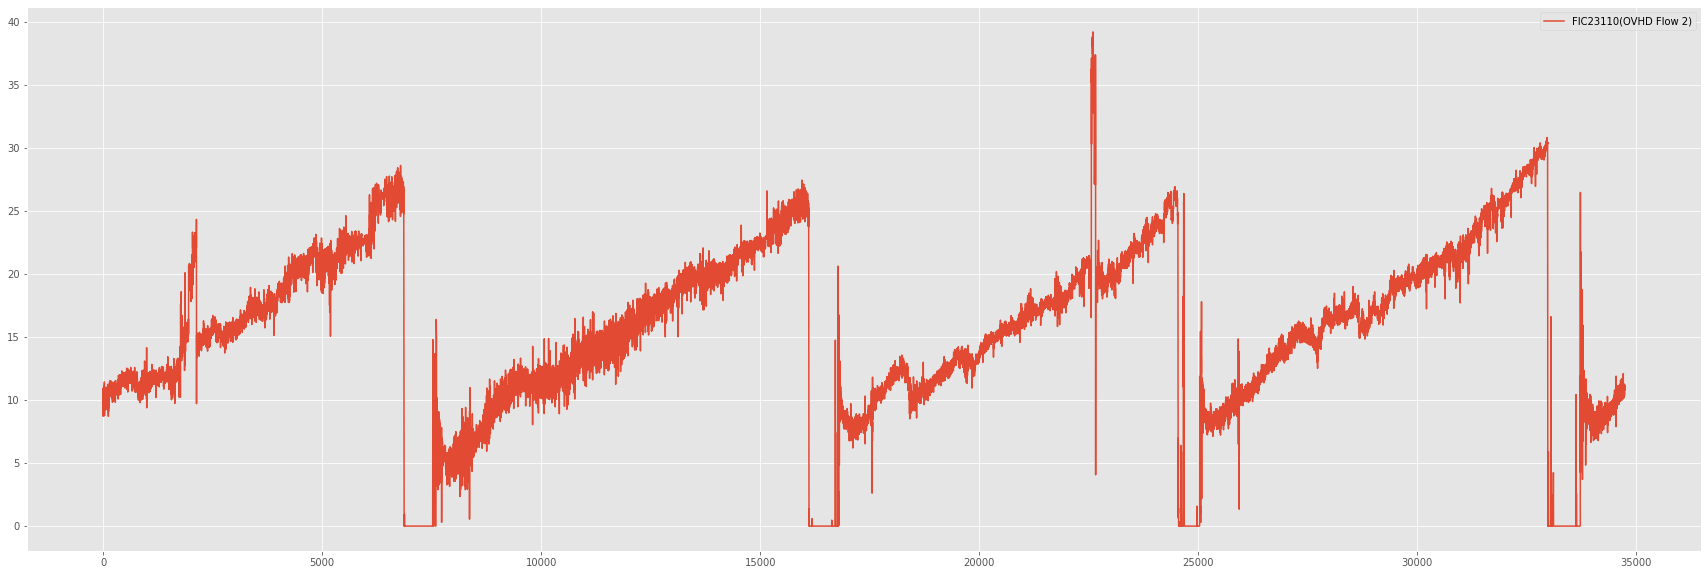

TI23118(D/O Liquid T)


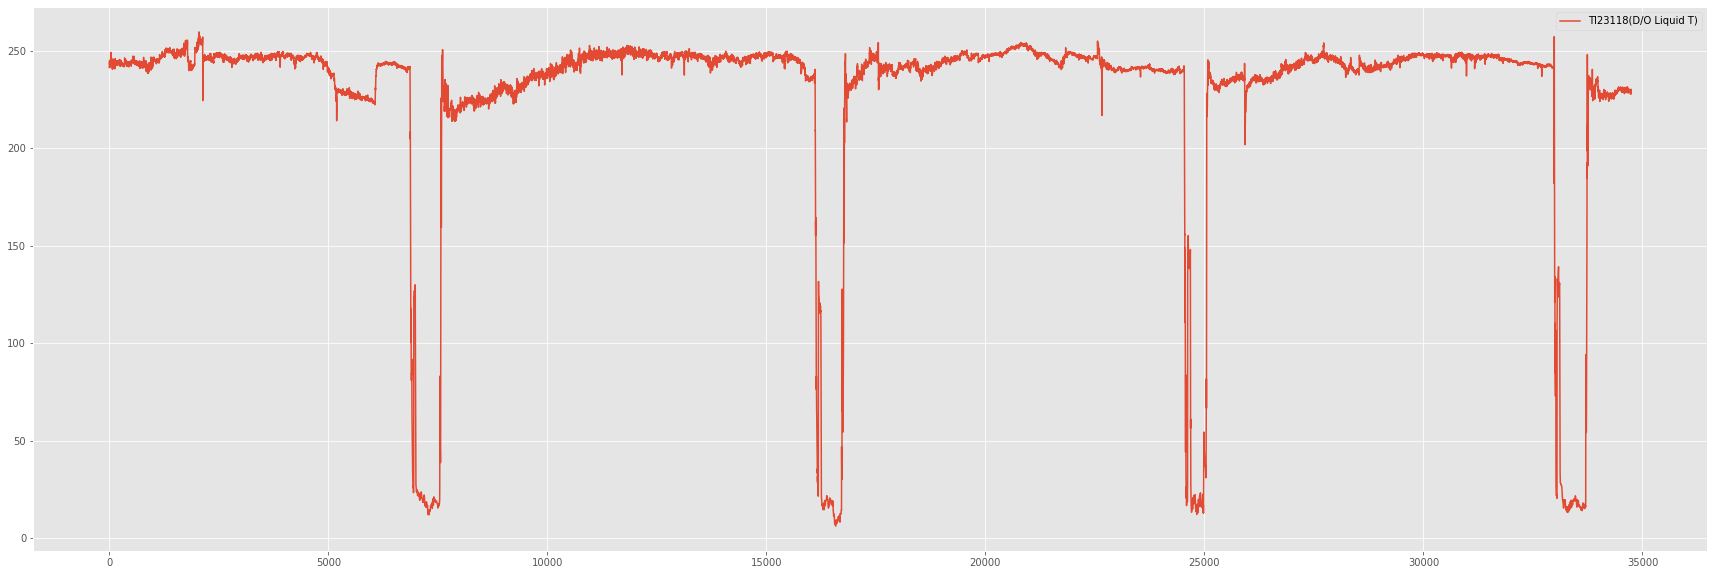

FIC23133(R/D Flow)


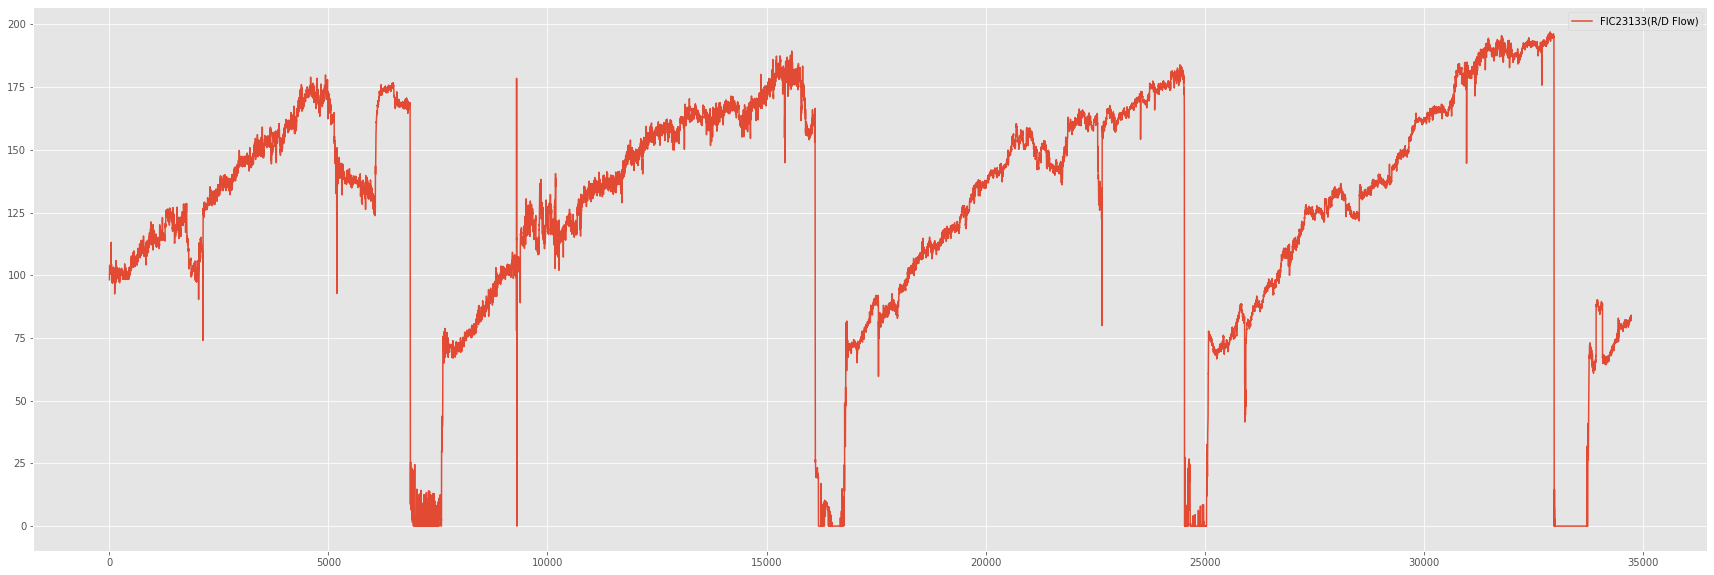

FIC23105(P/A RT Flow)


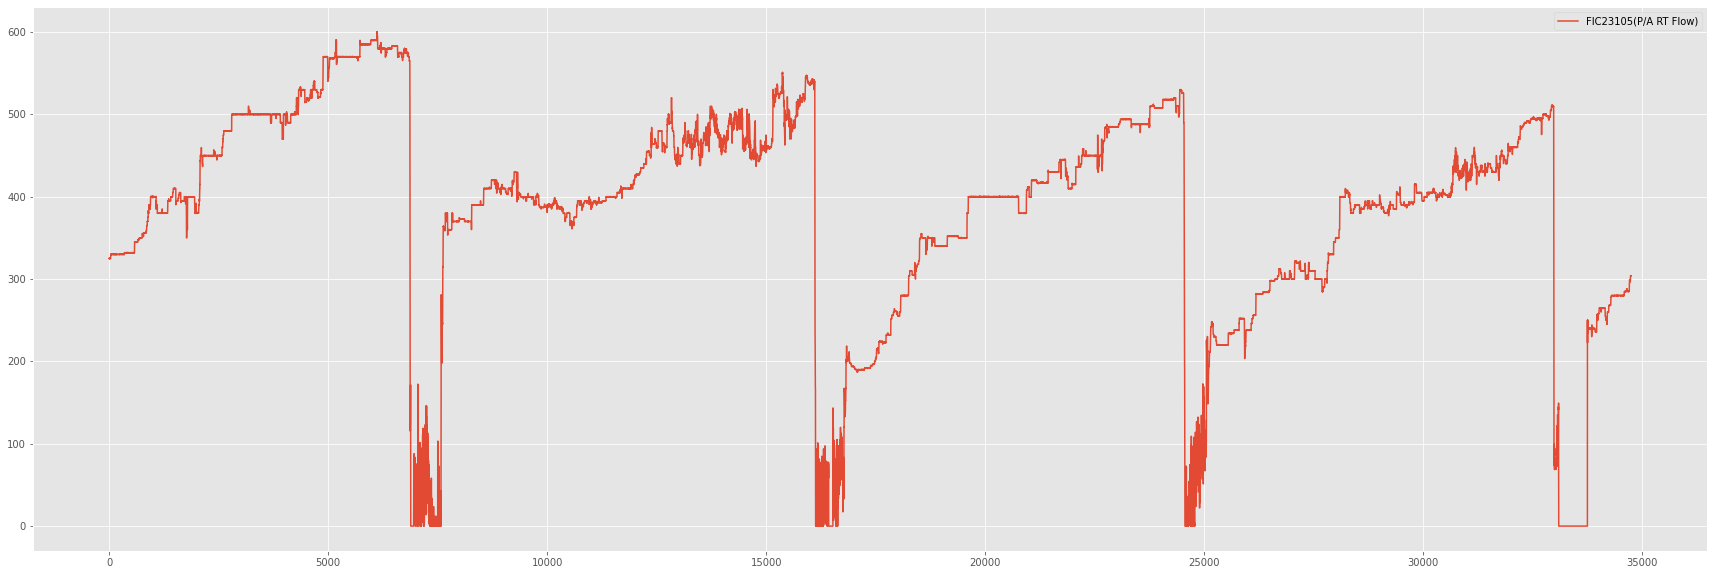

TI23028(P/A RT T)


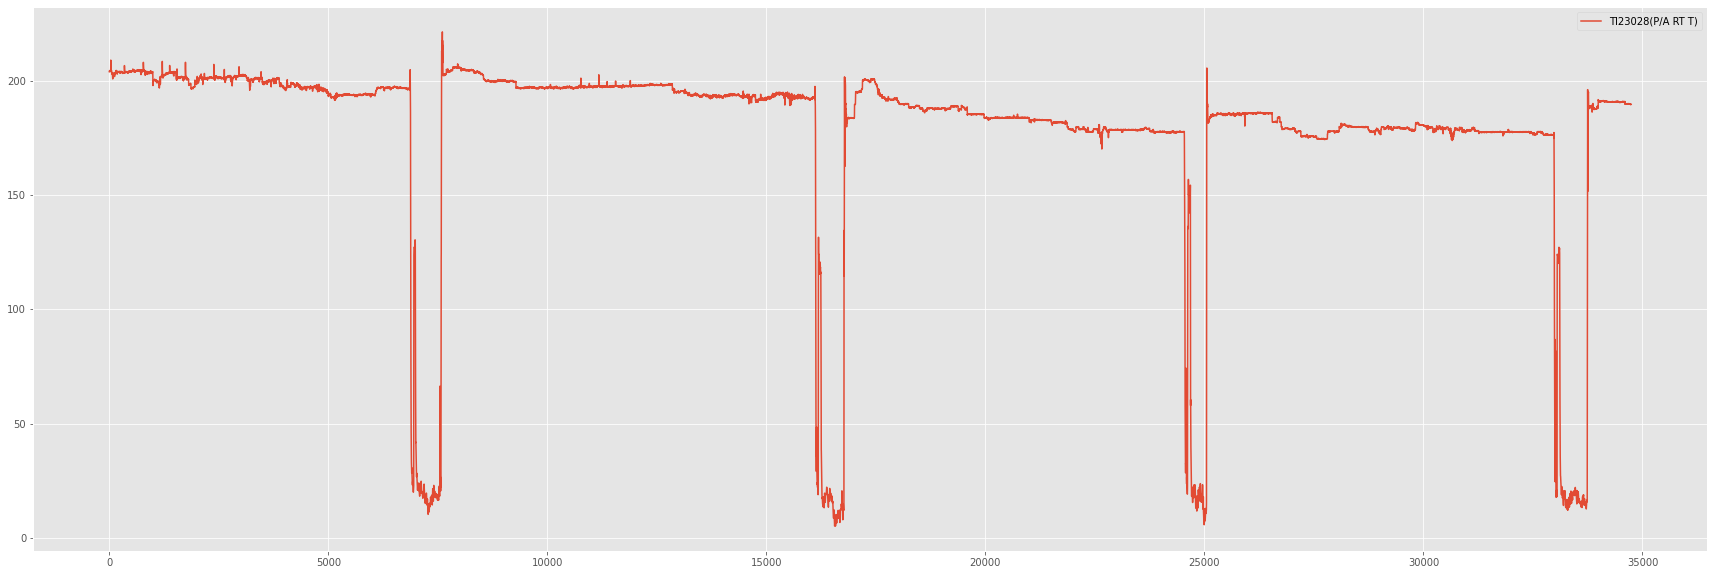

TI21022A(Catalyst T 1)


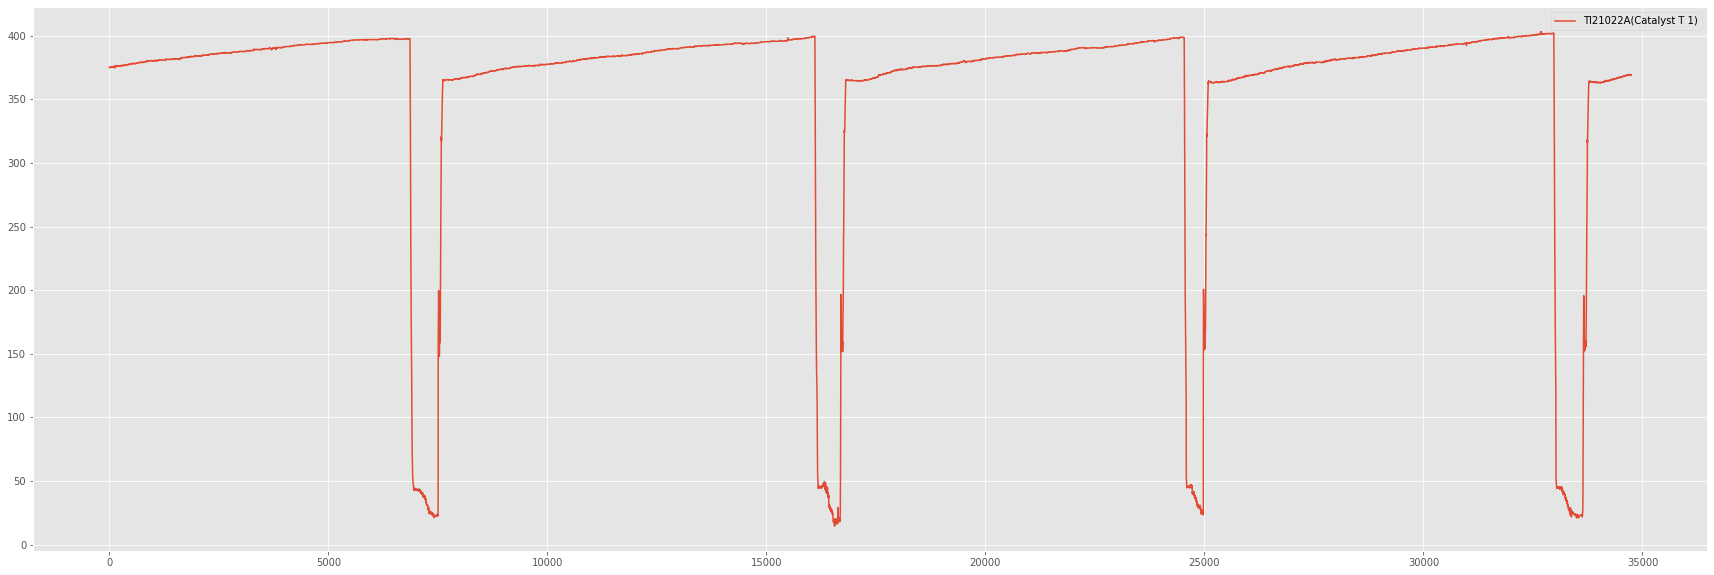

TI21022B(Catalyst T 2)


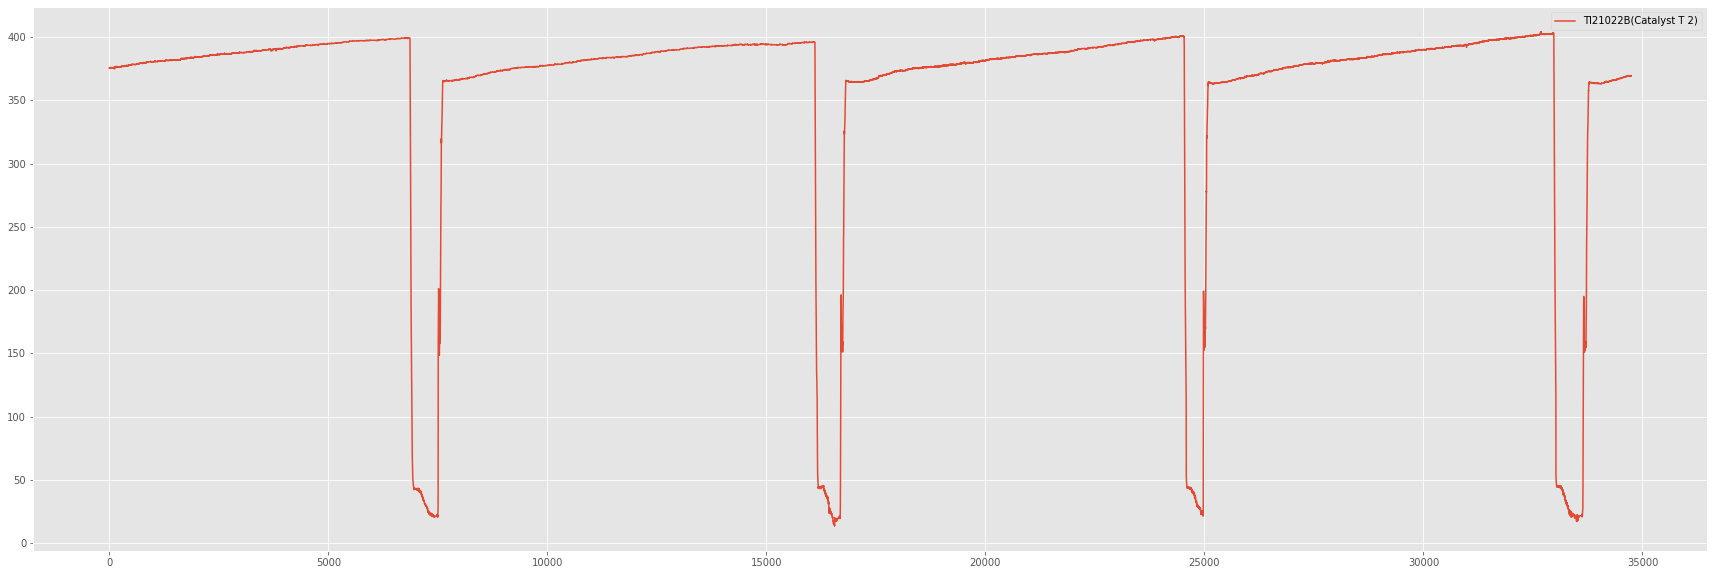

year


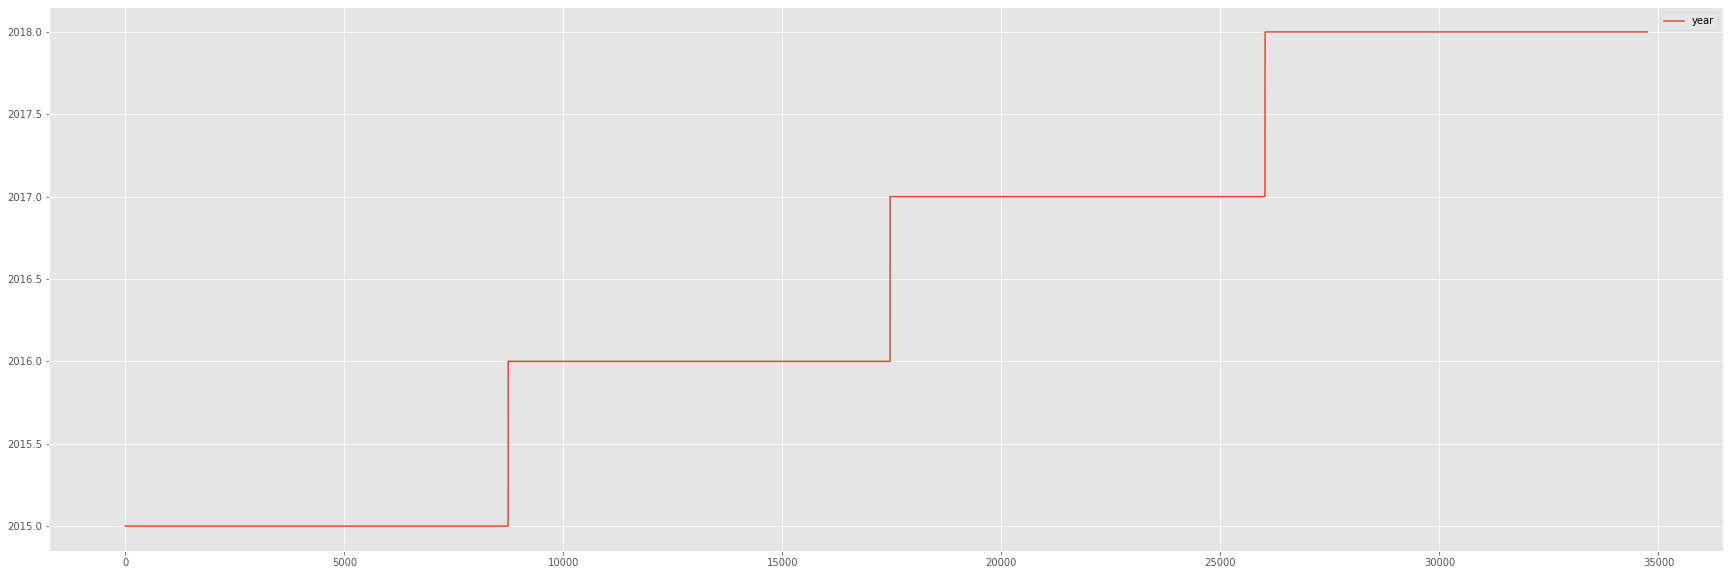

month


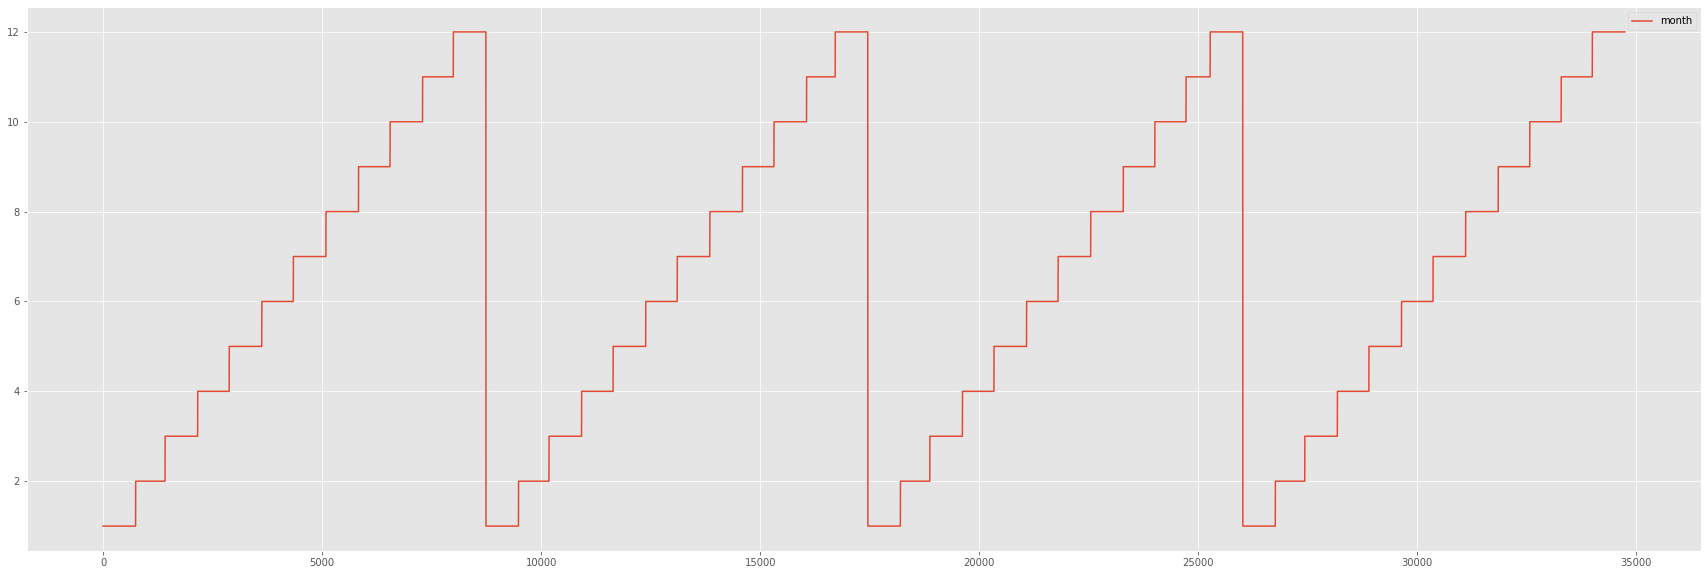

date


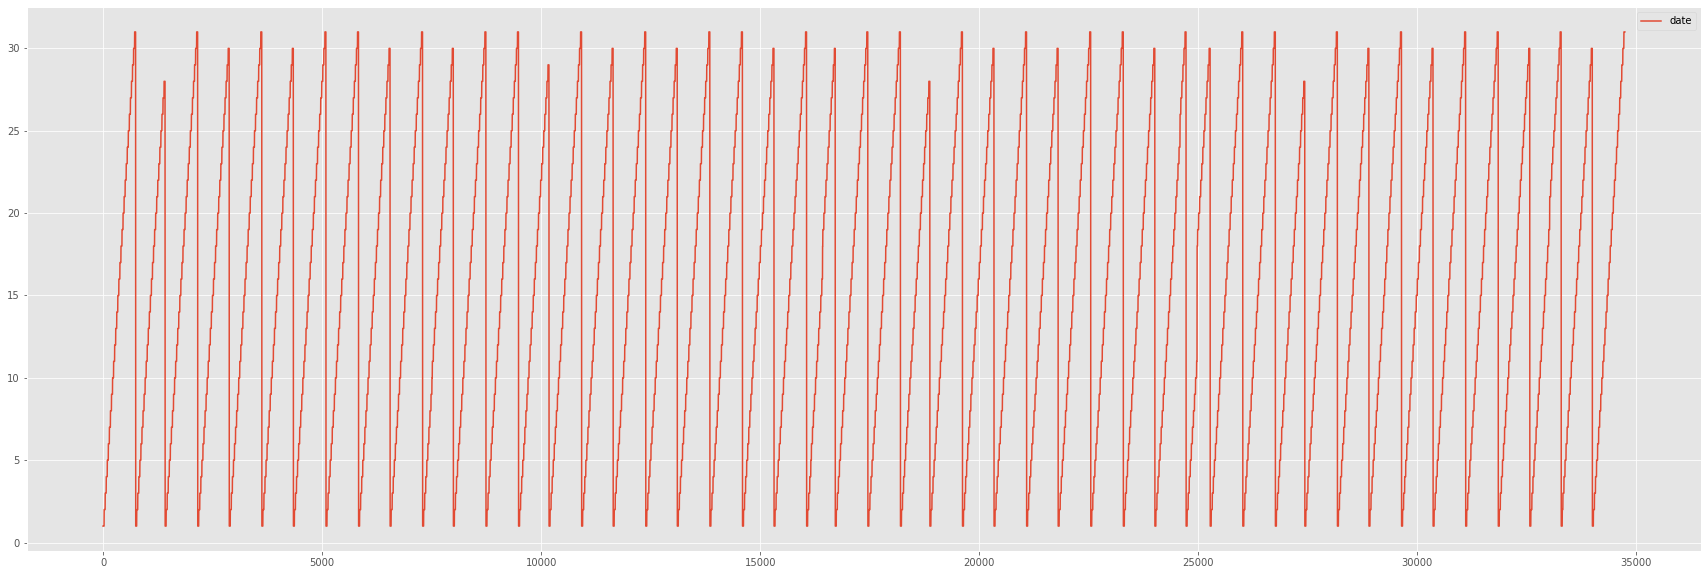

hour


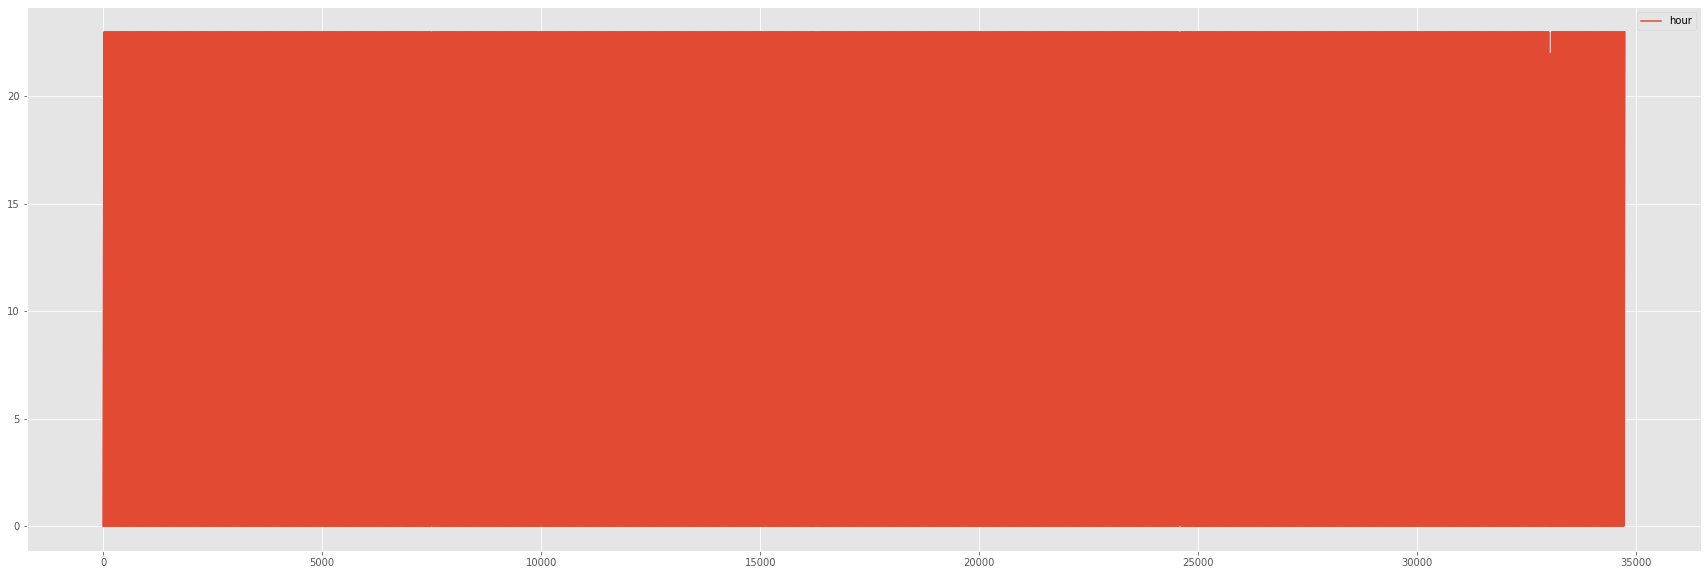

In [ ]:
import seaborn as sns
for col in train.columns[1:]:
  try:
    print(col)
    target = train.loc[:,col]
    target.describe()
    plt.figure(figsize=(30,10))
    plt.plot(target, label=col) 
    plt.legend()
    plt.show()
  except:
    continue

DSL D-95


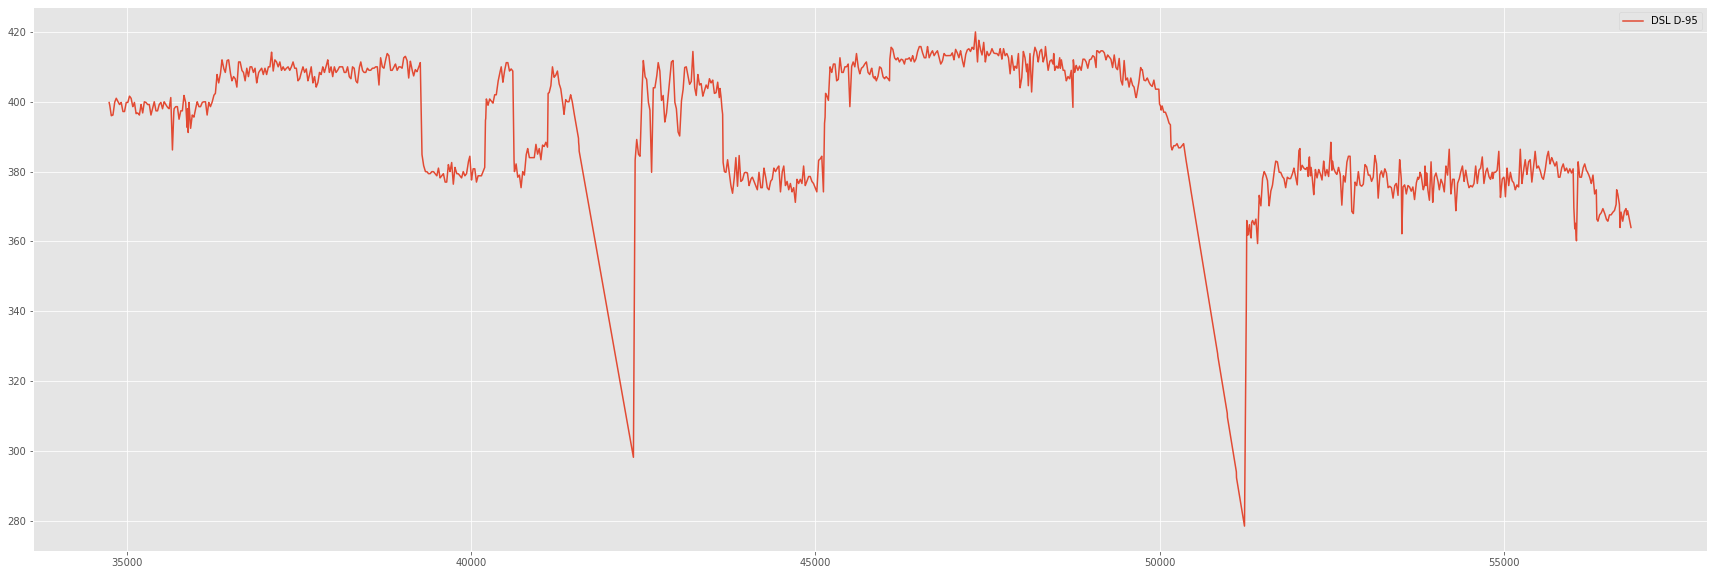

FIC21185(F1 Flow)


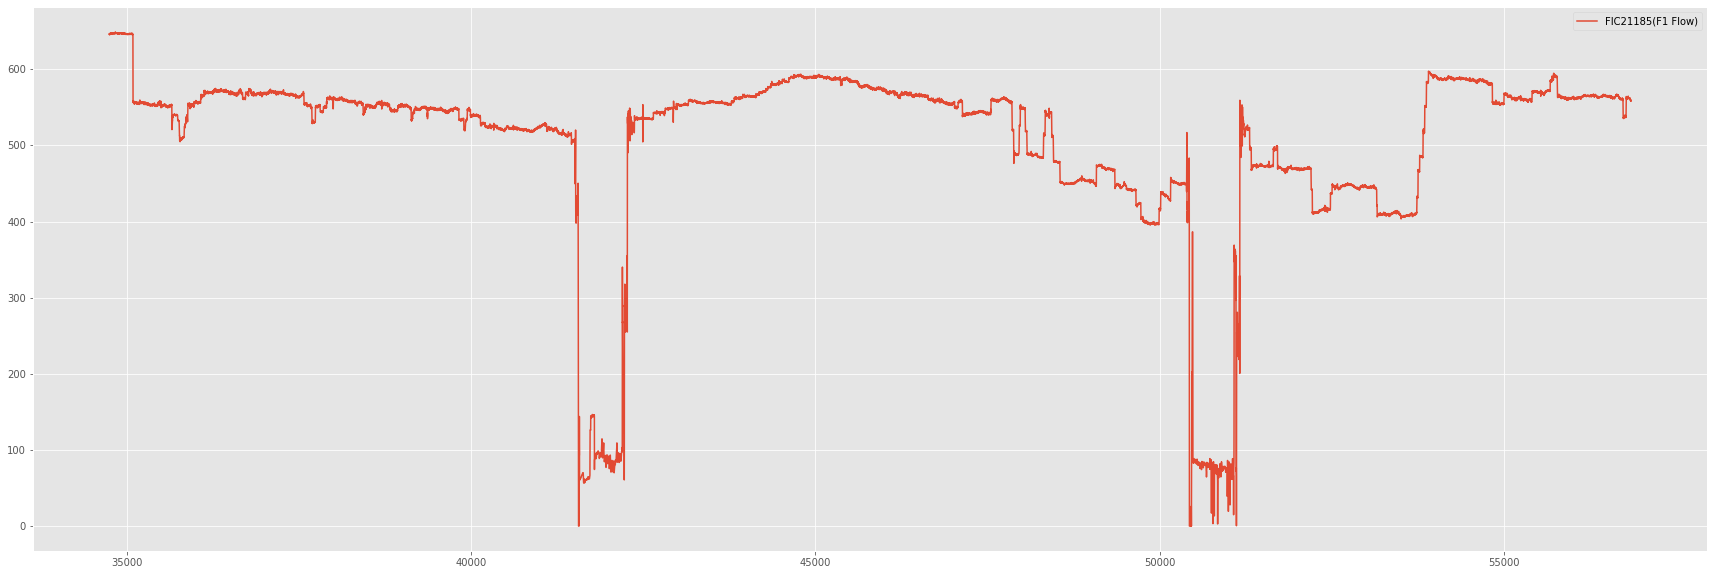

FIC21192(F2 Flow)


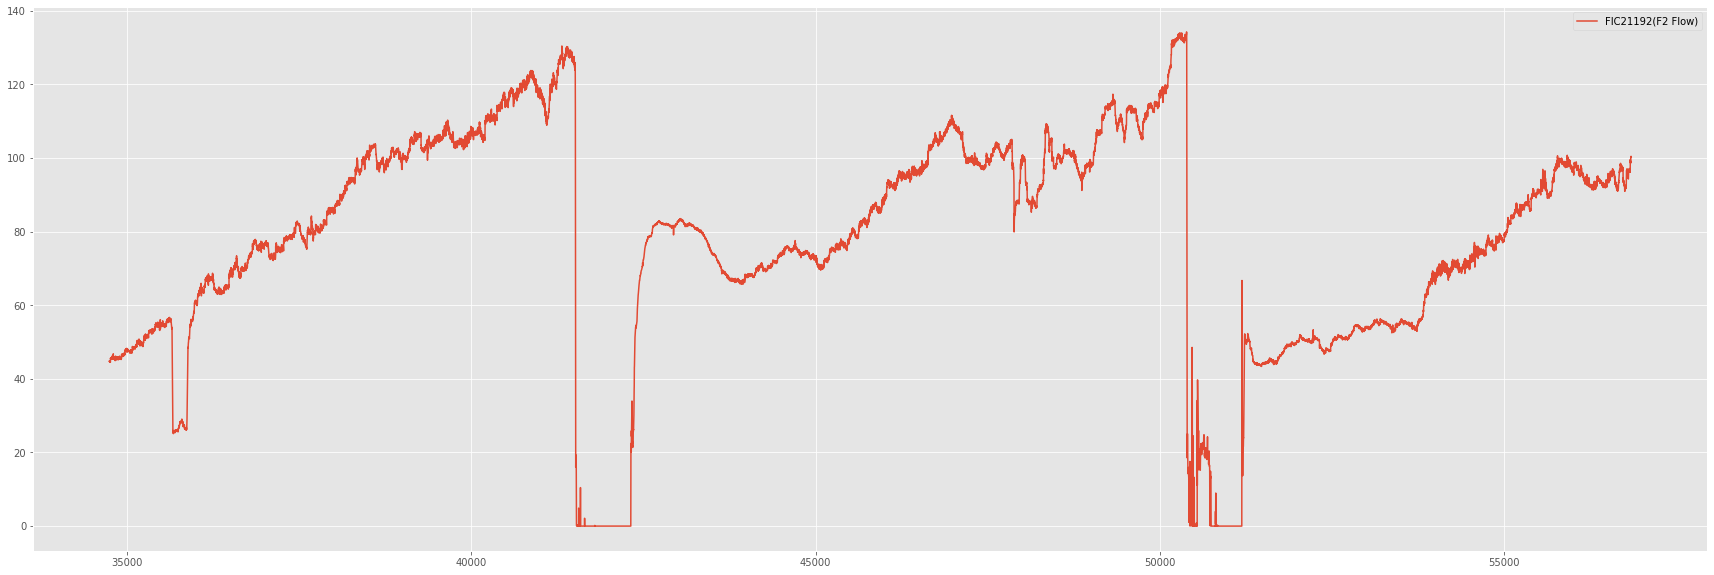

TIC23115(Feed1 T)


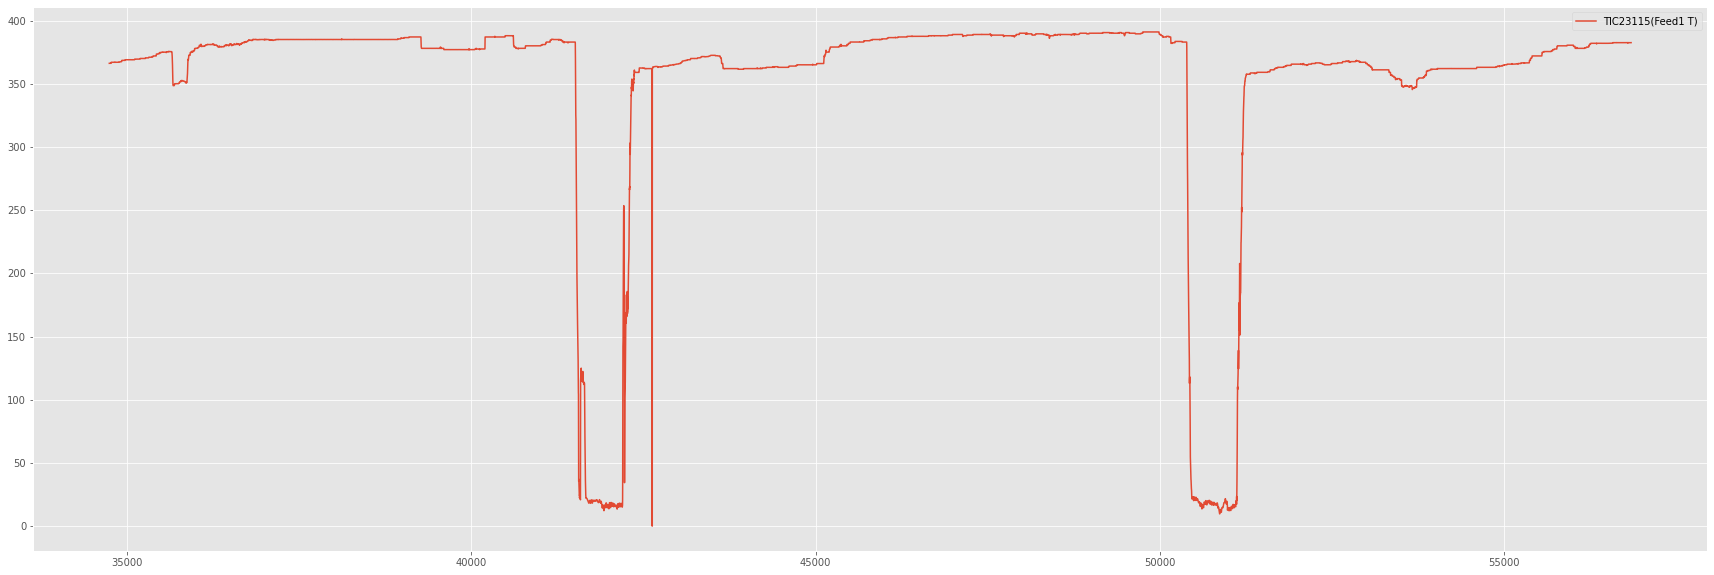

TI23029(Feed2 T)


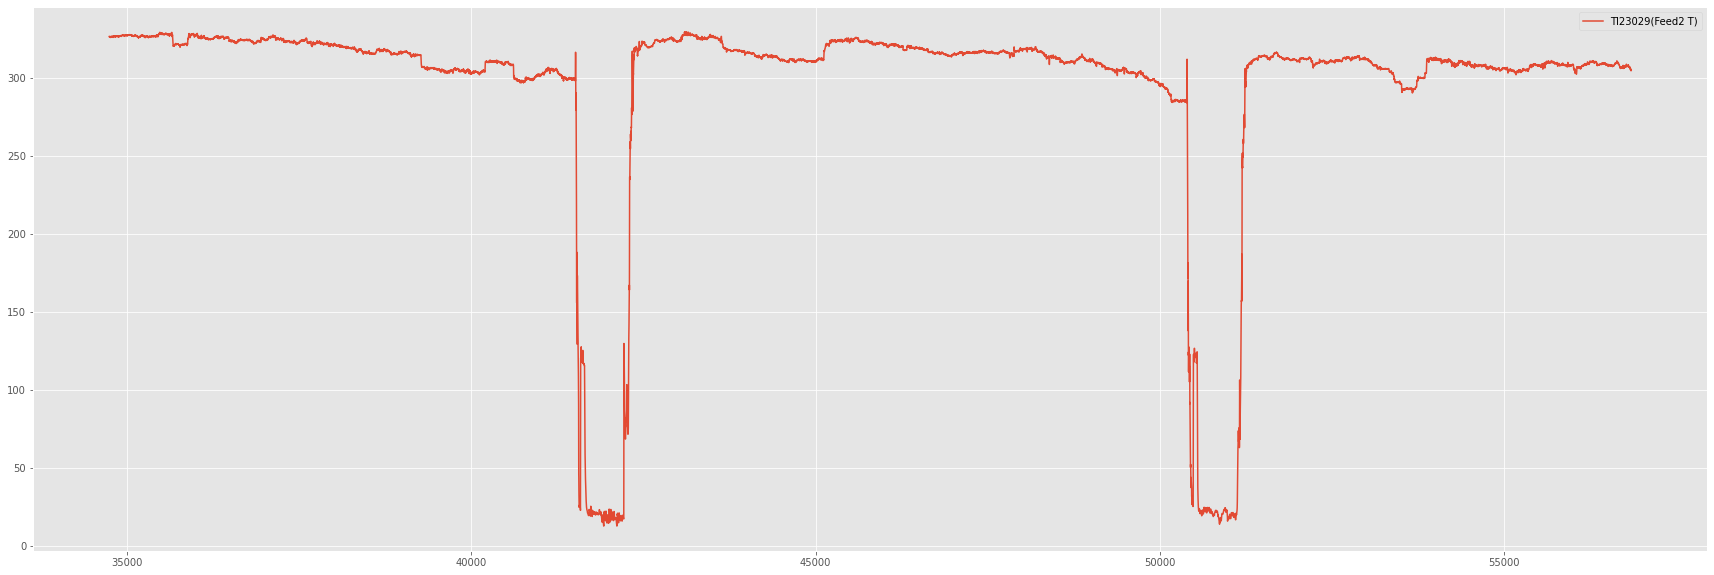

FIC23108(SS Flow)


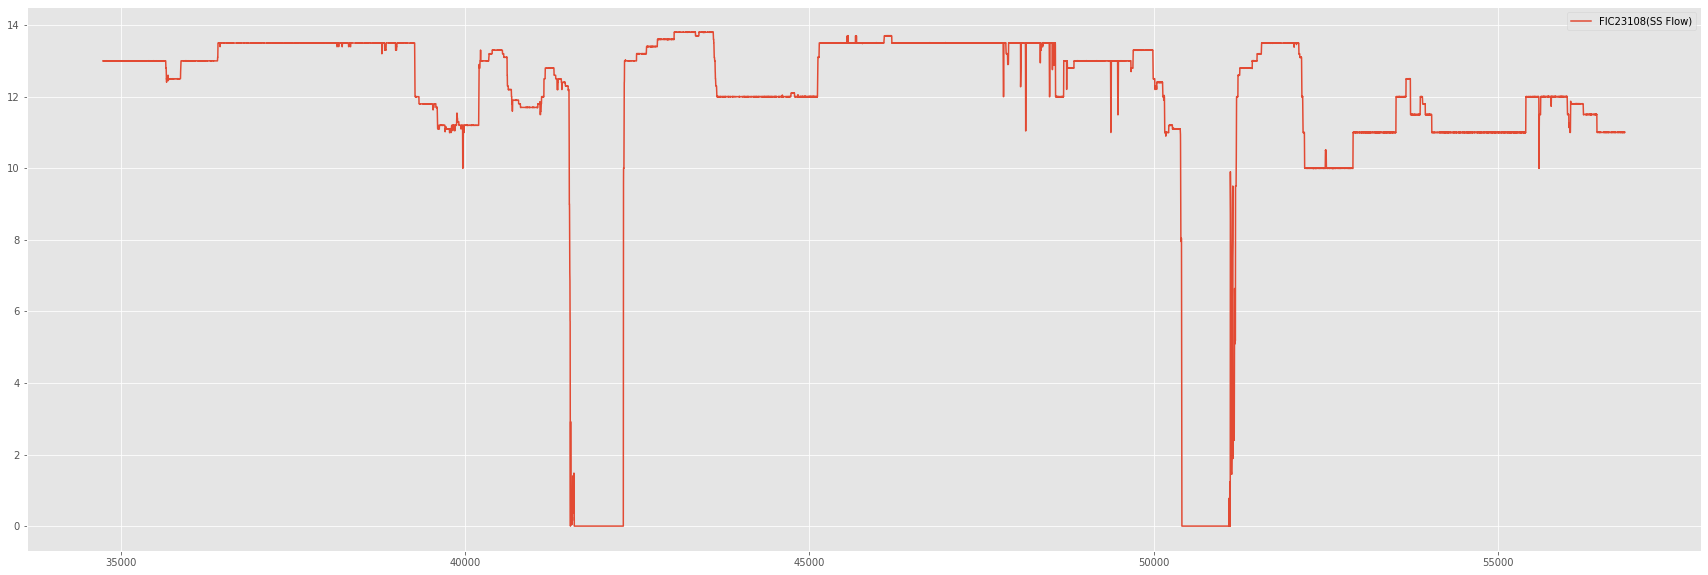

PI23105(F Zone P)


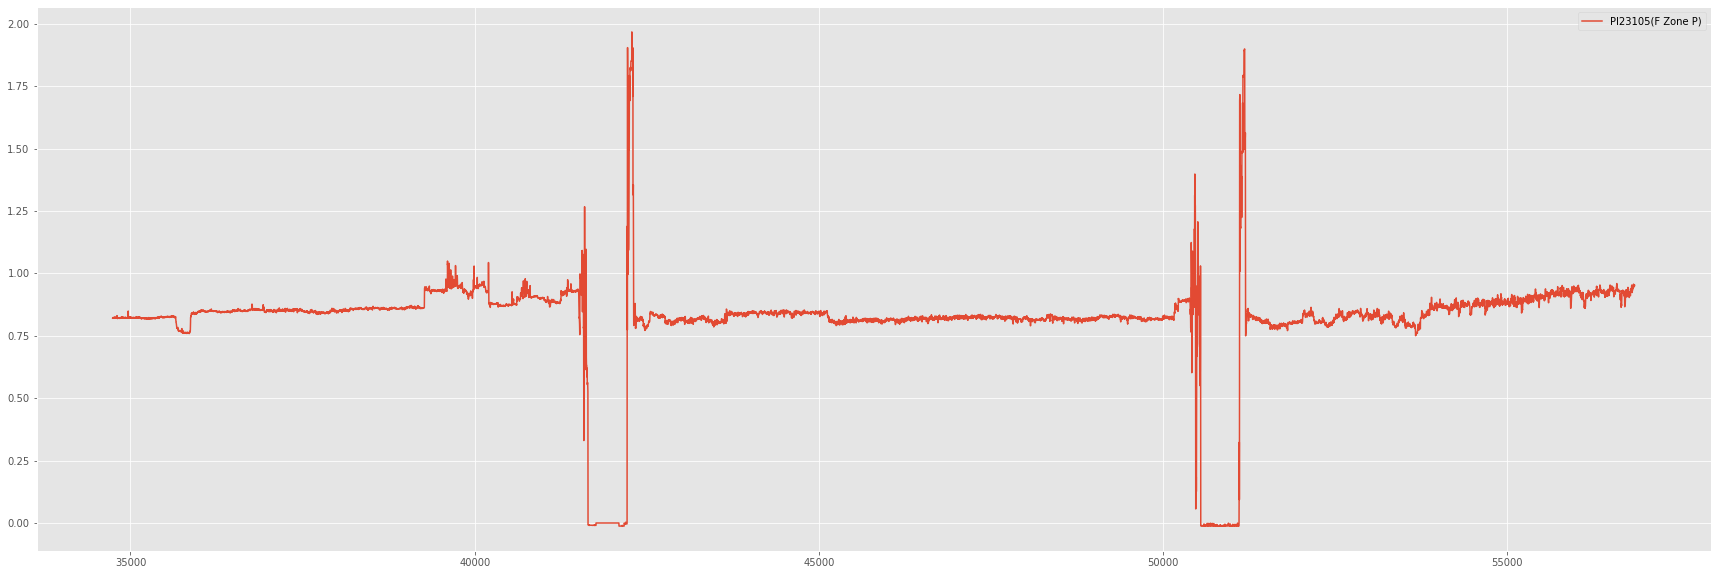

TI23120(F Zone T)


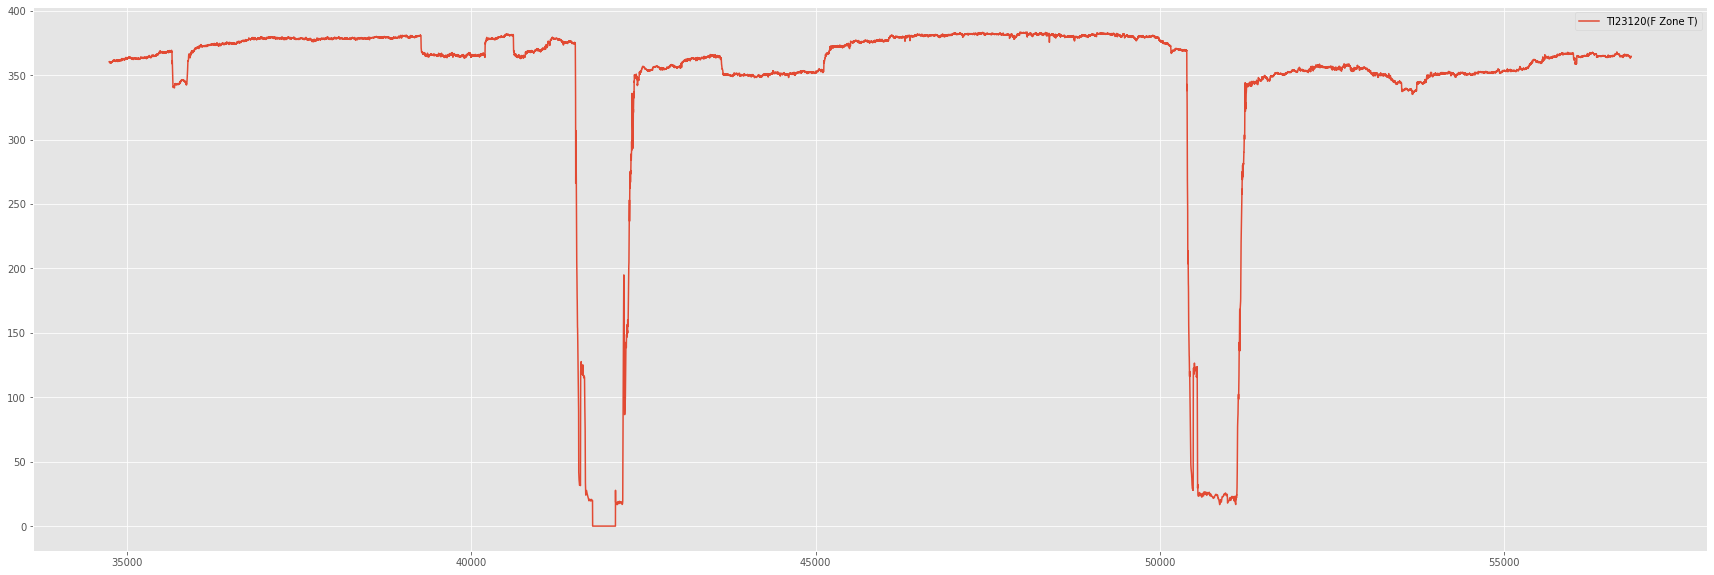

TI23121(SS T)


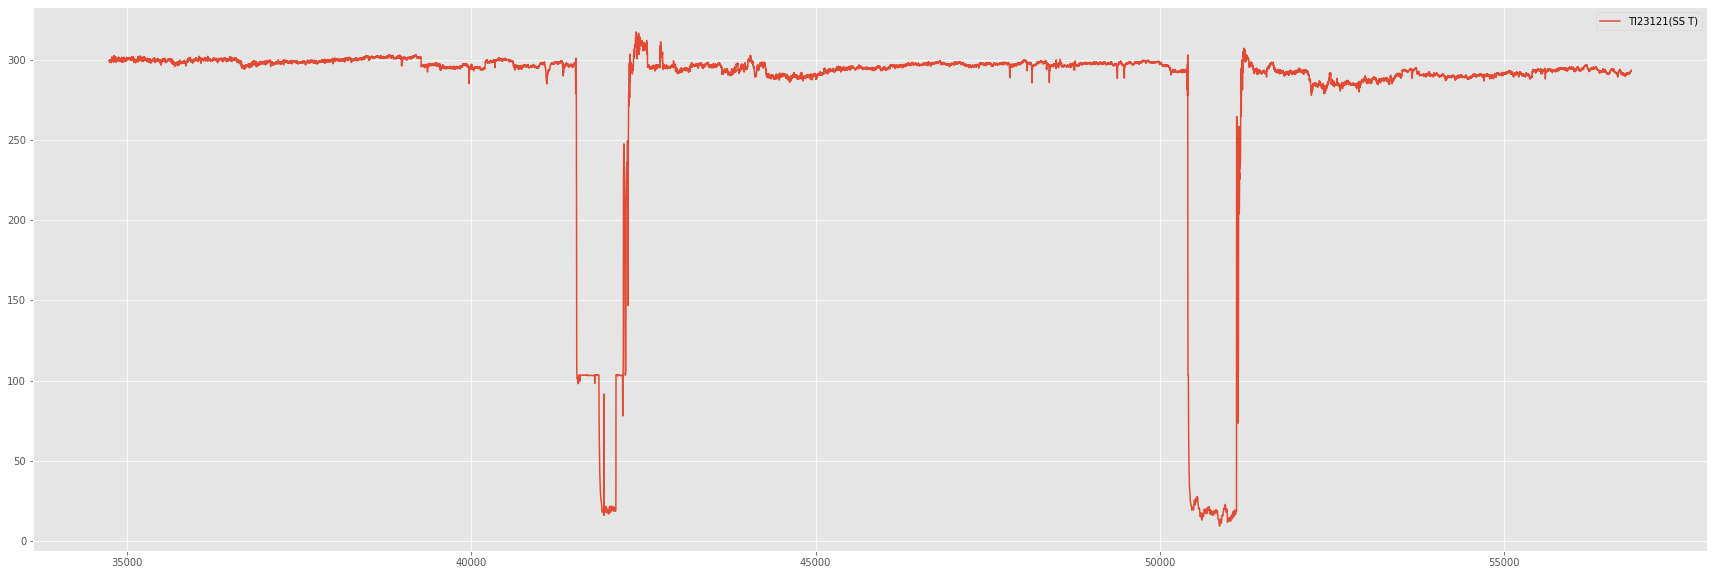

PI23038(BTM P)


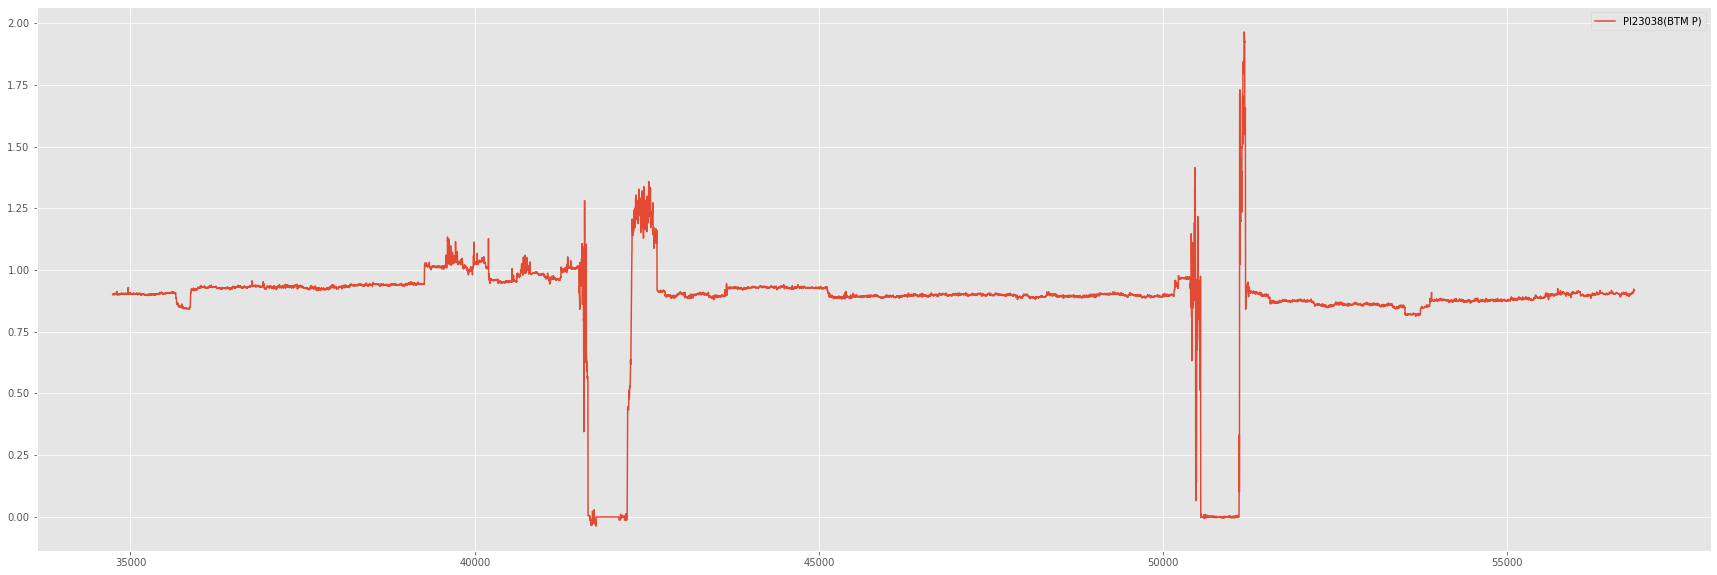

TI23123(Reflux T)


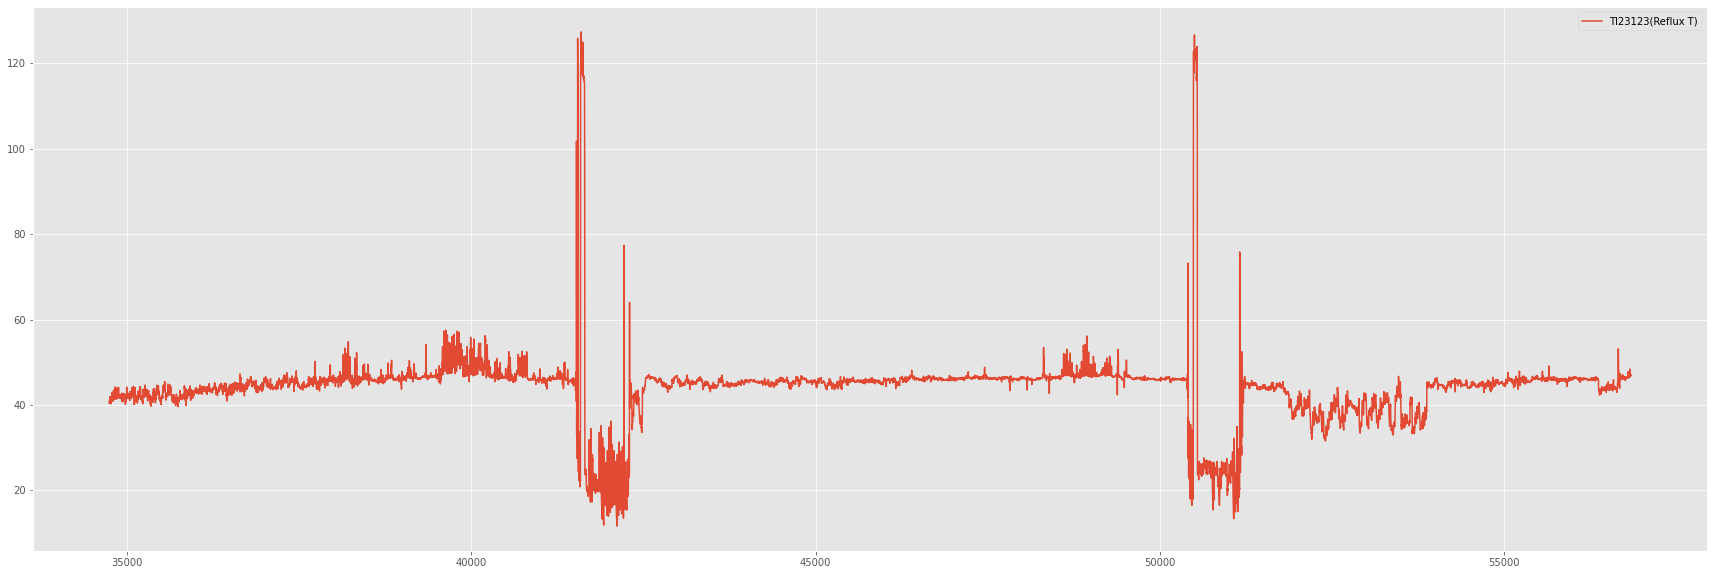

TI23502(D/O Vapor T)


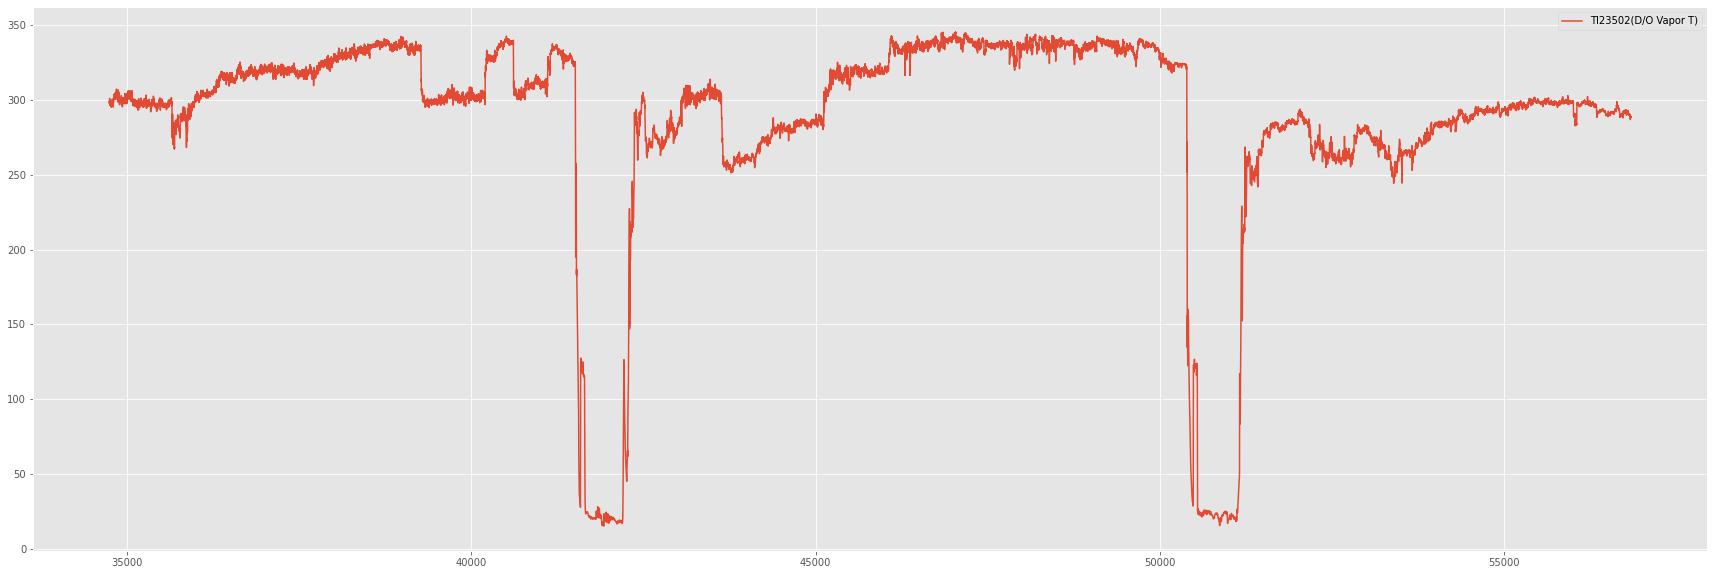

FI23107(OF Flow)


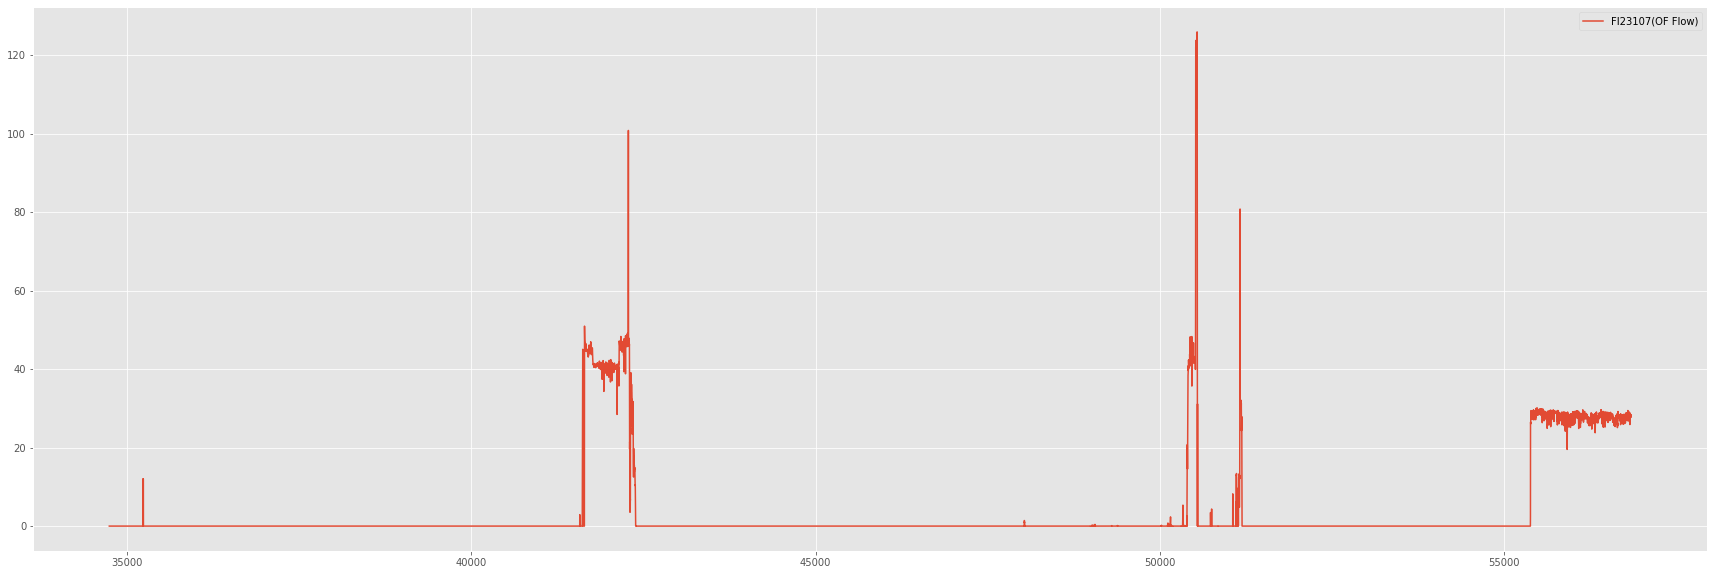

TI23122(BTM T)


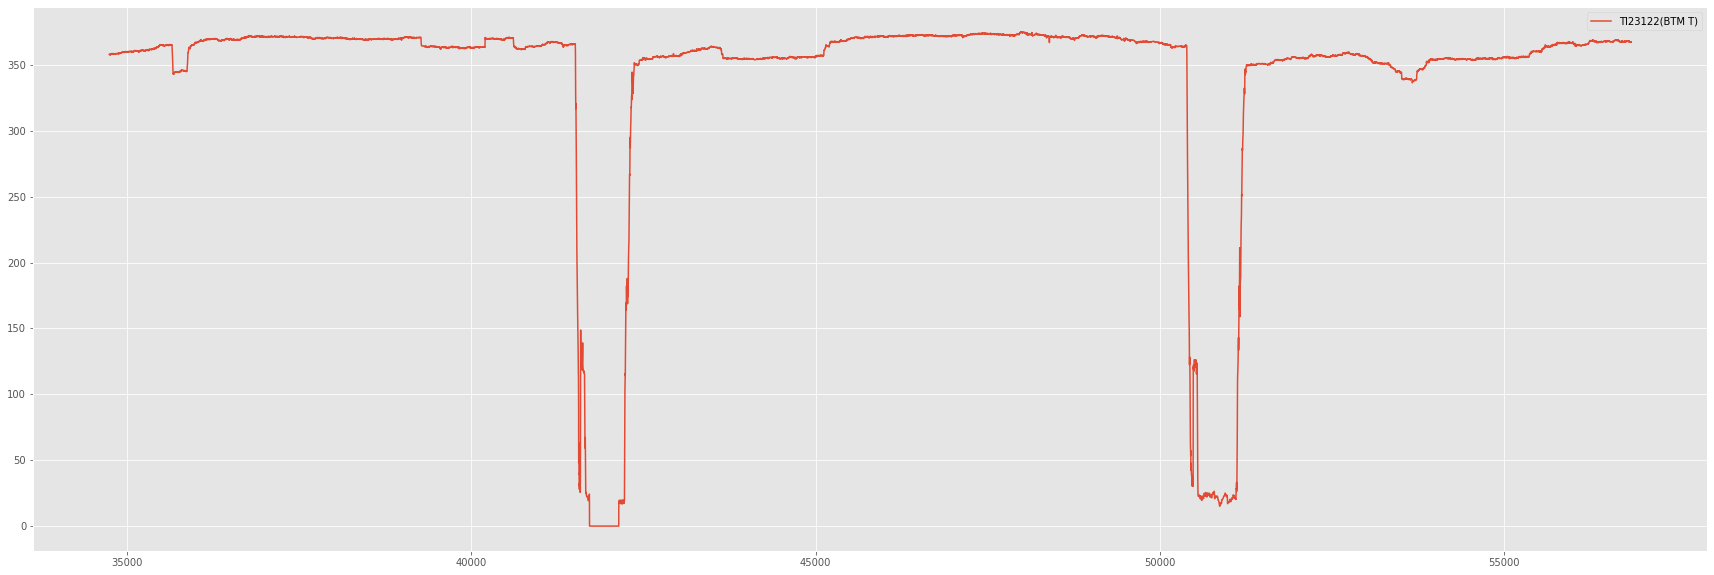

TI23116(Top T)


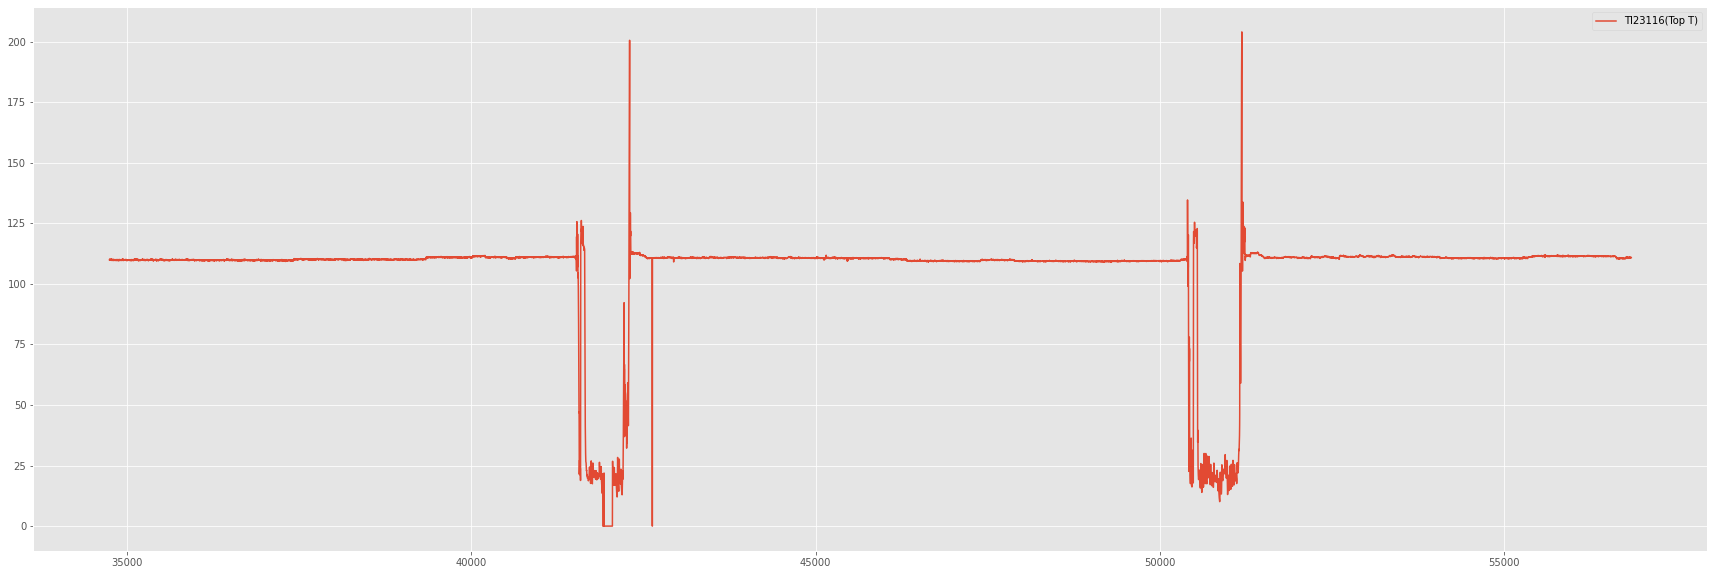

TI23117(DSL S Vapor T)


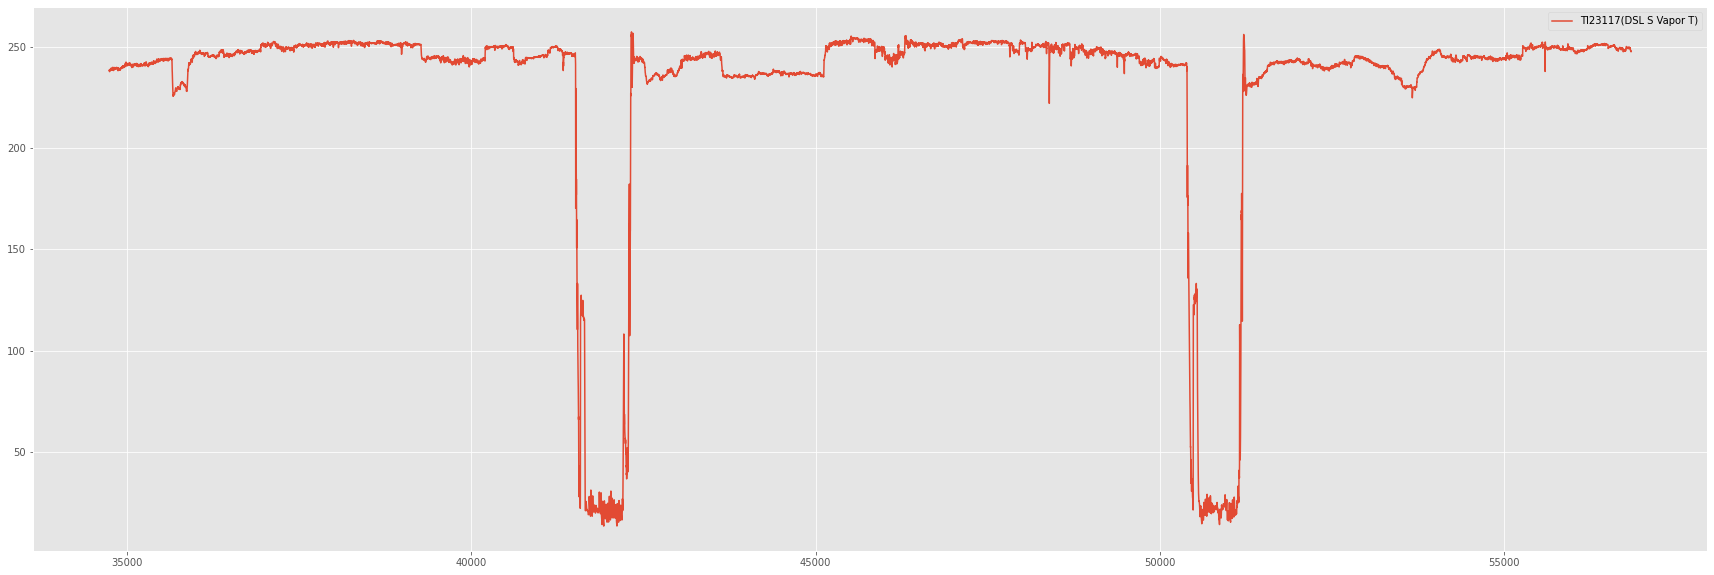

TI23119(OV T)


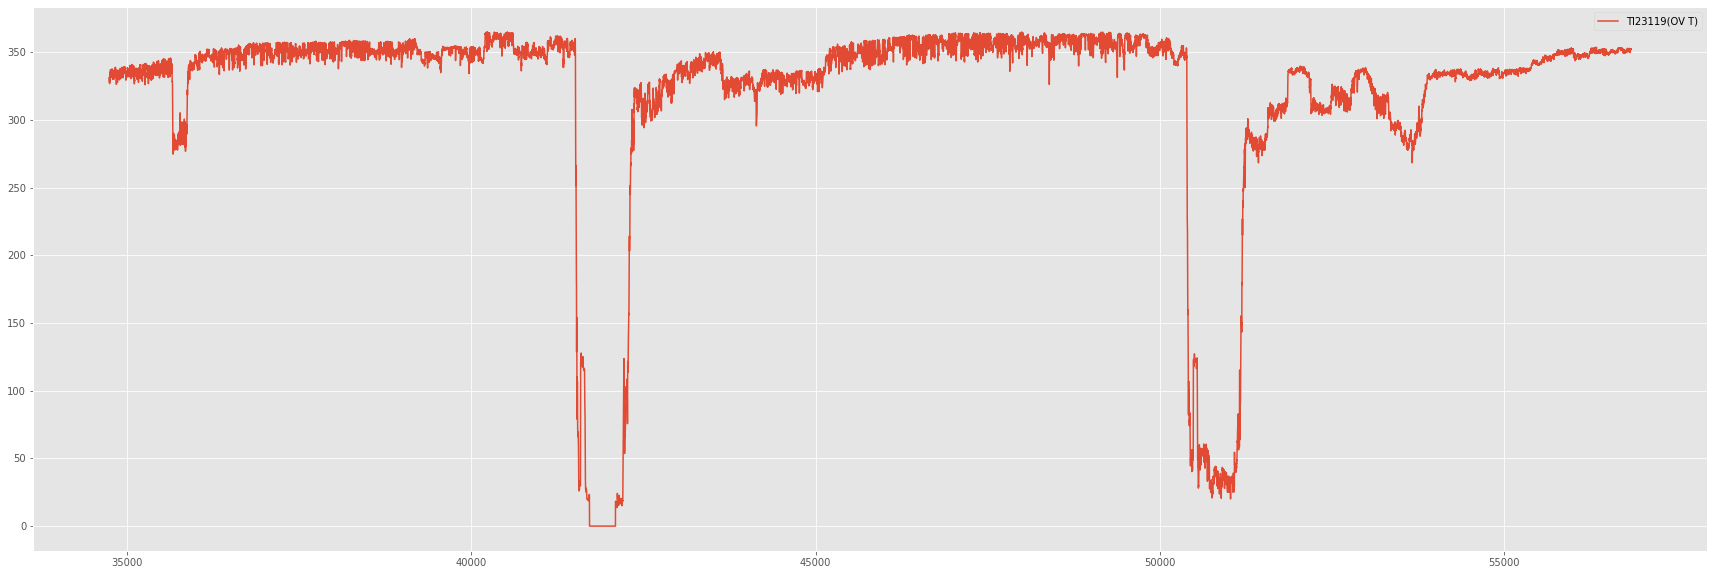

PIC23106(Top P)


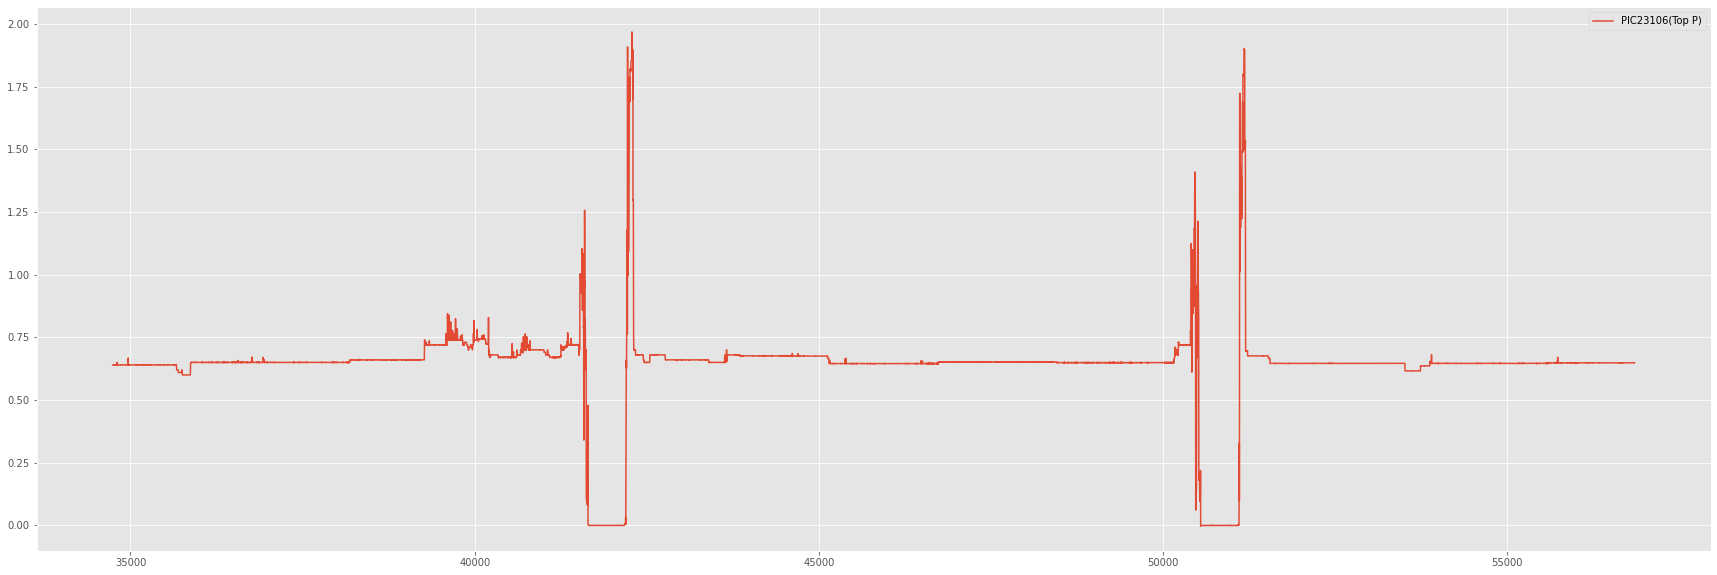

FIC23104(Reflux F)


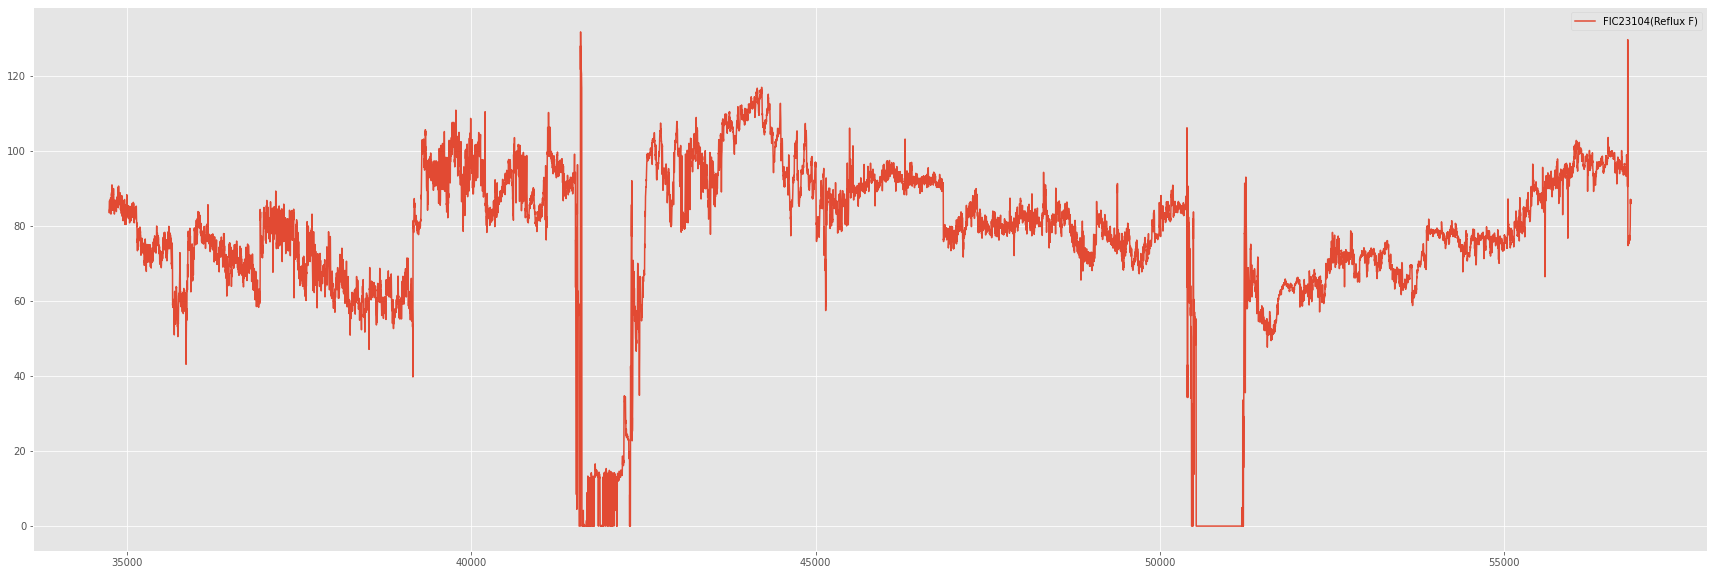

FIC23010(D/O Flow)


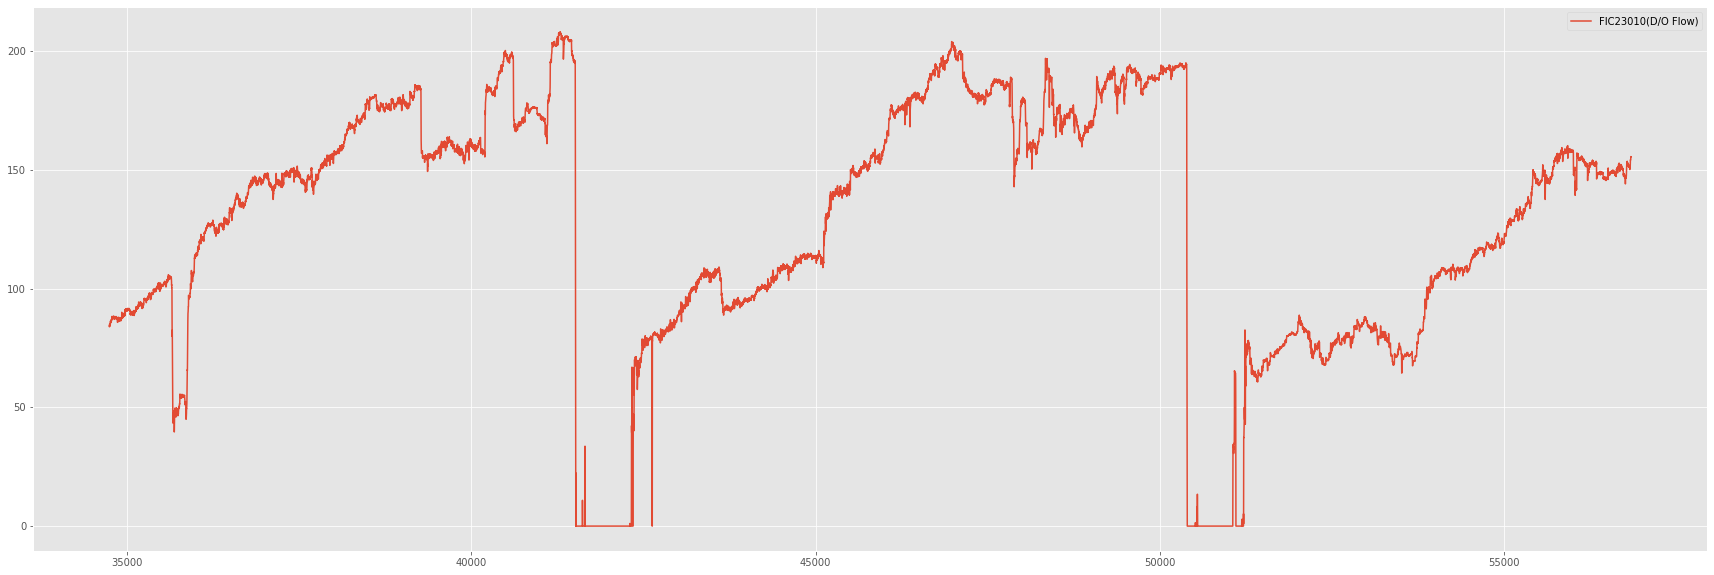

FI23116(T-AR Flow 1)


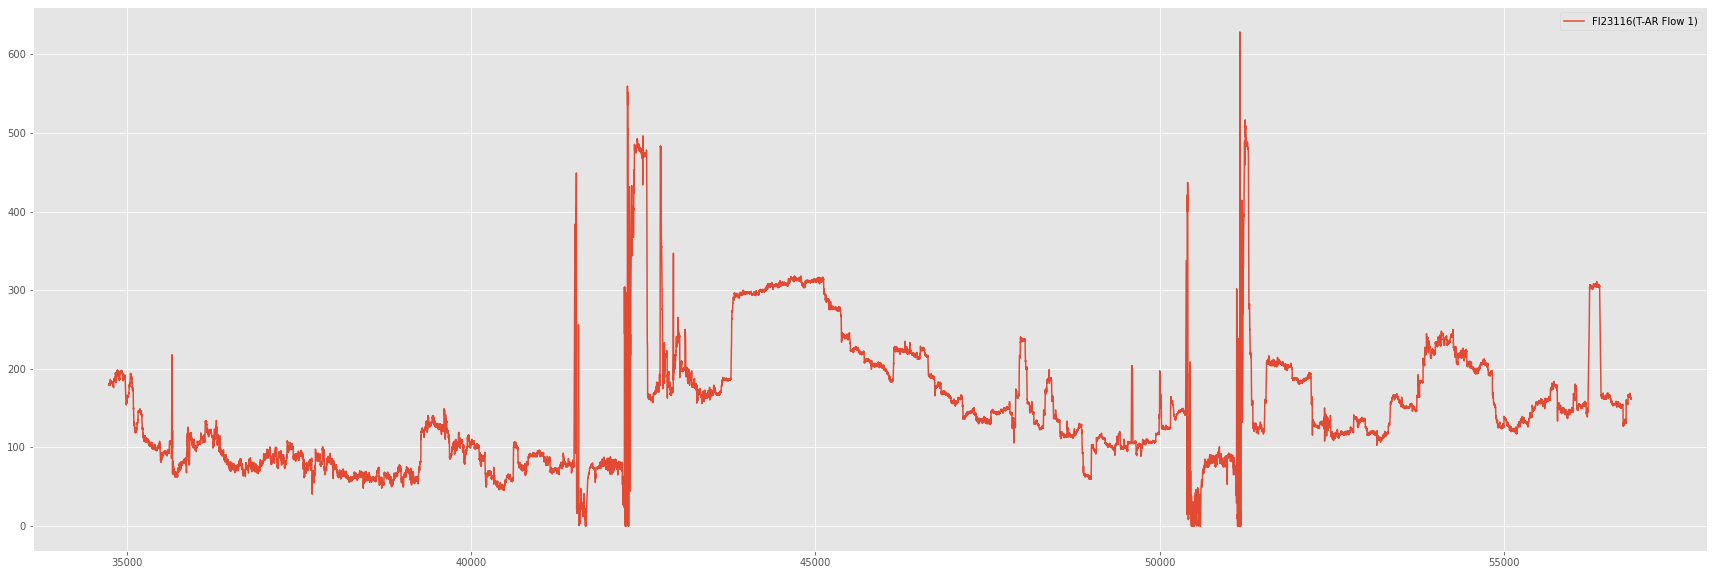

FI23117(T-AR Flow 2)


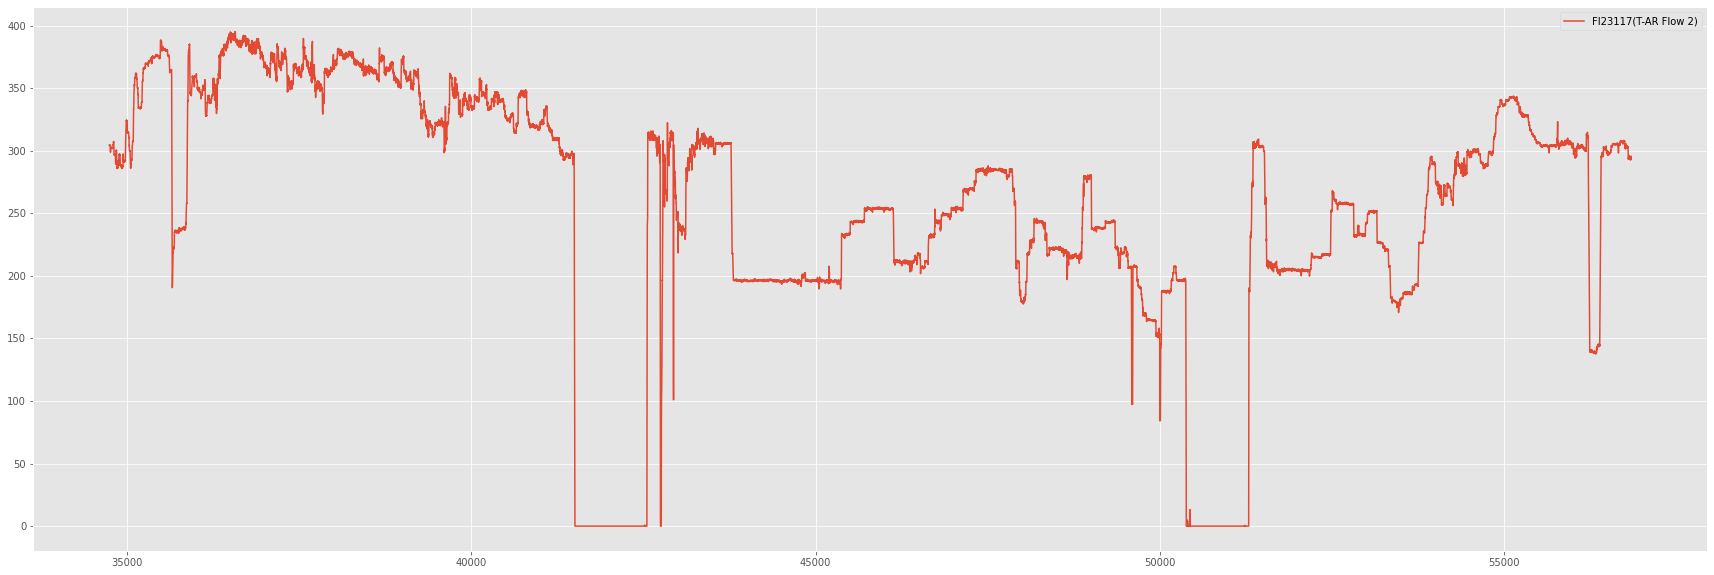

FIC25103(OVHD Flow 1)


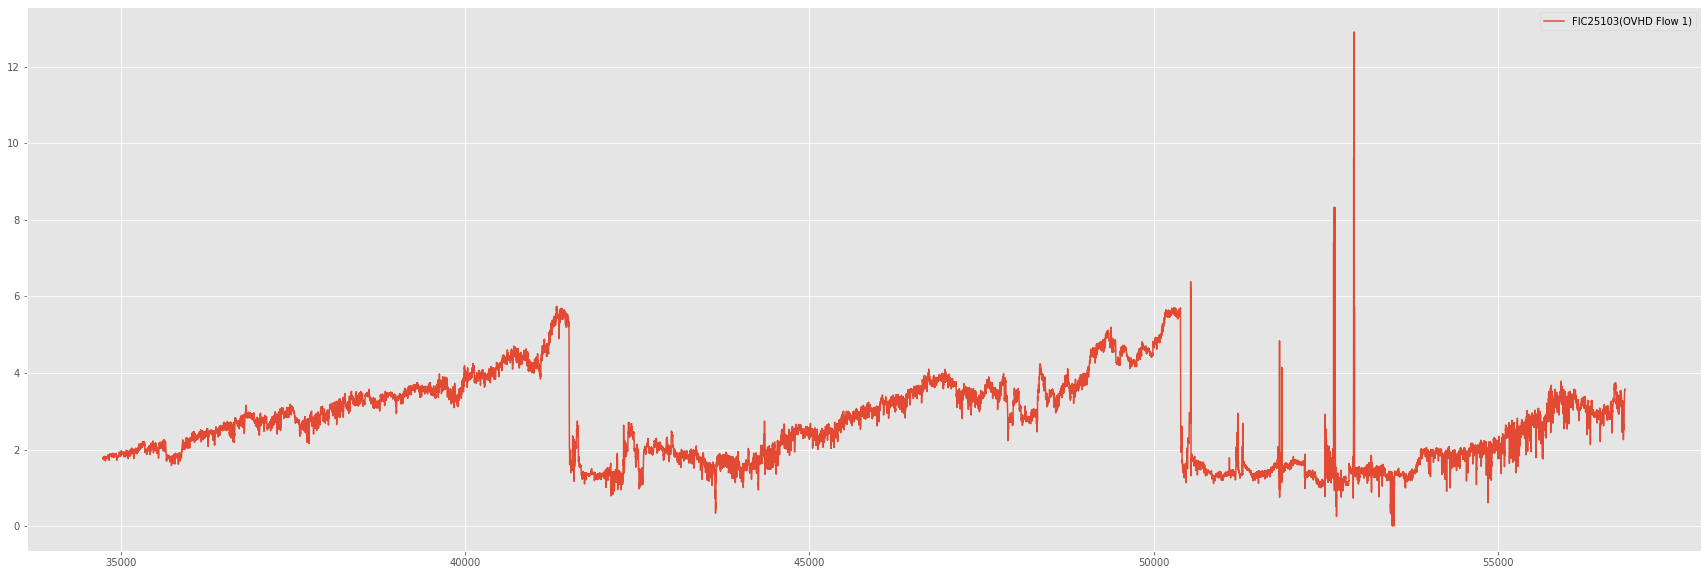

FIC23110(OVHD Flow 2)


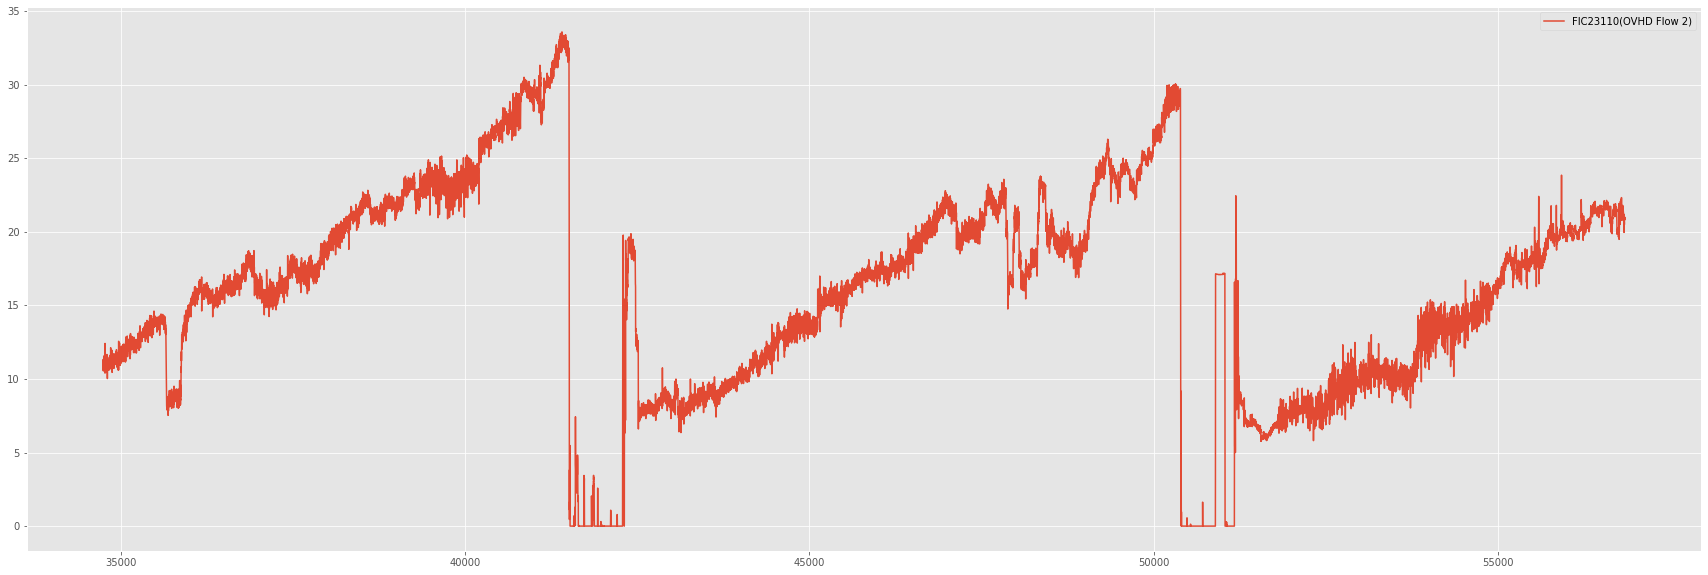

TI23118(D/O Liquid T)


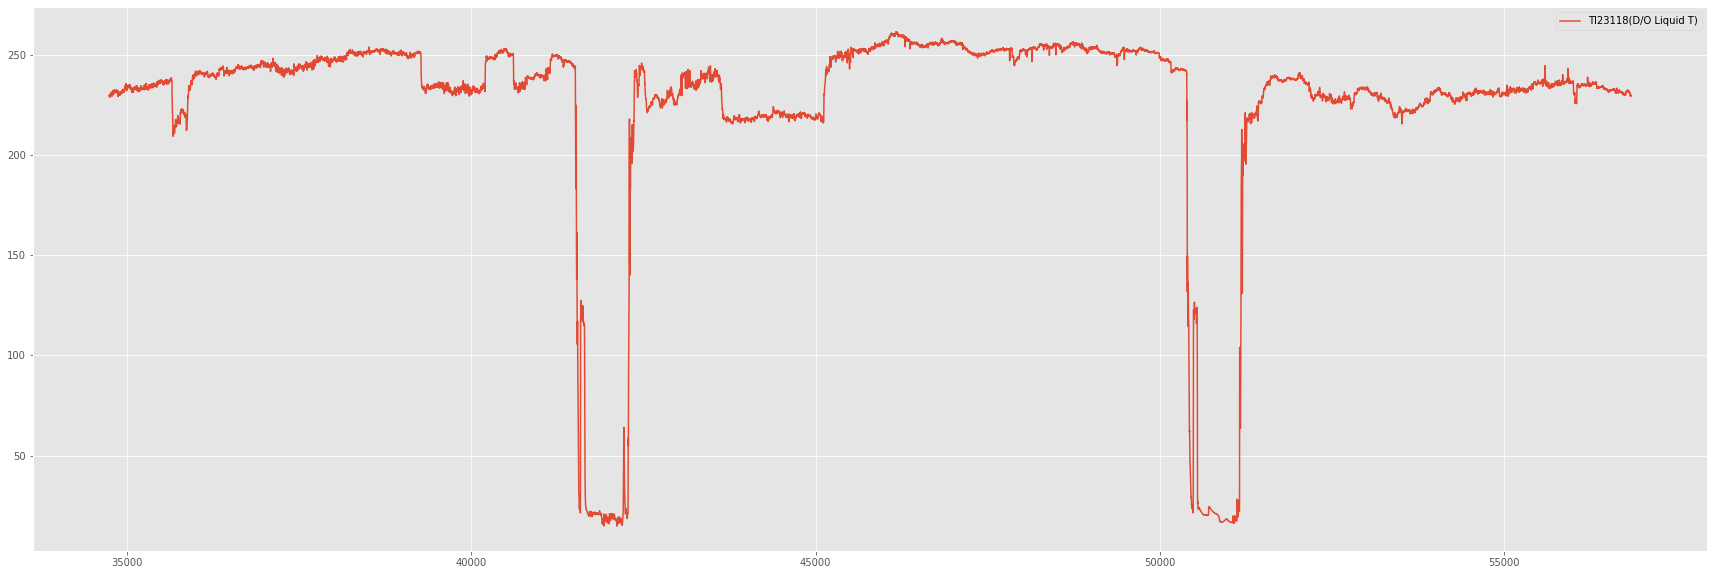

FIC23133(R/D Flow)


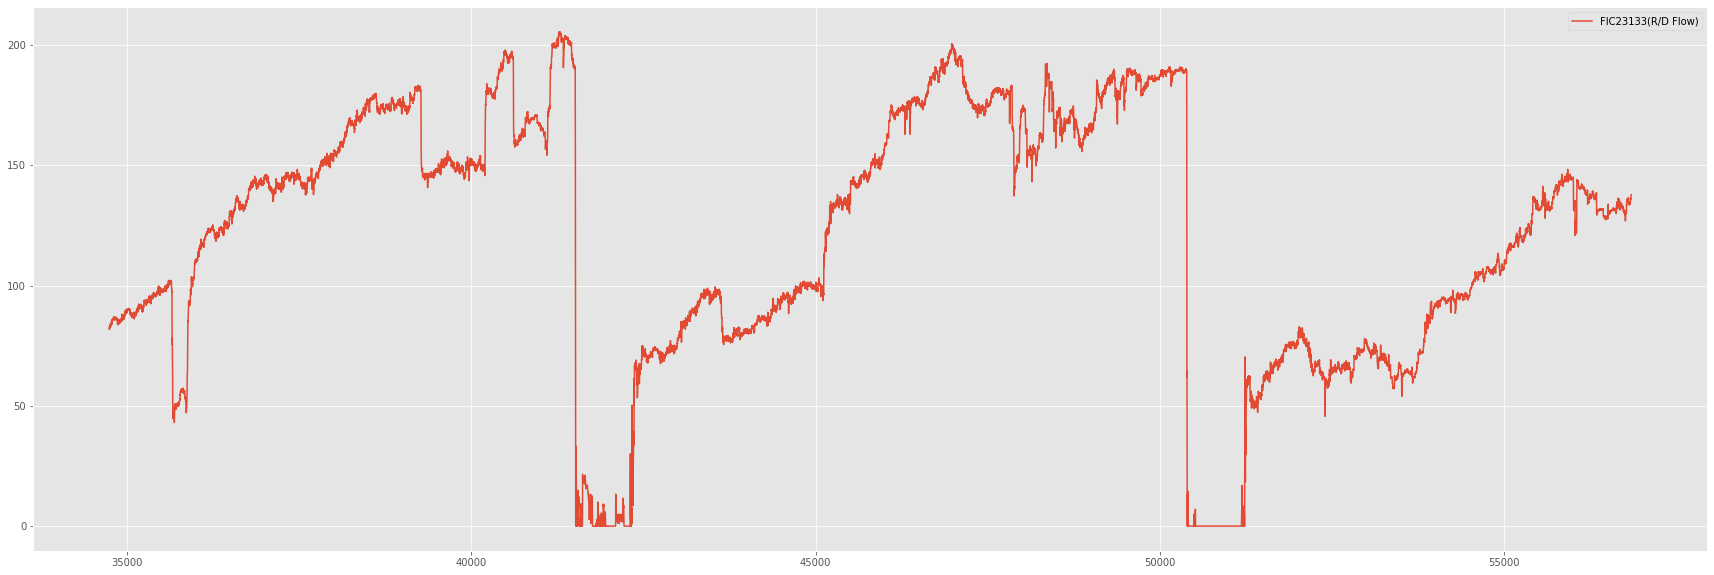

FIC23105(P/A RT Flow)


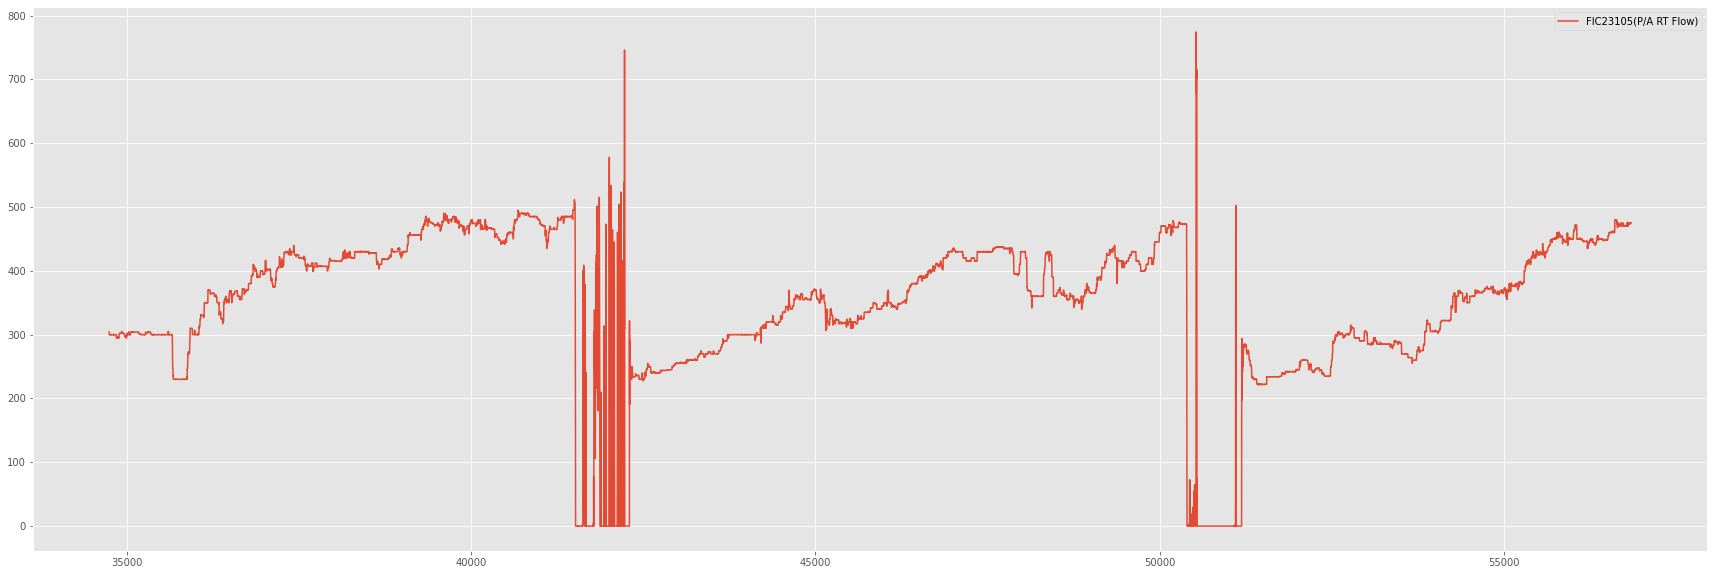

TI23028(P/A RT T)


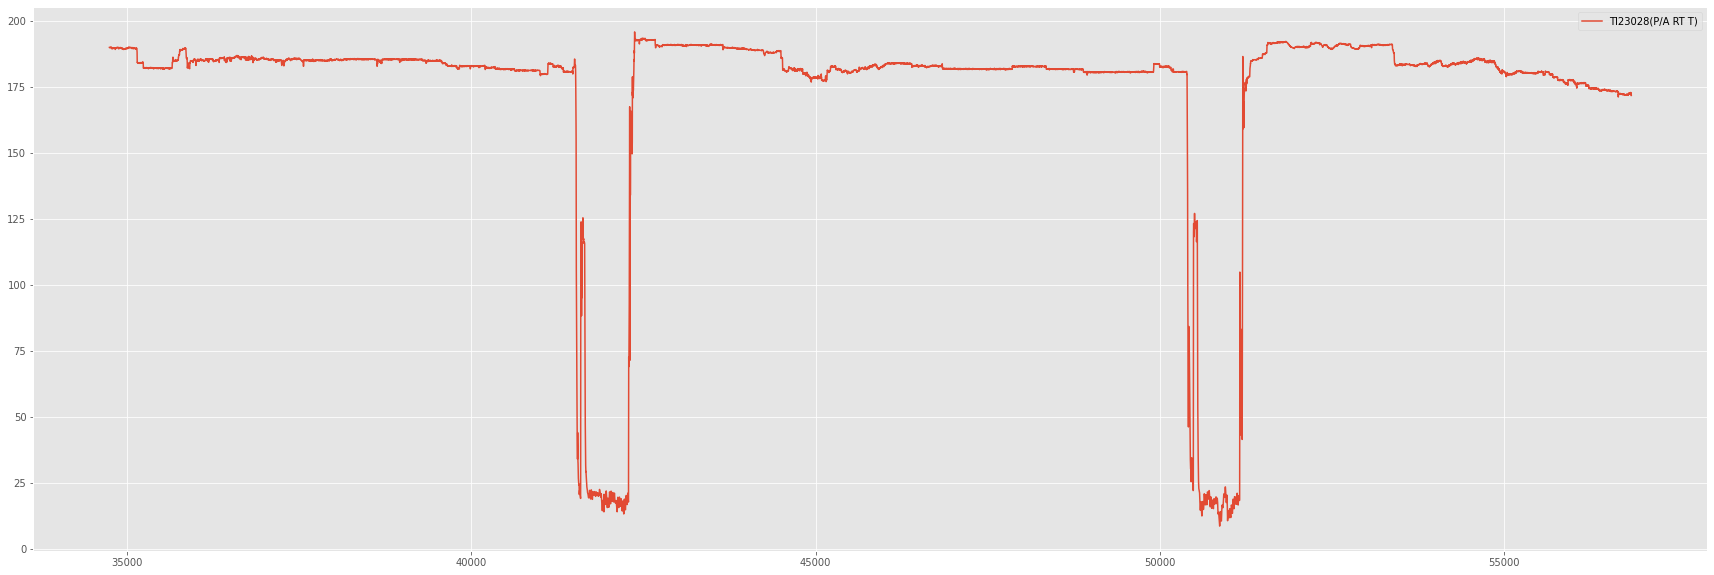

TI21022A(Catalyst T 1)


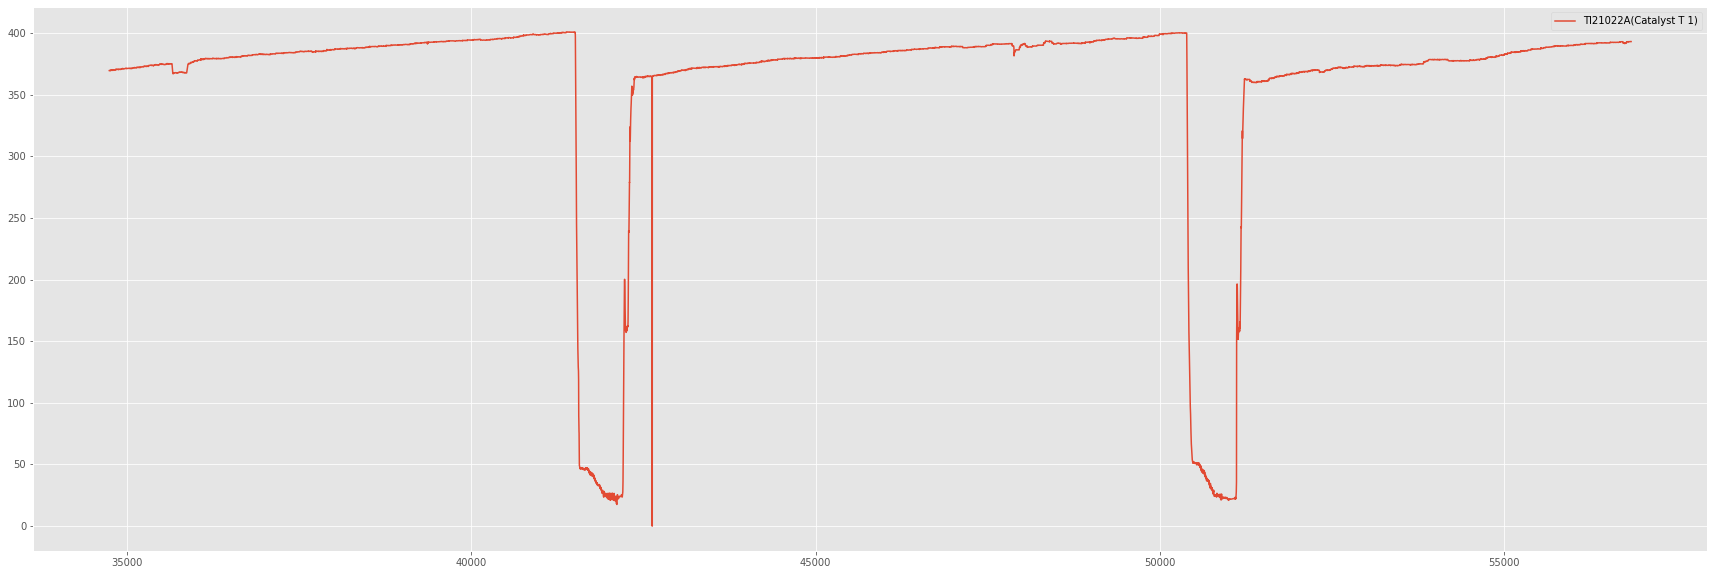

TI21022B(Catalyst T 2)


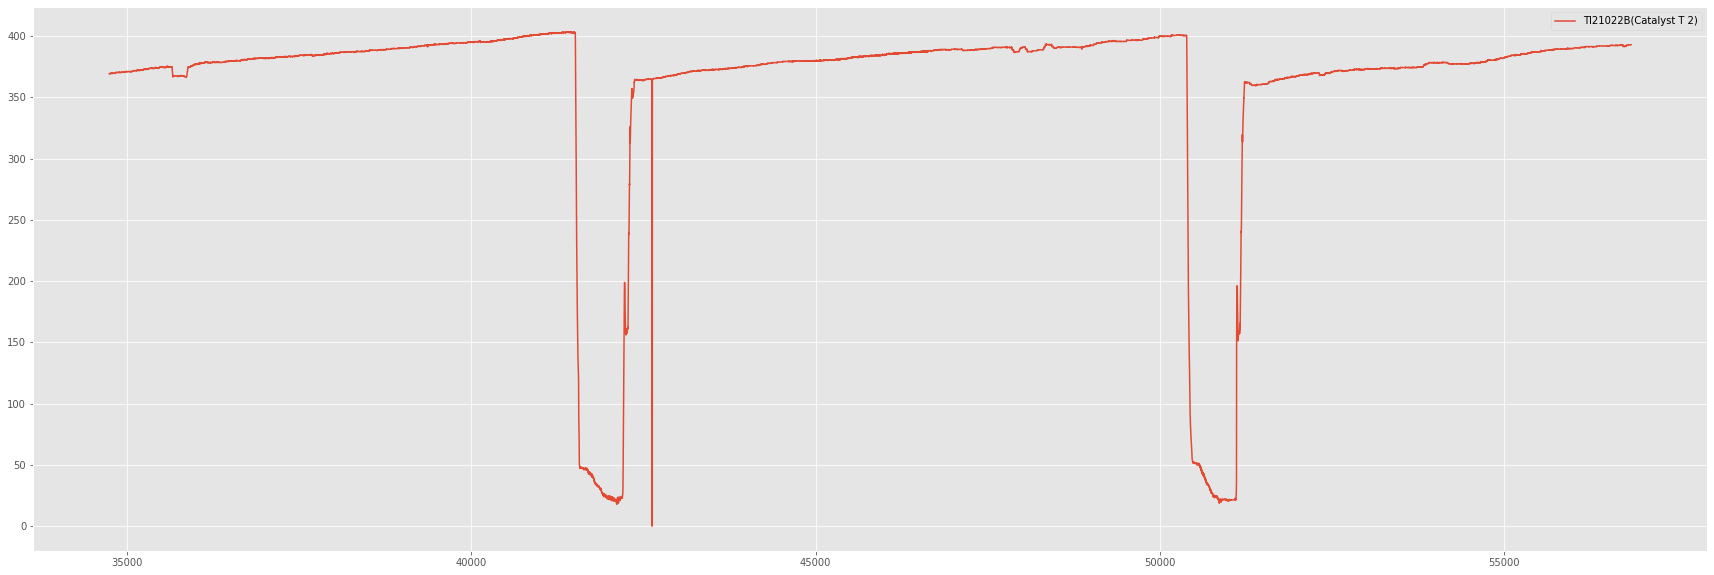

year


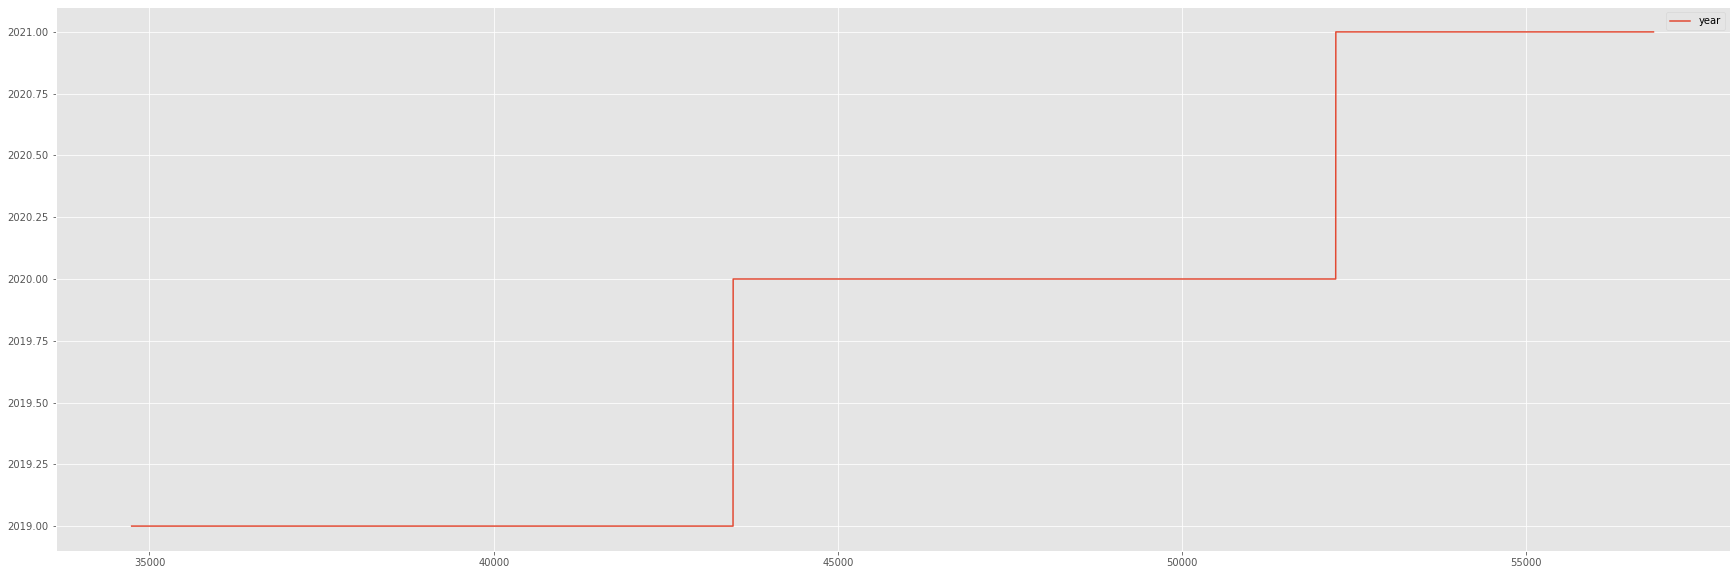

month


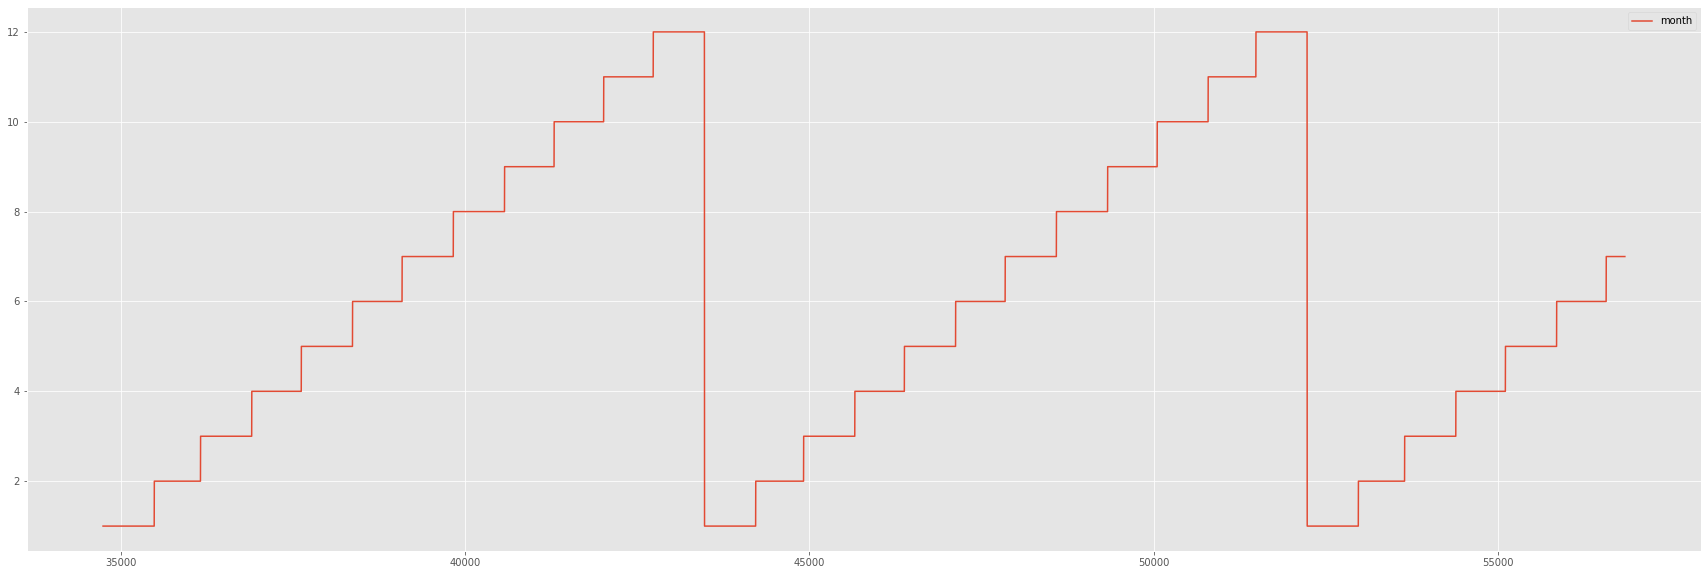

date


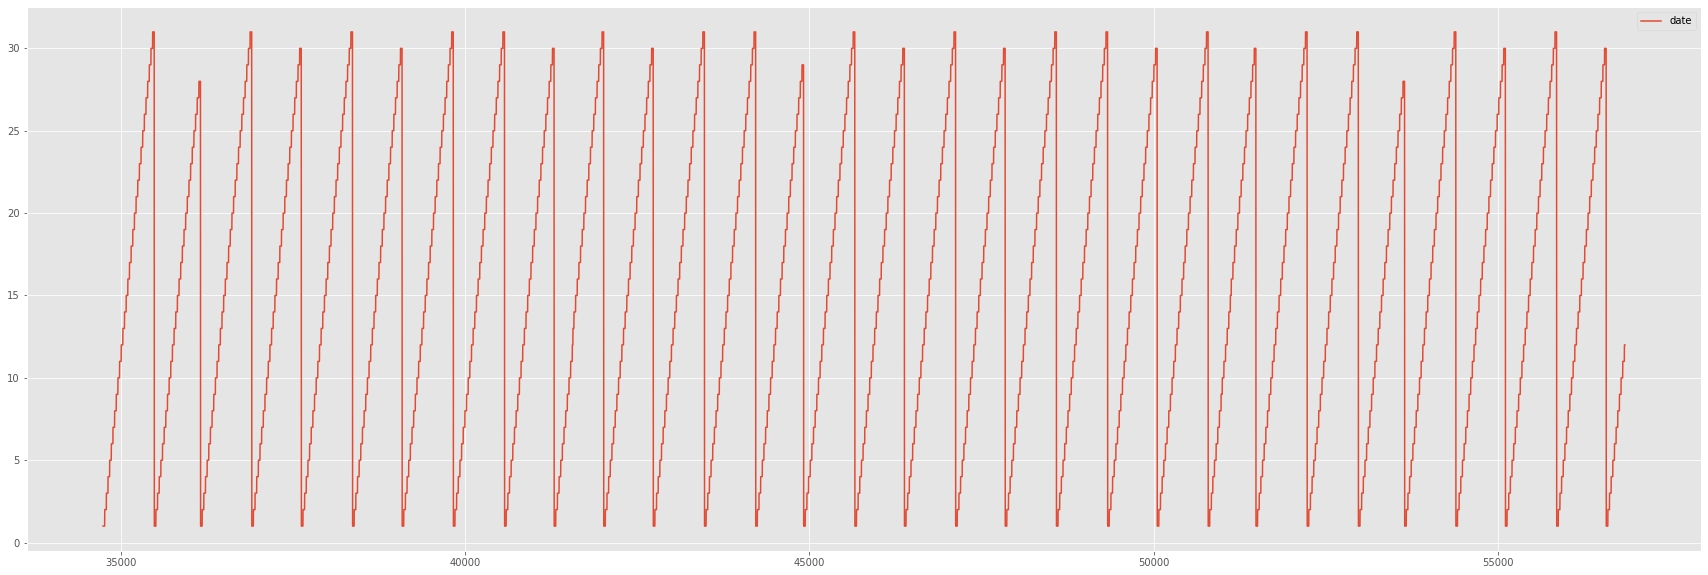

hour


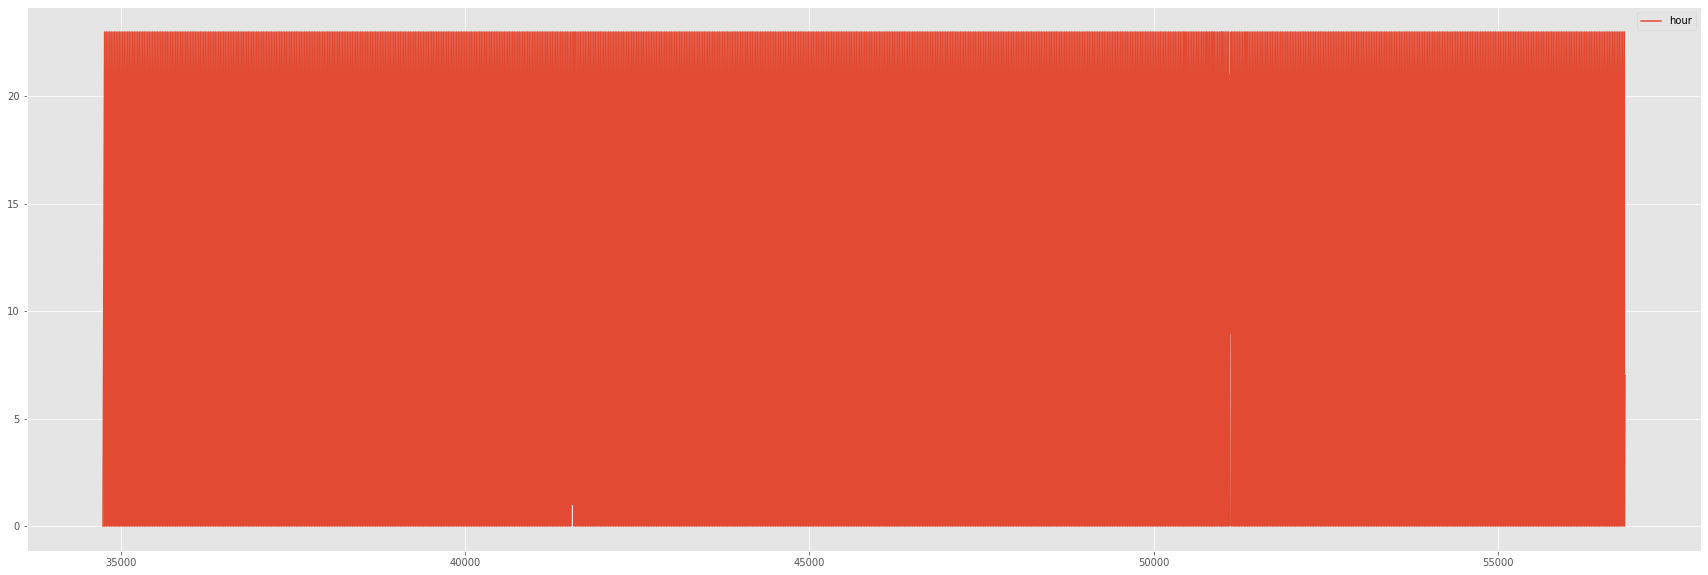

In [ ]:
import seaborn as sns
for col in test.columns[1:]:
  try:
    print(col)
    target = test.loc[:,col]
    target.describe()
    plt.figure(figsize=(30,10))
    plt.plot(target, label=col) 
    plt.legend()
    plt.show()
  except:
    continue

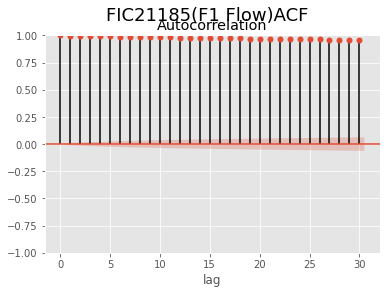

In [ ]:
#ACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
lag = 30
target = "FIC21185(F1 Flow)"
z = data[target]
plot_acf(z, lags = lag, use_vlines = True)
plt.suptitle(target + "ACF", fontsize=18)
plt.xlabel("lag")
plt.show()

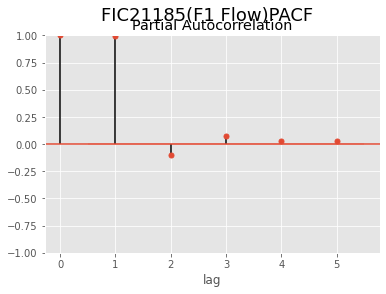

In [ ]:
#PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
lag = 5
target = "FIC21185(F1 Flow)"
z = data[target]
plot_pacf(z, lags = lag, use_vlines = True)
plt.suptitle(target + "PACF", fontsize=18)
plt.xlabel("lag")
plt.show()

In [ ]:
train.corr()

DSL D-95  FIC21185(F1 Flow)  FIC21192(F2 Flow)  \
DSL D-95                1.000000           0.400606           0.138880   
FIC21185(F1 Flow)       0.400606           1.000000           0.409940   
FIC21192(F2 Flow)       0.138880           0.409940           1.000000   
TIC23115(Feed1 T)       0.405805           0.922977           0.633260   
TI23029(Feed2 T)        0.426221           0.919495           0.513467   
FIC23108(SS Flow)       0.548550           0.898052           0.446662   
PI23105(F Zone P)       0.178459           0.669008           0.460756   
TI23120(F Zone T)       0.421198           0.906290           0.629851   
TI23121(SS T)           0.376887           0.911534           0.559038   
PI23038(BTM P)          0.175604           0.692816           0.475852   
TI23123(Reflux T)       0.263984           0.338749           0.432150   
TI23502(D/O Vapor T)    0.453329           0.884267           0.651496   
FI23107(OF Flow)       -0.323452          -0.705060          -0.166591   
TI23122(BTM T)          0.403393           0.911297           0.612222   
TI23116(Top T)          0.364917           0.813628           0.510587   
TI23117(DSL S Vapor T)  0.427862           0.883972           0.585897   
TI23119(OV T)           0.430648           0.884870           0.681353   
PIC23106(Top P)         0.102149           0.550578           0.353112   
FIC23104(Reflux F)     -0.111854           0.166399           0.250910   
FIC23010(D/O Flow)      0.273802           0.530106           0.942207   
FI23116(T-AR Flow 1)    0.192927           0.356294          -0.274743   
FI23117(T-AR Flow 2)    0.231419           0.697316           0.569544   
FIC25103(OVHD Flow 1)   0.114184           0.268389           0.918295   
FIC23110(OVHD Flow 2)   0.185937           0.452094           0.949224   
TI23118(D/O Liquid T)   0.435963           0.887773           0.617797   
FIC23133(R/D Flow)      0.357653           0.565296           0.941867   
FIC23105(P/A RT Flow)   0.129237           0.572880           0.902571   
TI23028(P/A RT T)       0.350304           0.844939           0.533553   
TI21022A(Catalyst T 1)  0.372195           0.906074           0.666412   
TI21022B(Catalyst T 2)  0.372955           0.906196           0.666597   
year                    0.392018           0.098570          -0.042597   
month                  -0.274219          -0.361188          -0.039982   
date                    0.025526          -0.004063          -0.006704   
hour                         NaN                NaN                NaN   

                        TIC23115(Feed1 T)  TI23029(Feed2 T)  \
DSL D-95                         0.405805          0.426221   
FIC21185(F1 Flow)                0.922977          0.919495   
FIC21192(F2 Flow)                0.633260          0.513467   
TIC23115(Feed1 T)                1.000000          0.977428   
TI23029(Feed2 T)                 0.977428          1.000000   
FIC23108(SS Flow)                0.930130          0.931150   
PI23105(F Zone P)                0.739592          0.732042   
TI23120(F Zone T)                0.992547          0.986380   
TI23121(SS T)                    0.974656          0.966409   
PI23038(BTM P)                   0.758192          0.749200   
TI23123(Reflux T)                0.480357          0.558388   
TI23502(D/O Vapor T)             0.982148          0.975732   
FI23107(OF Flow)                -0.663527         -0.740760   
TI23122(BTM T)                   0.992215          0.987560   
TI23116(Top T)                   0.891793          0.930717   
TI23117(DSL S Vapor T)           0.970330          0.986014   
TI23119(OV T)                    0.982859          0.965374   
PIC23106(Top P)                  0.599280          0.585271   
FIC23104(Reflux F)               0.269681          0.285021   
FIC23010(D/O Flow)               0.729296          0.625057   
FI23116(T-AR Flow 1)             0.215731          0.269907   
FI23117(T-AR Flow 2)             0.769599      

# Feature Engineering

In [ ]:
!pip install filterpy
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
from tqdm import tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 KB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110474 sha256=b88a86ec96c2257e9145222791f2ece83d8ba8ee7ae749bb8ba325a08c9e091d
  Stored in directory: /root/.cache/pip/wheels/fe/f6/cb/40331472edf4fd399b8cad02973c6acbdf26898342928327fe
Successfully built filterpy


In [ ]:
import math
col_list = train_x.drop(['Unnamed: 0','year','month','date'],axis=1)

for i in col_list:
  train_x.loc[:,i + 'log'] = np.log1p(train_x.loc[:,i])

for i in col_list:
  test_x.loc[:,i + 'log'] = np.log1p(test_x.loc[:,i])

In [ ]:
col_list = train_x.drop(['Unnamed: 0','year','month','date'],axis=1)

for i in tqdm(col_list):
    current=0
    sum_c=[]
    z = train_x.loc[:, i]
    a = []           #필터링 된 피쳐(after)
    b = []           #필터링 전 피쳐(before)
    my_filter = KalmanFilter(dim_x=2,dim_z=1) #create kalman filter
    my_filter.x = np.array([[2.],[0.]])       # initial state (location and velocity)
    my_filter.F = np.array([[1.,1.], [0.,1.]])    # state transition matrix
    my_filter.H = np.array([[1.,0.]])    # Measurement function
    my_filter.P *= 1000.                 # covariance matrix
    my_filter.R = 5                      # state uncertainty
    my_filter.Q = Q_discrete_white_noise(dim = 2,dt=.1,var=.1) # process uncertainty   
    for k in z.values:
        my_filter.predict()
        my_filter.update(k)
        # do something with the output
        x = my_filter.x
        a.extend(x[0])
        b.append(k)
    sum_c=sum_c+a
    train_x.loc[:,'kf_X_'+str(i)]=sum_c


col_list = test_x.drop(['Unnamed: 0','year','month','date'],axis=1)

for i in tqdm(col_list):
    current=0
    sum_c=[]
    z = test_x.loc[:, i]
    a = []           #필터링 된 피쳐(after)
    b = []           #필터링 전 피쳐(before)
    my_filter = KalmanFilter(dim_x=2,dim_z=1) #create kalman filter
    my_filter.x = np.array([[2.],[0.]])       # initial state (location and velocity)
    my_filter.F = np.array([[1.,1.], [0.,1.]])    # state transition matrix
    my_filter.H = np.array([[1.,0.]])    # Measurement function
    my_filter.P *= 1000.                 # covariance matrix
    my_filter.R = 5                      # state uncertainty
    my_filter.Q = Q_discrete_white_noise(dim = 2,dt=.1,var=.1) # process uncertainty   
    for k in z.values:
        my_filter.predict()
        my_filter.update(k)
        # do something with the output
        x = my_filter.x
        a.extend(x[0])
        b.append(k)
    sum_c=sum_c+a
    test_x.loc[:,'kf_X_'+str(i)]=sum_c

  7%|▋         | 60/920 [00:08<01:58,  7.28it/s]


In [ ]:
raw_cols_tr = train_x.drop(['Unnamed: 0','year','month','date','hour'],axis=1).columns

mean_arr = []
median_arr = []


for column in raw_cols_tr:
    column_list = train_x[column].to_list()
    for i in range(30):
      mean_arr.append(column_list[i])
      median_arr.append(column_list[i])
        
    for i in range(30, len(column_list)):
        mean_arr.append(float(np.mean(column_list[i-30:i])))
        median_arr.append(float(np.median(column_list[i-30:i])))
    train_x[f'{column}_mean_30'] = mean_arr
    train_x[f'{column}_median_30'] = median_arr
    mean_arr = []
    median_arr = []


raw_cols_te = test_x.drop(['Unnamed: 0','year','month','date','hour'],axis=1).columns

mean_arr = []
median_arr = []


for column in raw_cols_te:
    column_list = test_x[column].to_list()
    for i in range(30):
      mean_arr.append(column_list[i])
      median_arr.append(column_list[i])
        
    for i in range(30, len(column_list)):
        mean_arr.append(float(np.mean(column_list[i-30:i])))
        median_arr.append(float(np.median(column_list[i-30:i])))
    test_x[f'{column}_mean_30'] = mean_arr
    test_x[f'{column}_median_30'] = median_arr
    mean_arr = []
    median_arr = []

train_x

Unnamed: 0  FIC21185(F1 Flow)  FIC21192(F2 Flow)  \
7      2015-01-01 7:00           550.8983            50.2086   
31     2015-01-02 7:00           550.4379            50.9556   
55     2015-01-03 7:00           549.9128            50.6626   
79     2015-01-04 7:00           550.4780            52.0660   
103    2015-01-05 7:00           549.7178            52.4928   
...                ...                ...                ...   
34628  2018-12-27 7:00           646.1933            43.1396   
34652  2018-12-28 7:00           646.1486            43.2907   
34676  2018-12-29 7:00           646.2419            43.6974   
34700  2018-12-30 7:00           646.4269            44.1367   
34724  2018-12-31 7:00           646.2274            43.8563   

       TIC23115(Feed1 T)  TI23029(Feed2 T)  FIC23108(SS Flow)  \
7               371.4857          327.1521            12.6999   
31              371.5141          327.4293            12.7030   
55              372.4941          327.1995            12.7000   
79              372.4880          326.0615            12.6990   
103             372.1787          326.1675            12.7030   
...                  ...               ...                ...   
34628           366.0021          326.7780            12.9985   
34652           365.9874          326.7389            12.9982   
34676           365.9620          326.0499            13.0026   
34700           365.9416          326.1533            12.9940   
34724           365.9924          326.3418            12.9995   

       PI23105(F Zone P)  TI23120(F Zone T)  TI23121(SS T)  PI23038(BTM P)  \
7                 0.8855           365.2428       296.1245          0.9671   
31                0.8788           366.6962       298.6095          0.9602   
55                0.8886           365.9364       298.1955          0.9705   
79                0.8914           364.5561       298.0781          0.9729   
103               0.8900           364.9840       298.8630          0.9719   
...                  ...                ...            ...             ...   
34628             0.8213           360.4108       298.9033          0.9008   
34652             0.8199           359.7873       297.5707          0.8977   
34676             0.8236           359.3911       297.8050          0.9018   
34700             0.8231           360.0908       300.0846          0.9024   
34724             0.8217           360.0250       300.2509          0.9014   

       TI23123(Reflux T)  TI23502(D/O Vapor T)  FI23107(OF Flow)  \
7                42.4802              305.3691           21.2453   
31               43.3087              317.2792           20.9002   
55               43.0315              303.5425           23.3113   
79               43.9677              299.9352           26.9116   
103              44.3689              302.2838           27.4475   
...                  ...                   ...               ...   
34628            41.5331              301.3582            0.0000   
34652            39.6621              299.5272            0.0000   
34676            40.6187              295.1207            0.0000   
34700            40.8057              300.4487            0.0000   
34724            41.4705              299.2799            0.0000   

       TI23122(BTM T)  TI23116(Top T)  TI23117(DSL S Vapor T)  TI23119(OV T)  \
7            362.7440        110.1155                247.5054       336.5042   
31           362.3851        109.8148                249.7977       339.5740   
55           363.4046        109.8987                246.5459       337.7318   
79           362.9605        109.7104                245.9840       338.7157   
103          362.5666        109.5822                247.3666       338.9142   
...               ...             ...                     ...            ...   
34628        357.8249        110.1740                238.8596       327.5319   
34652        358.1974        110.3781                239.3403       

# pycaret

In [ ]:
!pip install xgboost
!pip install --upgrade xgboost
!pip install catboost
!pip install pycaret
!pip install numpy == 1.20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 3.4 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 KB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25

In [ ]:
!pip install numpy == 1.20

ERROR: Invalid requirement: '=='


In [ ]:
from pycaret.regression import *

In [ ]:
train_xy = pd.concat([train_x,train_y],axis=1)
setup(data = train_xy, target = 'DSL D-95', silent = True)

Description             Value
0                               session_id              2083
1                                   Target          DSL D-95
2                            Original Data       (1449, 363)
3                           Missing Values             False
4                         Numeric Features               358
5                     Categorical Features                 3
6                         Ordinal Features             False
7                High Cardinality Features             False
8                  High Cardinality Method              None
9                    Transformed Train Set       (1014, 278)
10                    Transformed Test Set        (435, 278)
11                      Shuffle Train-Test              True
12                     Stratify Train-Test             False
13                          Fold Generator             KFold
14                             Fold Number                10
15                                CPU Jobs                -1
16                                 Use GPU             False
17                          Log Experiment             False
18                         Experiment Name  reg-default-name
19                                     USI              60f3
20                         Imputation Type            simple
21          Iterative Imputation Iteration              None
22                         Numeric Imputer              mean
23      Iterative Imputation Numeric Model              None
24                     Categorical Imputer          constant
25  Iterative Imputation Categorical Model              None
26           Unknown Categoricals Handling    least_frequent
27                               Normalize             False
28                        Normalize Method              None
29                          Transformation             False
30                   Transformation Method              None
31                                     PCA             False
32                              PCA Method              None
33                          PCA Components              None
34                     Ignore Low Variance             False
35                     Combine Rare Levels             False
36                    Rare Level Threshold              None
37                         Numeric Binning             False
38                         Remove Outliers             False
39                      Outliers Threshold              None
40                Remove Multicollinearity             False
41             Multicollinearity Threshold              None
42             Remove Perfect Collinearity              True
43                              Clustering             False
44                    Clustering Iteration              None
45                     Polynomial Features             False
46                       Polynomial Degree              None
47                    Trignometry Features             False
48                    Polynomial Threshold              None
49                          Group Features             False
50                       Feature Selection             False
51                Feature Selection Method           classic
52            Features Selection Threshold              None
53                     Feature Interaction             False
54                           Feature Ratio             False
55                   Interaction Threshold              None
56                        Transform Target             False
57                 Transform Target Method           box-cox

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='DSL D-95',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strateg...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
             

(       FIC21185(F1 Flow)  FIC21192(F2 Flow)  TI23029(Feed2 T)  \
 9131          555.337524          54.607399        327.117706   
 29912         551.677979          99.305496        315.930908   
 31160         539.554688         115.244598        308.380188   
 31520         537.574707         117.448097        306.815704   
 28928         558.510986          82.965698        321.244110   
 ...                  ...                ...               ...   
 2647          551.119812          73.972099        324.584198   
 10379         567.969727          64.024597        330.028687   
 12395         526.755127          93.442703        319.382996   
 8555          548.053284          45.235401        328.884796   
 6439          514.850220         126.931297        309.210785   
 
        FIC23108(SS Flow)  PI23105(F Zone P)  TI23120(F Zone T)  TI23121(SS T)  \
 9131             12.5012             0.9104         367.060913     295.765015   
 29912            13.5005             0.86

In [ ]:
bm = compare_models(sort = 'mae')

Model           MAE           MSE  \
et                  Extra Trees Regressor  1.842300e+00  7.575800e+00   
lightgbm  Light Gradient Boosting Machine  1.890400e+00  8.160800e+00   
rf                Random Forest Regressor  1.901000e+00  8.126600e+00   
gbr           Gradient Boosting Regressor  1.931900e+00  7.963900e+00   
xgboost         Extreme Gradient Boosting  2.022700e+00  9.352200e+00   
ridge                    Ridge Regression  2.284900e+00  1.115060e+01   
knn                 K Neighbors Regressor  2.356100e+00  1.209170e+01   
ada                    AdaBoost Regressor  2.390700e+00  1.032770e+01   
dt                Decision Tree Regressor  2.561100e+00  1.671190e+01   
br                         Bayesian Ridge  2.570200e+00  1.412910e+01   
en                            Elastic Net  2.705400e+00  1.541400e+01   
lr                      Linear Regression  2.719100e+00  1.879520e+01   
lasso                    Lasso Regression  2.749800e+00  1.559690e+01   
omp           Orthogonal Matching Pursuit  3.024800e+00  1.937790e+01   
llar         Lasso Least Angle Regression  5.167400e+00  5.919430e+01   
dummy                     Dummy Regressor  5.167400e+00  5.919430e+01   
huber                     Huber Regressor  7.911100e+00  1.584778e+02   
par          Passive Aggressive Regressor  1.052710e+01  1.783774e+02   
lar                Least Angle Regression  5.693463e+29  9.436436e+60   

                  RMSE            R2    RMSLE          MAPE  TT (Sec)  
et        2.688000e+00  8.618000e-01   0.0067  4.600000e-03     4.442  
lightgbm  2.759500e+00  8.529000e-01   0.0069  4.700000e-03     3.050  
rf        2.752800e+00  8.511000e-01   0.0069  4.800000e-03    12.847  
gbr       2.758100e+00  8.551000e-01   0.0069  4.800000e-03     6.196  
xgboost   2.965800e+00  8.294000e-01   0.0074  5.100000e-03     5.916  
ridge     3.303500e+00  7.953000e-01   0.0083  5.700000e-03     0.030  
knn       3.382300e+00  7.827000e-01   0.0085  5.900000e-03     0.102  
ada       3.173900e+00  8.115000e-01   0.0079  6.000000e-03     1.810  
dt        3.985500e+00  7.110000e-01   0.0100  6.400000e-03     0.357  
br        3.698000e+00  7.377000e-01   0.0093  6.400000e-03     0.166  
en        3.859500e+00  7.119000e-01   0.0097  6.800000e-03     0.077  
lr        4.246600e+00  6.636000e-01   0.0107  6.800000e-03     0.666  
lasso     3.882500e+00  7.086000e-01   0.0098  6.900000e-03     0.078  
omp       4.338200e+00  6.501000e-01   0.0110  7.600000e-03     0.032  
llar      7.652700e+00 -1.030000e-02   0.0194  1.310000e-02     0.029  
dummy     7.652700e+00 -1.030000e-02   0.0194  1.310000e-02     0.528  
huber     1.248560e+01 -1.791100e+00   0.0322  1.990000e-02     0.424  
par       1.318570e+01 -2.215700e+00   0.0330  2.630000e-02     0.073  
lar       9.716106e+29 -2.699594e+59  40.6786  1.426232e+27     0.149

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 2
INFO:logs:ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=2083, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
lgbm = create_model('lr')

MAE      MSE    RMSE      R2   RMSLE    MAPE
Fold                                                 
0     3.1969  18.8668  4.3436  0.7823  0.0111  0.0081
1     2.2839   8.8267  2.9710  0.7977  0.0074  0.0057
2     3.5215  39.7246  6.3027  0.5533  0.0161  0.0090
3     2.7115  12.2316  3.4974  0.8372  0.0089  0.0068
4     2.8811  15.2328  3.9029  0.4623  0.0097  0.0071
5     3.0713  32.3225  5.6853  0.3430  0.0142  0.0077
6     3.1245  19.1208  4.3727  0.7285  0.0111  0.0079
7     3.8925  55.7656  7.4676 -0.5750  0.0190  0.0098
8     2.5797  12.1534  3.4862  0.5195  0.0086  0.0064
9     2.9495  16.9621  4.1185  0.6417  0.0105  0.0074
Mean  3.0212  23.1207  4.6148  0.5091  0.0117  0.0076
Std   0.4373  14.1544  1.3507  0.3922  0.0035  0.0011

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 3
INFO:logs:LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
y_pred = predict_model(bm, data = test_x)
y_pred

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=2083, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Unnamed: 0  FIC21185(F1 Flow)  FIC21192(F2 Flow)  TIC23115(Feed1 T)  \
0    2019-01-01 7:00           646.1303            44.8342           366.2056   
1    2019-01-02 7:00           647.1044            45.6886           366.9995   
2    2019-01-03 7:00           646.8942            45.9091           366.9922   
3    2019-01-04 7:00           647.4509            45.5680           366.9790   
4    2019-01-05 7:00           647.3147            45.7293           366.9829   
..               ...                ...                ...                ...   
915  2021-07-08 7:00           538.2229            92.5138           382.5133   
916  2021-07-09 7:00           536.8542            92.5284           382.5014   
917  2021-07-10 7:00           562.3164            95.8797           382.1117   
918  2021-07-11 7:00           561.6356            97.0331           382.5039   
919  2021-07-12 7:00           558.4287           100.3369           382.5123   

     TI23029(Feed2 T)  FIC23108(SS Flow)  PI23105(F Zone P)  \
0            326.1974            12.9982             0.8216   
1            326.3128            13.0010             0.8239   
2            326.3815            13.0020             0.8228   
3            326.5077            13.0007             0.8201   
4            326.4471            13.0015             0.8194   
..                ...                ...                ...   
915          306.8479            11.0036             0.9287   
916          307.3191            11.0057             0.9170   
917          307.4200            11.0022             0.9394   
918          306.5138            10.9994             0.9450   
919          304.4652            11.0077             0.9514   

     TI23120(F Zone T)  TI23121(SS T)  PI23038(BTM P)  ...  \
0             359.9992       300.1220          0.9009  ...   
1             360.1846       299.6972          0.9033  ...   
2             361.2400       300.7715          0.9024  ...   
3             361.3047       300.6978          0.9003  ...   
4             361.8465       299.6819          0.8999  ...   
..                 ...            ...             ...  ...   
915           365.7682       291.0852          0.9015  ...   
916           365.8590       291.2015          0.8947  ...   
917           365.0531       292.0130          0.9044  ...   
918           364.3509       292.1111          0.9097  ...   
919           364.4990       293.7187          0.9174  ...   

     kf_X_FIC23105(P/A RT Flow)log_median_30  \
0                                   5.697783   
1                                   5.724904   
2                                   5.719202   
3                                   5.716189   
4                                   5.705658   
..                                       ...   
915                                 6.121758   
916                                 6.121758   
917                                 6.121758   
918                                 6.121758   
919                                 6.121758   

     kf_X_TI23028(P/A RT T)log_mean_30  kf_X_TI23028(P/A RT T)log_median_30  \
0                             5.243147                             5.243147   
1                             5.266961                             5.266961   
2                             5.260741                             5.260741   
3                             5.257715                             5.257715   
4                             5.256916                             5.256916   
..                                 ...                                  ...   
915                           5.165924                             5.164575   
916                           5.165045                             5.163255   
917                           5.164217                             5.162306   
918                           5.163402                             5.161766   
919                           5.162603                             5.161186   

     kf_X

In [ ]:
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(test_y,y_pred['Label'])
score

14.966880243052607

# AutoGluon

In [ ]:
!pip install AutoGluon

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score  
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, train_test_split

train_xy = pd.concat([train_x,train_y],axis=1)
train_data = TabularDataset(train_xy)
test_data = TabularDataset(test_x)
print("==================Tabular_complete========================")
print("==================Tabular_complete========================")
print("==================Tabular_complete========================")
print("==================Tabular_complete========================")
print("==================Tabular_complete========================")
#그룹을 프로덕트 코드로 하면 성능 향상
predictor = TabularPredictor(label='DSL D-95',  eval_metric='mean_absolute_error').fit(train_data, presets='high_quality',  ag_args_fit={'num_gpus': 0})
#predictor = TabularPredictor(label='Y_Class',  eval_metric='f1_macro',groups = 'PRODUCT_CODE', sample_weight = 'auto_weight').fit(train_data, presets='high_quality',  ag_args_fit={'num_gpus': 0})
#predictor = TabularPredictor(label='Y_Class', eval_metric='f1_macro').fit(train_data, presets='high_quality',  ag_args_fit={'num_gpus': 0},
#    num_bag_folds=5, num_bag_sets=1, num_stack_levels=1,
#    hyperparameters = {'NN_TORCH': {'num_epochs': 2}, 'GBM': {'num_boost_round': 20}},  # last  argument is just for quick demo here, omit it in real applications
#)
print("==================learning_complete========================")
print("==================learning_complete========================")
print("==================learning_complete========================")
print("==================learning_complete========================")
print("==================learning_complete========================")
print("==================learning_complete========================")
y_pred = predictor.predict(test_data)
print("==================predictor_complete========================")
print("==================predictor_complete========================")
print("==================predictor_complete========================")
print("==================predictor_complete========================")
print("==================predictor_complete========================")
print("==================submission_complete========================")
print("==================submission_complete========================")
print("==================submission_complete========================")
print("==================submission_complete========================")
print("==================submission_complete========================")
print("==================submission_complete========================")
y_pred

No path specified. Models will be saved in: "AutogluonModels/ag-20230214_031026/"
Presets specified: ['high_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1


==================Tabular_complete========================
==================Tabular_complete========================
==================Tabular_complete========================
==================Tabular_complete========================
==================Tabular_complete========================


	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230214_031026/"
AutoGluon Version:  0.6.2
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    34741
Train Data Columns: 362
Label Column: DSL D-95
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (433.07, 338.4, 401.90215, 7.60802)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Gener

==================learning_complete========================
==================learning_complete========================
==================learning_complete========================
==================learning_complete========================
==================learning_complete========================
==================learning_complete========================
==================predictor_complete========================
==================predictor_complete========================
==================predictor_complete========================
==================predictor_complete========================
==================predictor_complete========================
==================submission_complete========================
==================submission_complete========================
==================submission_complete========================
==================submission_complete========================
==================submission_complete========================
==================submiss

0      399.729065
1      399.927246
2      399.946594
3      399.974548
4      400.027405
          ...    
915    399.922974
916    399.920227
917    399.919250
918    399.911896
919    399.910034
Name: DSL D-95, Length: 920, dtype: float32

In [ ]:
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(test_y,y_pred)
score

17.474575869352922

# LR

In [ ]:
from sklearn.linear_model import LinearRegression
train_x.drop(['Unnamed: 0'],axis=1,inplace=True)
test_x.drop(['Unnamed: 0'],axis=1,inplace=True)

model = LinearRegression().fit(train_x,train_y)
y_pred = model.predict(test_x)

In [ ]:
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(test_y,y_pred)
score

106.84451714049865

# DT

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

train_x.drop(['Unnamed: 0'],axis=1,inplace=True)
test_x.drop(['Unnamed: 0'],axis=1,inplace=True)

model = DecisionTreeRegressor().fit(train_x,train_y)
y_pred = model.predict(test_x)
score = mean_absolute_error(test_y,y_pred)
score

13.692456521739132

# LR2